This is an experimental notebook to test developing functions

In [12]:
# loading standard FAO index libraries 

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib
import seaborn as sns

import os
import sys
from pathlib import Path

from fuzzywuzzy import process

In [13]:
print(np.__version__)
print(pd.__version__)
print(sp.__version__)

print(sns.__version__)
print(matplotlib.__version__)

1.26.4
2.2.2
1.13.1
0.13.2
3.8.4


In [14]:
import os
import sys
from pathlib import Path

notebook_dir = os.getcwd() # noitbook specific
notebook_name = "experiments_vis_testing01.ipynb" # notebook specific

PATH = Path(notebook_dir) / Path(notebook_name) # notebook specific

# alt script version
# PATH = Path(__file__)

sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("VIEWS_FAO_index")+1]]) / "src/utils"))   

from set_paths import setup_project_paths, get_logo_path, get_data_paths, setup_root_paths, get_plot_path
setup_project_paths(PATH)

#  -----------------------------------------------------------------------------------------------------------------

from utils_plotting_alexa_alt import plot_country_time_series, plot_feature_histograms, plot_country_period_map, plot_country_period_map_alexa_alt #, plot_random_monthly_and_yearly_data, 


In [6]:

# os.chdir("/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/src/utils") 


In [15]:
PATH_RAW_VIEWSER, PATH_RAW_EXTERNAL, PATH_PROCESSED, PATH_GENERATED = get_data_paths(PATH)
# add save plots path here?

In [6]:
# loading the data from the pkl files generated with main.py
df_monthly = pd.read_pickle(PATH_GENERATED / "df_monthly_country_return_periods.pkl")
df_yearly = pd.read_pickle(PATH_GENERATED / "df_yearly_country_return_periods.pkl")

# checking col
print(df_monthly.columns) #has fatalities_per_100k and total_best_per_100k_country, assuming pgm vs country
print(df_yearly.columns)  #has fatalities_per_100k and total_best_per_100k_country, assuming pgm vs country

Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'sb_best', 'ns_best', 'os_best', 'pop_gpw_sum', 'total_best',
       'fatalities_per_100k', 'sb_per_100k', 'ns_per_100k', 'os_per_100k',
       'total_best_per_100k_country', 'sb_best_per_100k_country',
       'os_best_per_100k_country', 'ns_best_per_100k_country',
       'sb_best_value_count', 'sb_best_p_i', 'sb_best_P_i', 'sb_best_e_i',
       'sb_best_E_i', 'ns_best_value_count', 'ns_best_p_i', 'ns_best_P_i',
       'ns_best_e_i', 'ns_best_E_i', 'os_best_value_count', 'os_best_p_i',
       'os_best_P_i', 'os_best_e_i', 'os_best_E_i', 'total_best_value_count',
       'total_best_p_i', 'total_best_P_i', 'total_best_e_i', 'total_best_E_i',
       'sb_best_b_i', 'sb_best_B_i', 'ns_best_b_i', 'ns_best_B_i',
       'os_best_b_i', 'os_best_B_i', 'total_best_b_i', 'total_best_B_i'],
      dtype='object')
Index(['pg_id', 'year_id', 'c_id', 'row', 'col', 'sb_best', 'ns_best',
       'os_best', 'pop_gpw_sum', 'total_b

In [7]:
# burkina faso, Ethiopia, Kenya, malawi, Mali, Mauritania, Mozambique, Niger, Somalia, Tanzania, Uganda, Yemen, Zimbabwe

from utils_get_country_names_by_ids import get_country_names_by_ids
from utils_get_country_id_by_name import get_country_id_by_name

# get country ids

get_country_id_by_name("yemen") 

[(124, 'Yemen'),
 (240, 'Yemen'),
 (196, 'Yemen Arab Republic'),
 (197, "Yemen People's Republic")]

Setting title: None


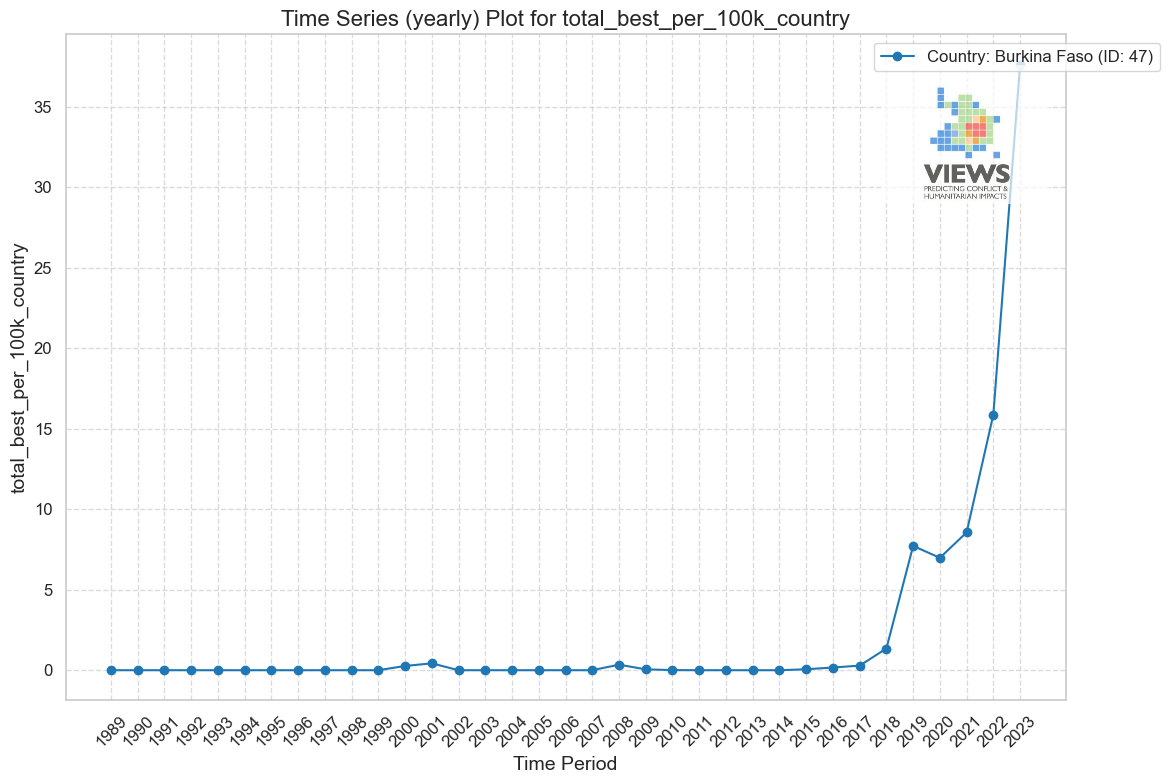

In [10]:
# creating plots of total best per 100k for each country

country_ids = [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158]
# tanzania is also 236, yemen 240

plot_country_time_series(df_yearly, [47], "total_best_per_100k_country", figsize=(12, 8), logo_placement = (0.9, 0.85), legend_placement=(0.8, 1))

Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None
Setting title: None


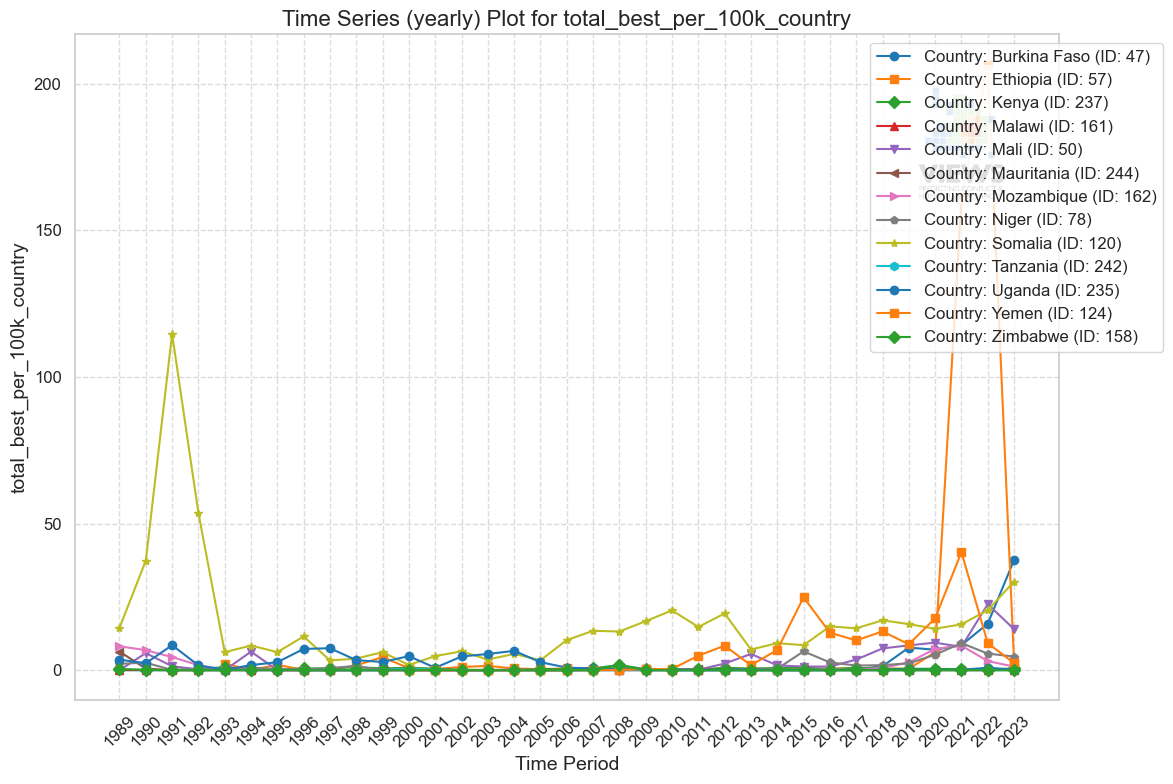

In [8]:
plot_country_time_series(df_yearly, [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158], "total_best_per_100k_country", figsize=(12, 8), logo_placement = (0.9, 0.85), legend_placement=(0.8, 1))

In [8]:
# subsetting the data to only include years up to 2020
df_yearly_2020 = df_yearly[df_yearly["year_id"] <= 2020]

Number of country IDs: 13
Number of titles: 13
Number of colors: 13
Passing title: Burkina Faso Annual Conflict History for country_id: 47
Setting title: Burkina Faso Annual Conflict History


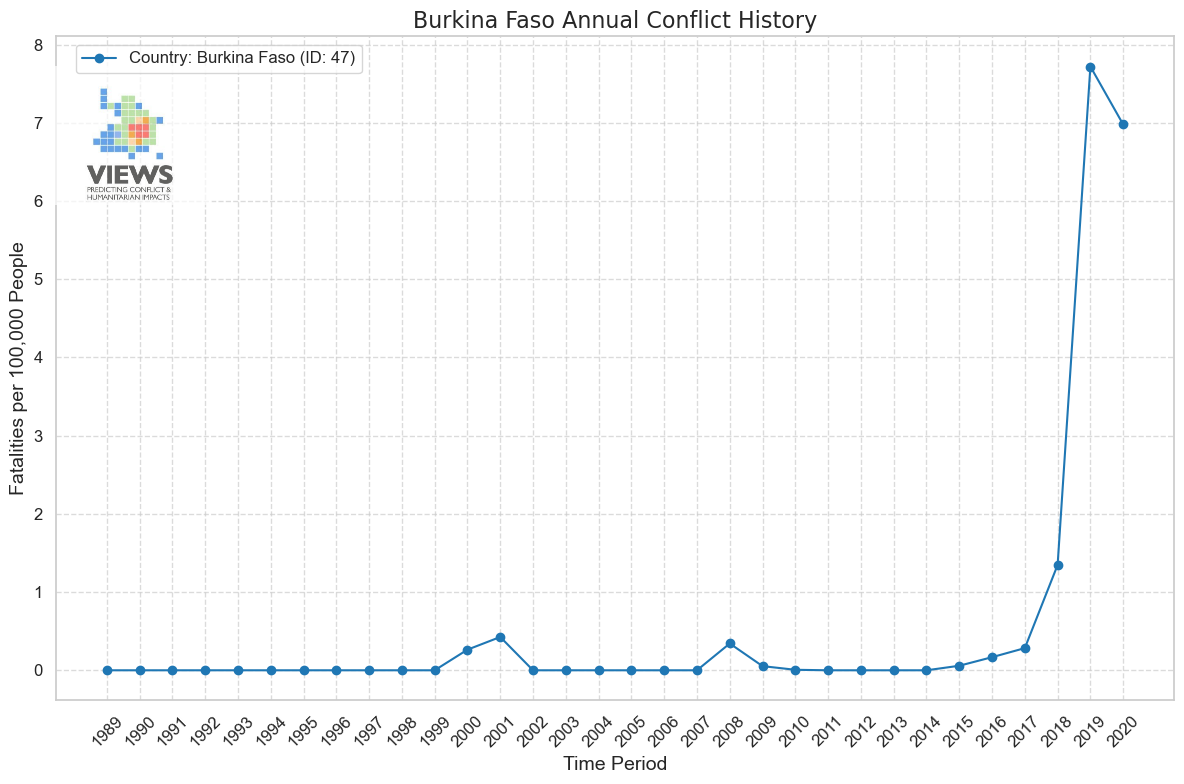

Passing title: Ethiopia Annual Conflict History for country_id: 57
Setting title: Ethiopia Annual Conflict History


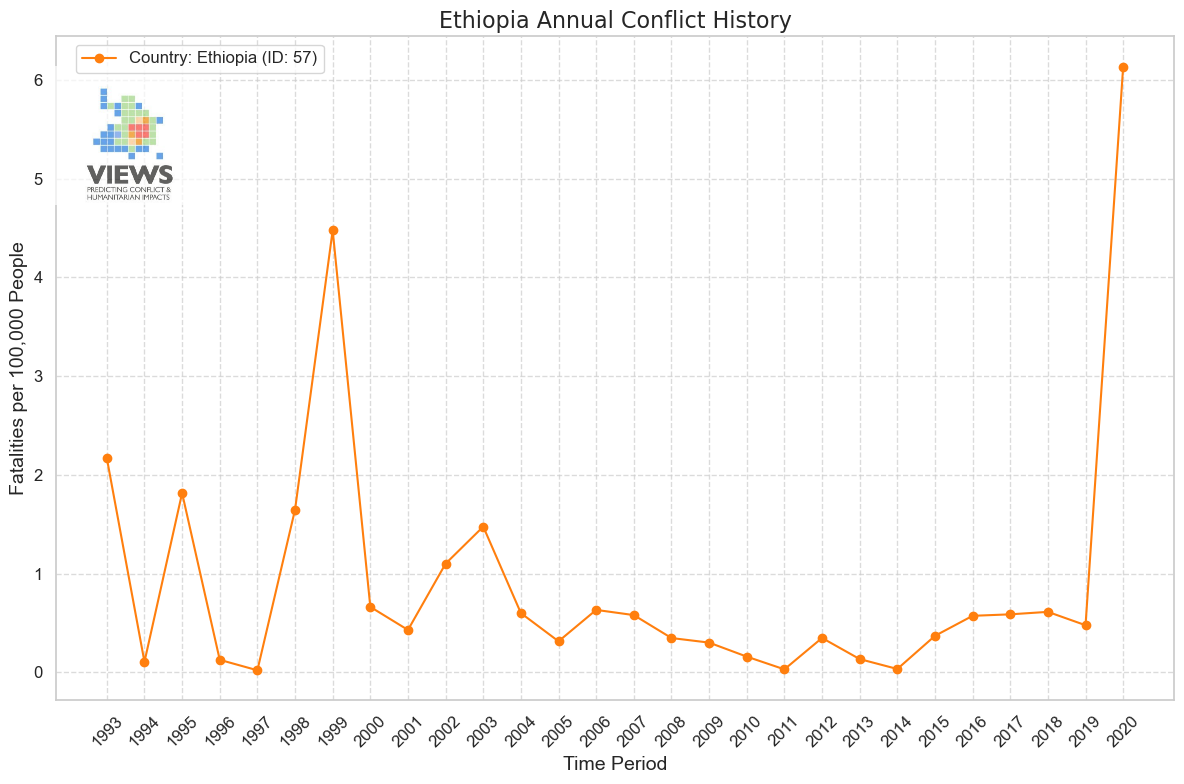

Passing title: Kenya Annual Conflict History for country_id: 237
Setting title: Kenya Annual Conflict History


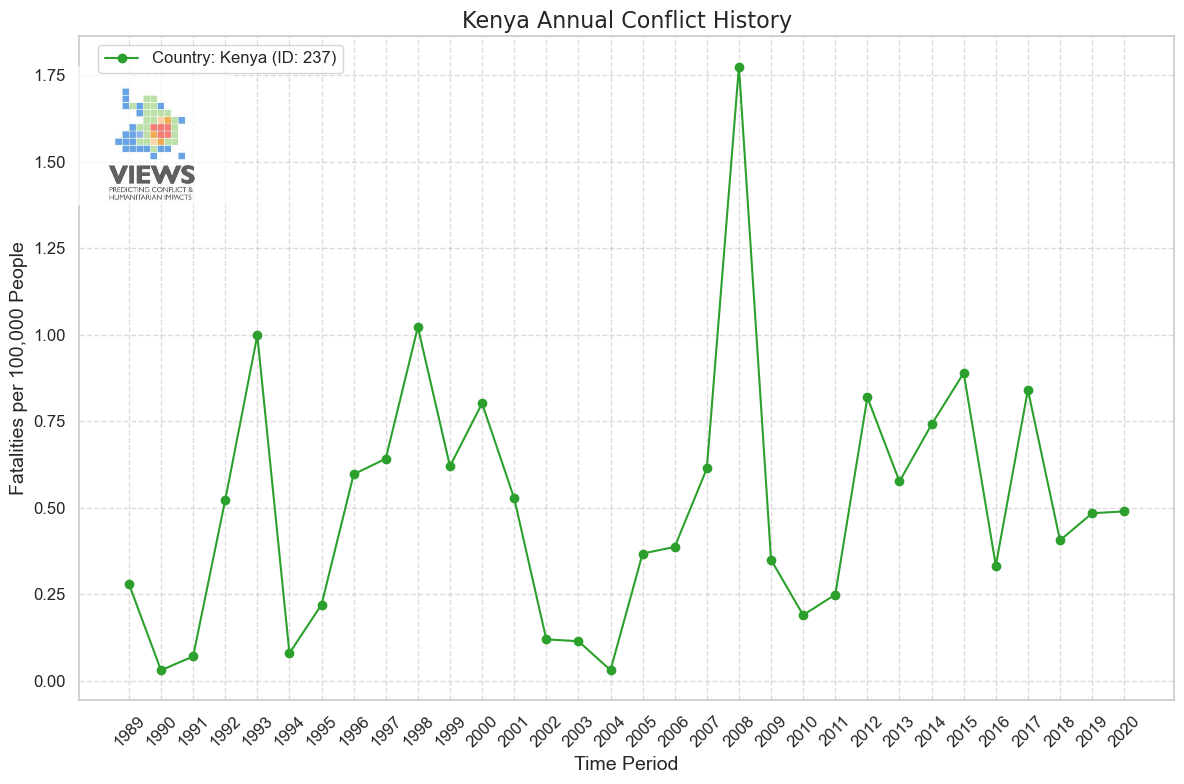

Passing title: Malawi Annual Conflict History for country_id: 161
Setting title: Malawi Annual Conflict History


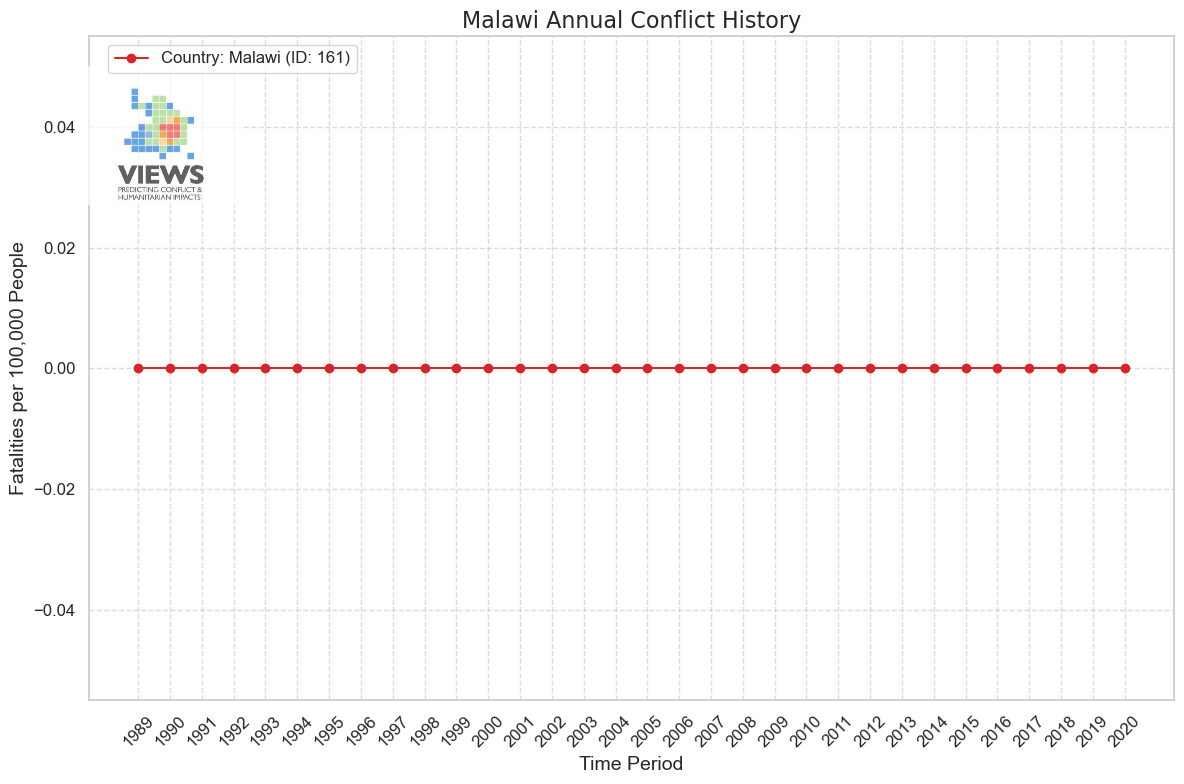

Passing title: Mali Annual Conflict History for country_id: 50
Setting title: Mali Annual Conflict History


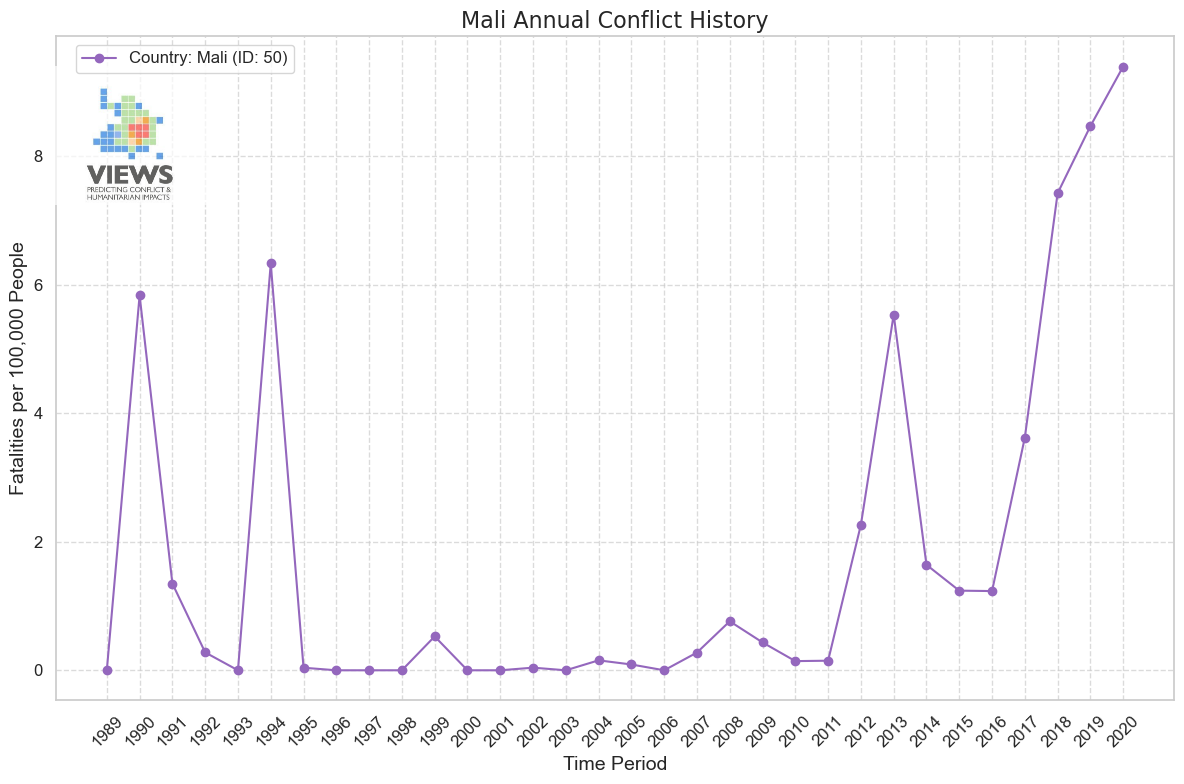

Passing title: Mauritania Annual Conflict History for country_id: 244
Setting title: Mauritania Annual Conflict History


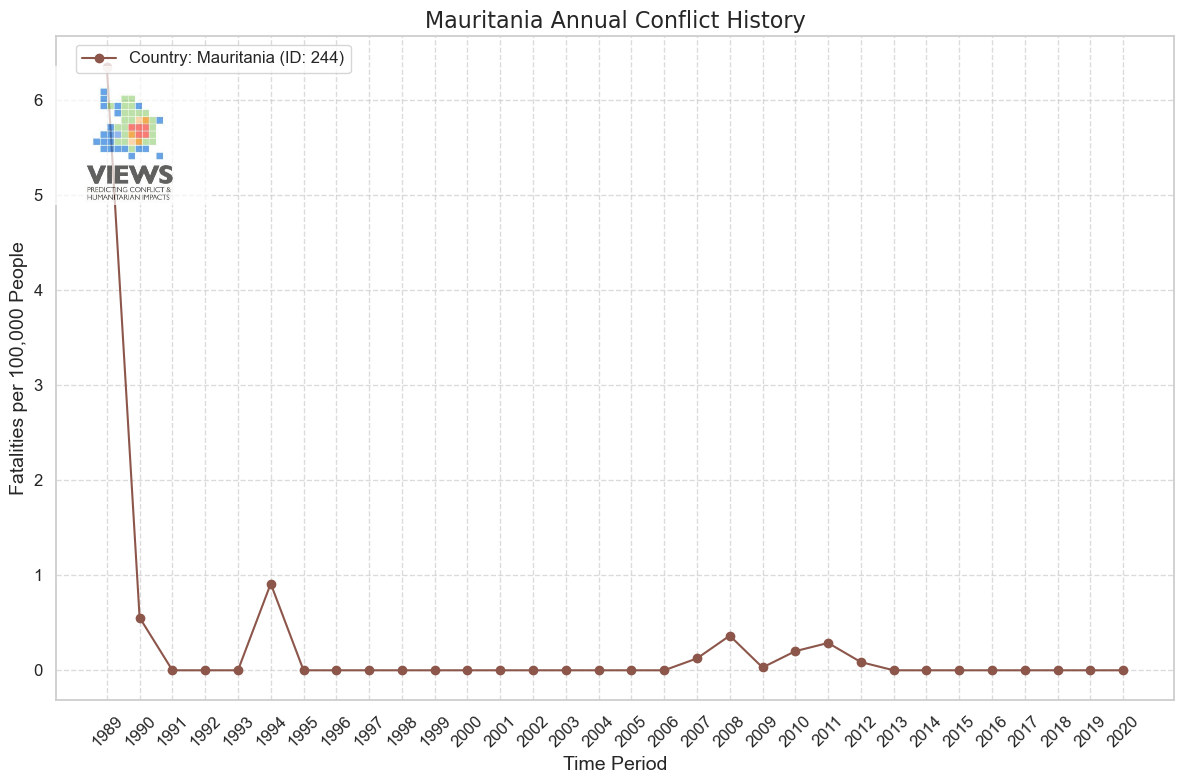

Passing title: Mozambique Annual Conflict History for country_id: 162
Setting title: Mozambique Annual Conflict History


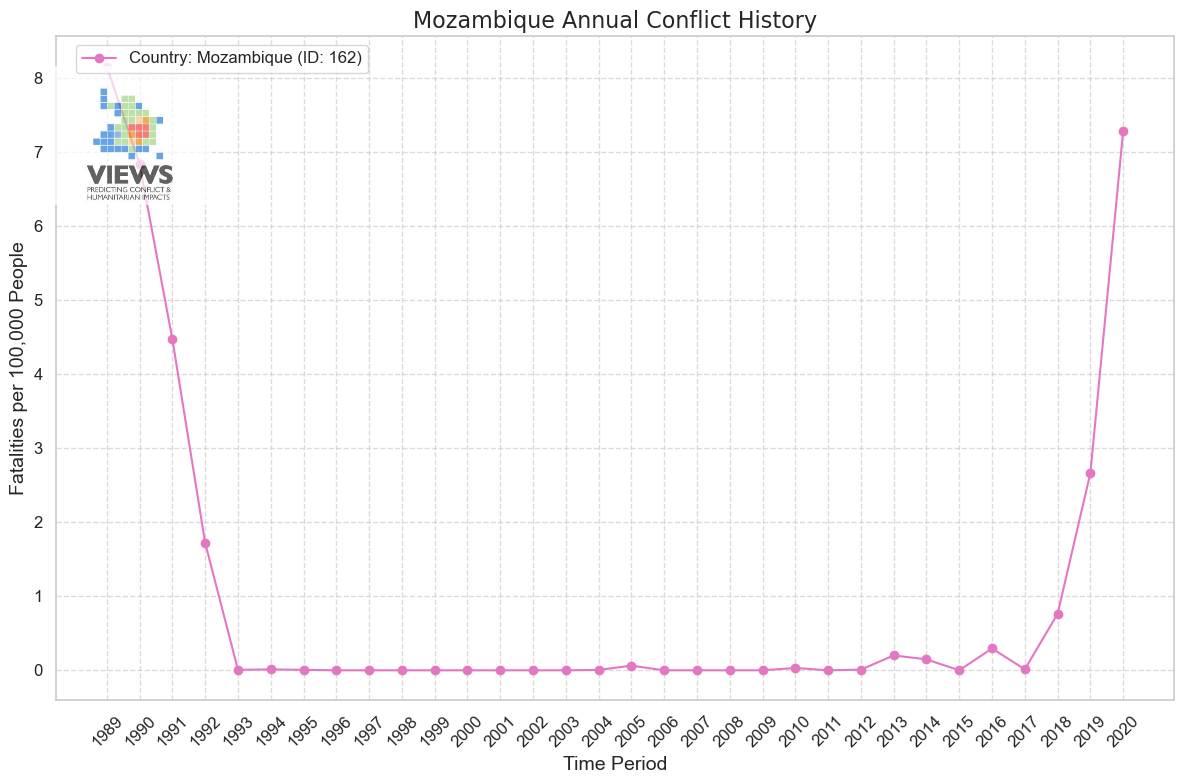

Passing title: Niger Annual Conlfict History for country_id: 78
Setting title: Niger Annual Conlfict History


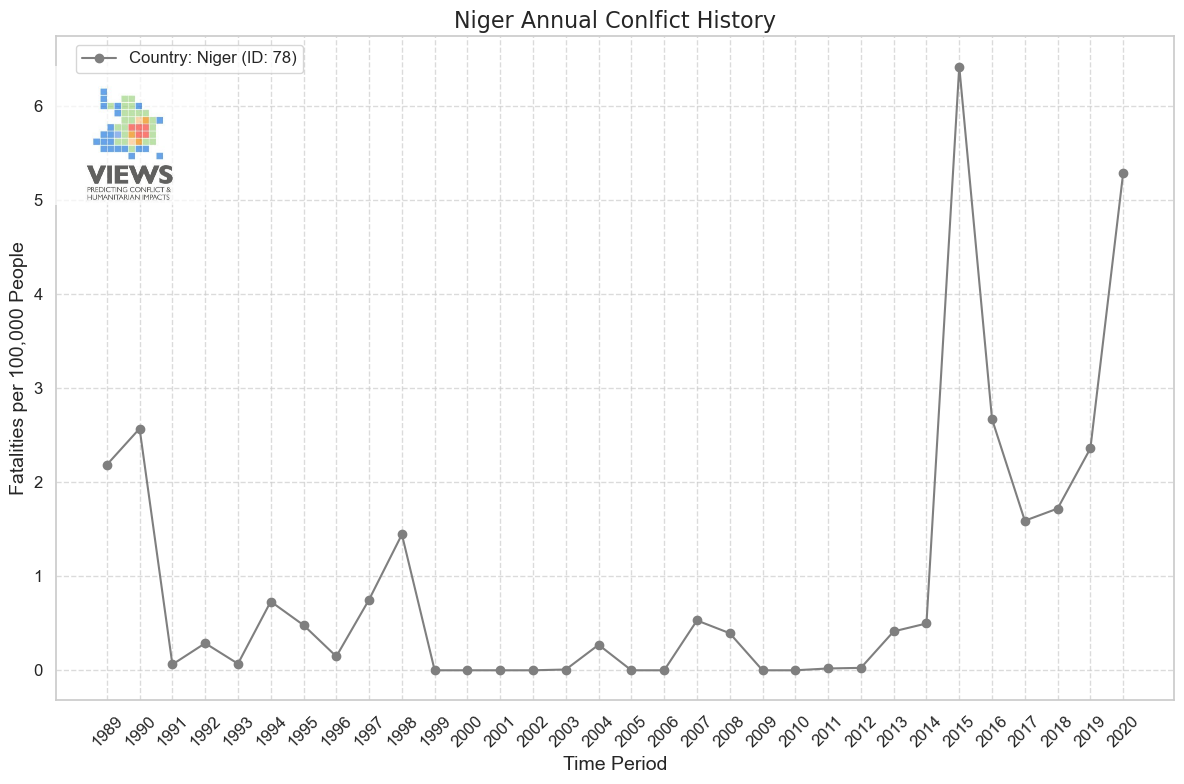

Passing title: Somalia Annual Conflict History for country_id: 120
Setting title: Somalia Annual Conflict History


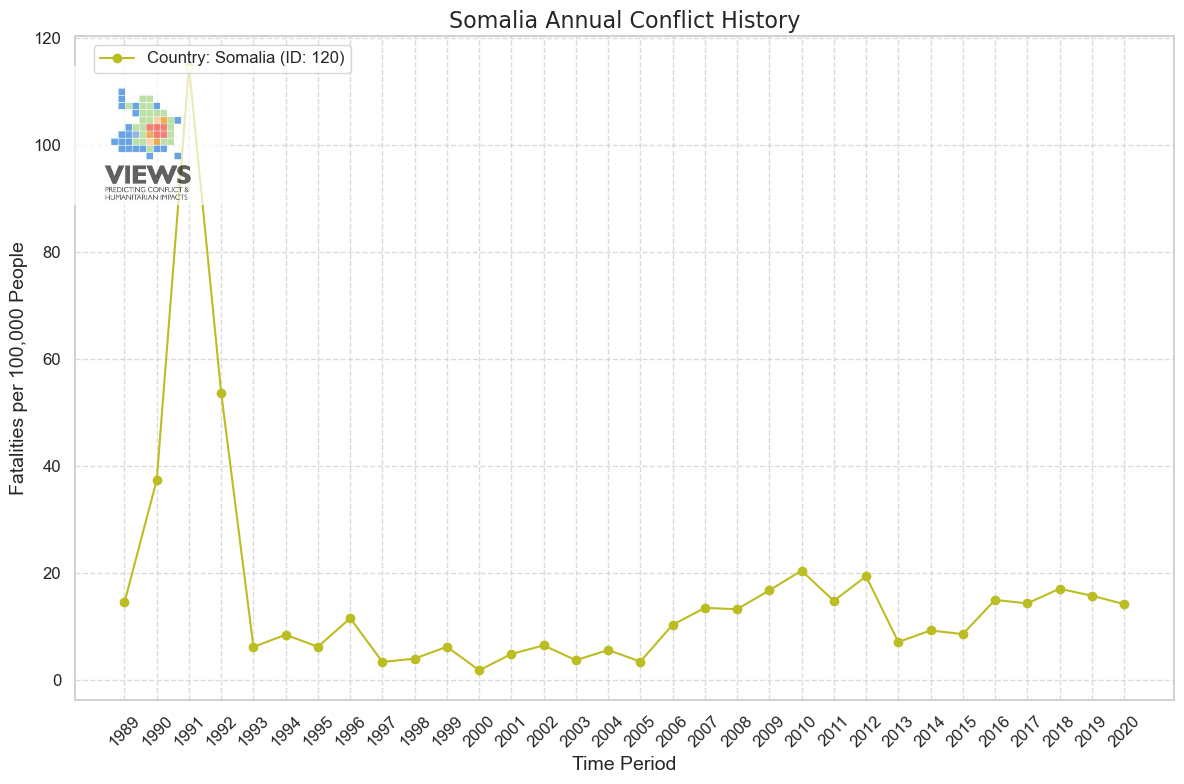

Passing title: Tanzania Annual Conflict History for country_id: 242
Setting title: Tanzania Annual Conflict History


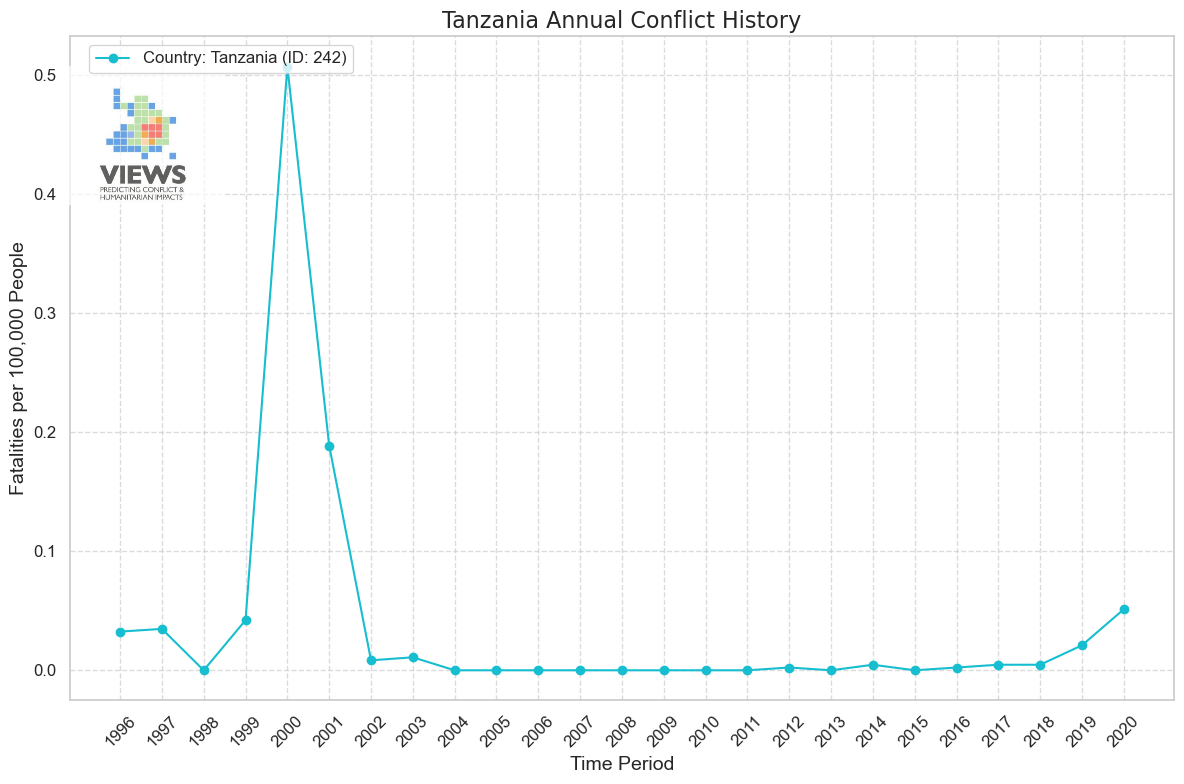

Passing title: Uganda Annual Conflict History for country_id: 235
Setting title: Uganda Annual Conflict History


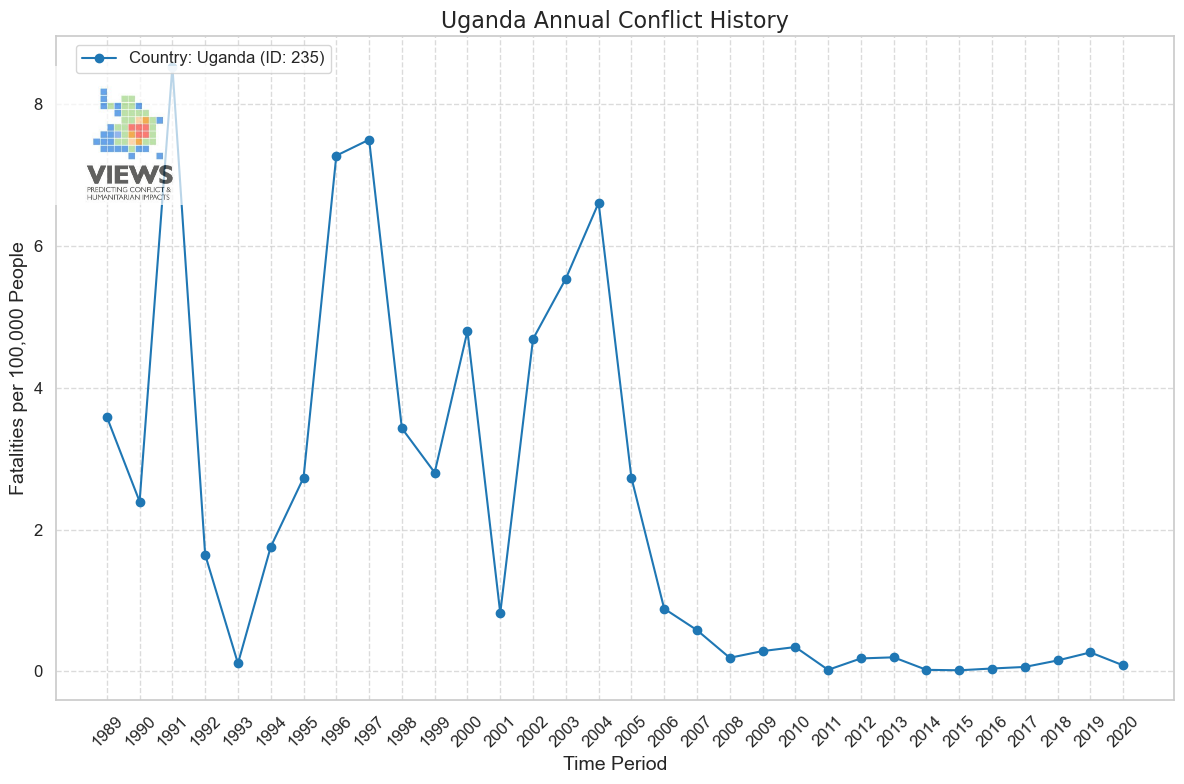

Passing title: Yemen Annual Conflict History for country_id: 124
Setting title: Yemen Annual Conflict History


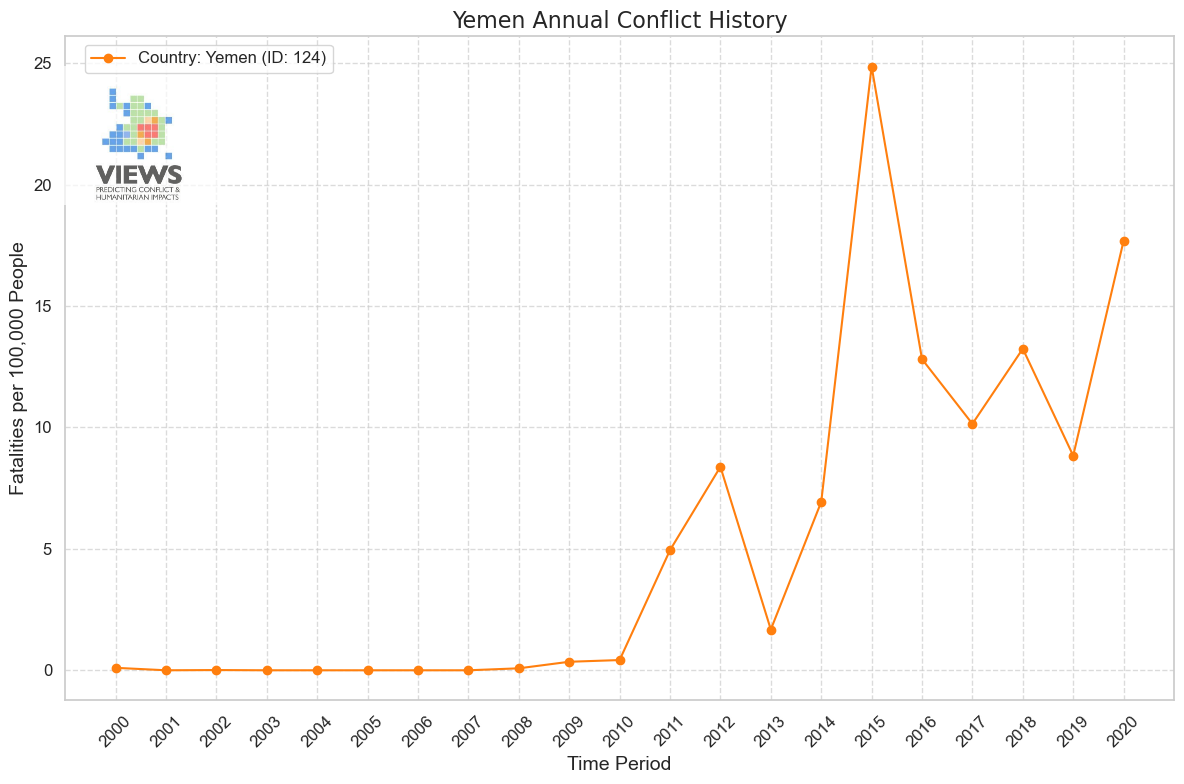

Passing title: Zimbabwe Annual Conflict History for country_id: 158
Setting title: Zimbabwe Annual Conflict History


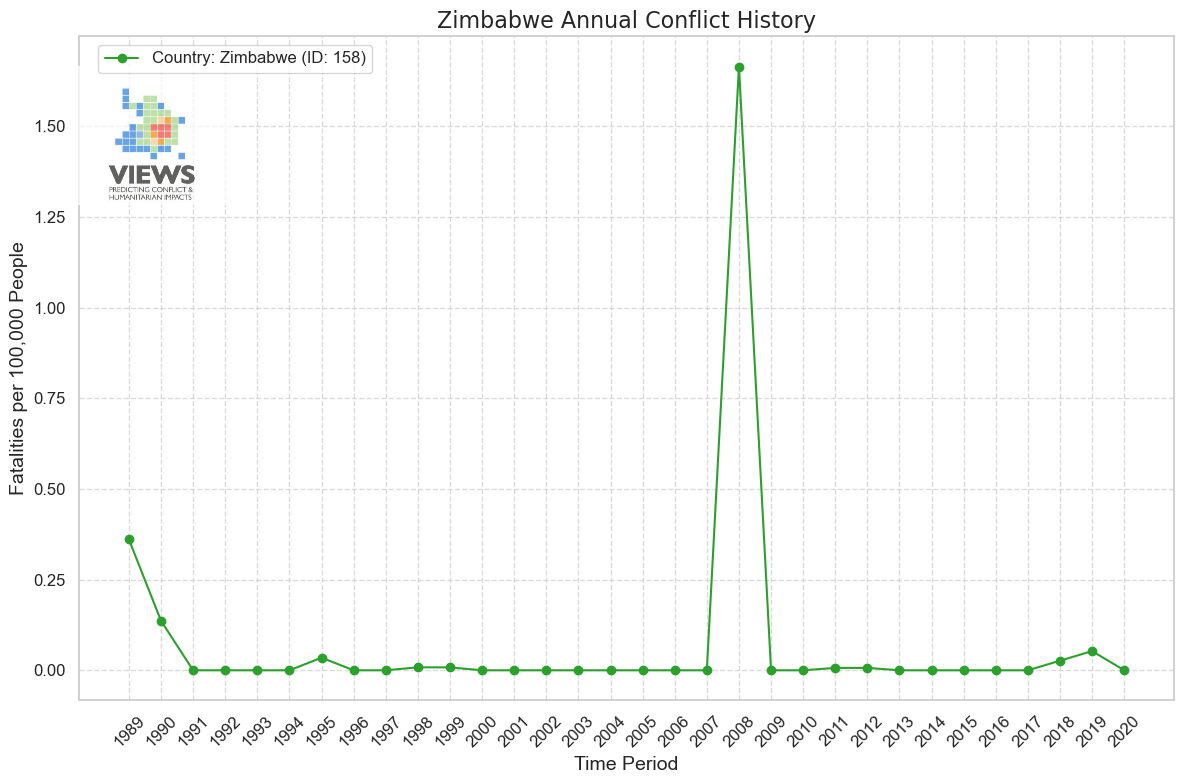

In [10]:
country_ids = [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158]

base_save_path = "/Users/alexatimlick/Documents/FAO" # need to make dynamic function to save plots

# Define a list of colors
colors = sns.color_palette("tab10", len(country_ids))

# Defining a list of titles
titles = ["Burkina Faso Annual Conflict History", "Ethiopia Annual Conflict History",
            "Kenya Annual Conflict History", "Malawi Annual Conflict History",
            "Mali Annual Conflict History", "Mauritania Annual Conflict History",
            "Mozambique Annual Conflict History", "Niger Annual Conlfict History",
            "Somalia Annual Conflict History", "Tanzania Annual Conflict History",
            "Uganda Annual Conflict History", "Yemen Annual Conflict History",
            "Zimbabwe Annual Conflict History"]

# Debugging statements to check the lengths of the lists
print(f"Number of country IDs: {len(country_ids)}")
print(f"Number of titles: {len(titles)}")
print(f"Number of colors: {len(colors)}")

# Ensure the lengths of country_ids and titles match
if len(country_ids) != len(titles):
    raise ValueError("The lengths of country_ids and titles do not match.")

# Loop through country_ids and plot each with a different color
for idx, country_id in enumerate(country_ids):
    print(f"Passing title: {titles[idx]} for country_id: {country_id}")
    # creating a unique path for each plot
    save_path = os.path.join(base_save_path, f"{titles[idx].replace(' ', '_').replace('/', '_')}.png")
    plot_country_time_series(df_yearly_2020, [country_id], "total_best_per_100k_country", 
                             figsize=(12, 8), logo_placement=(0.065, 0.85), 
                             legend_placement=(0.01, 1), force_color=colors[idx],
                             custom_title = titles[idx],
                             custom_ylabel = "Fatalities per 100,000 People",
                             save_plot = True, 
                             PATH_PLOT = save_path
                             )


# utils plotting alexa_alt to include idx for titles, custom ylabels
# need to fix auto naming of plots when saving (currently .png.png)

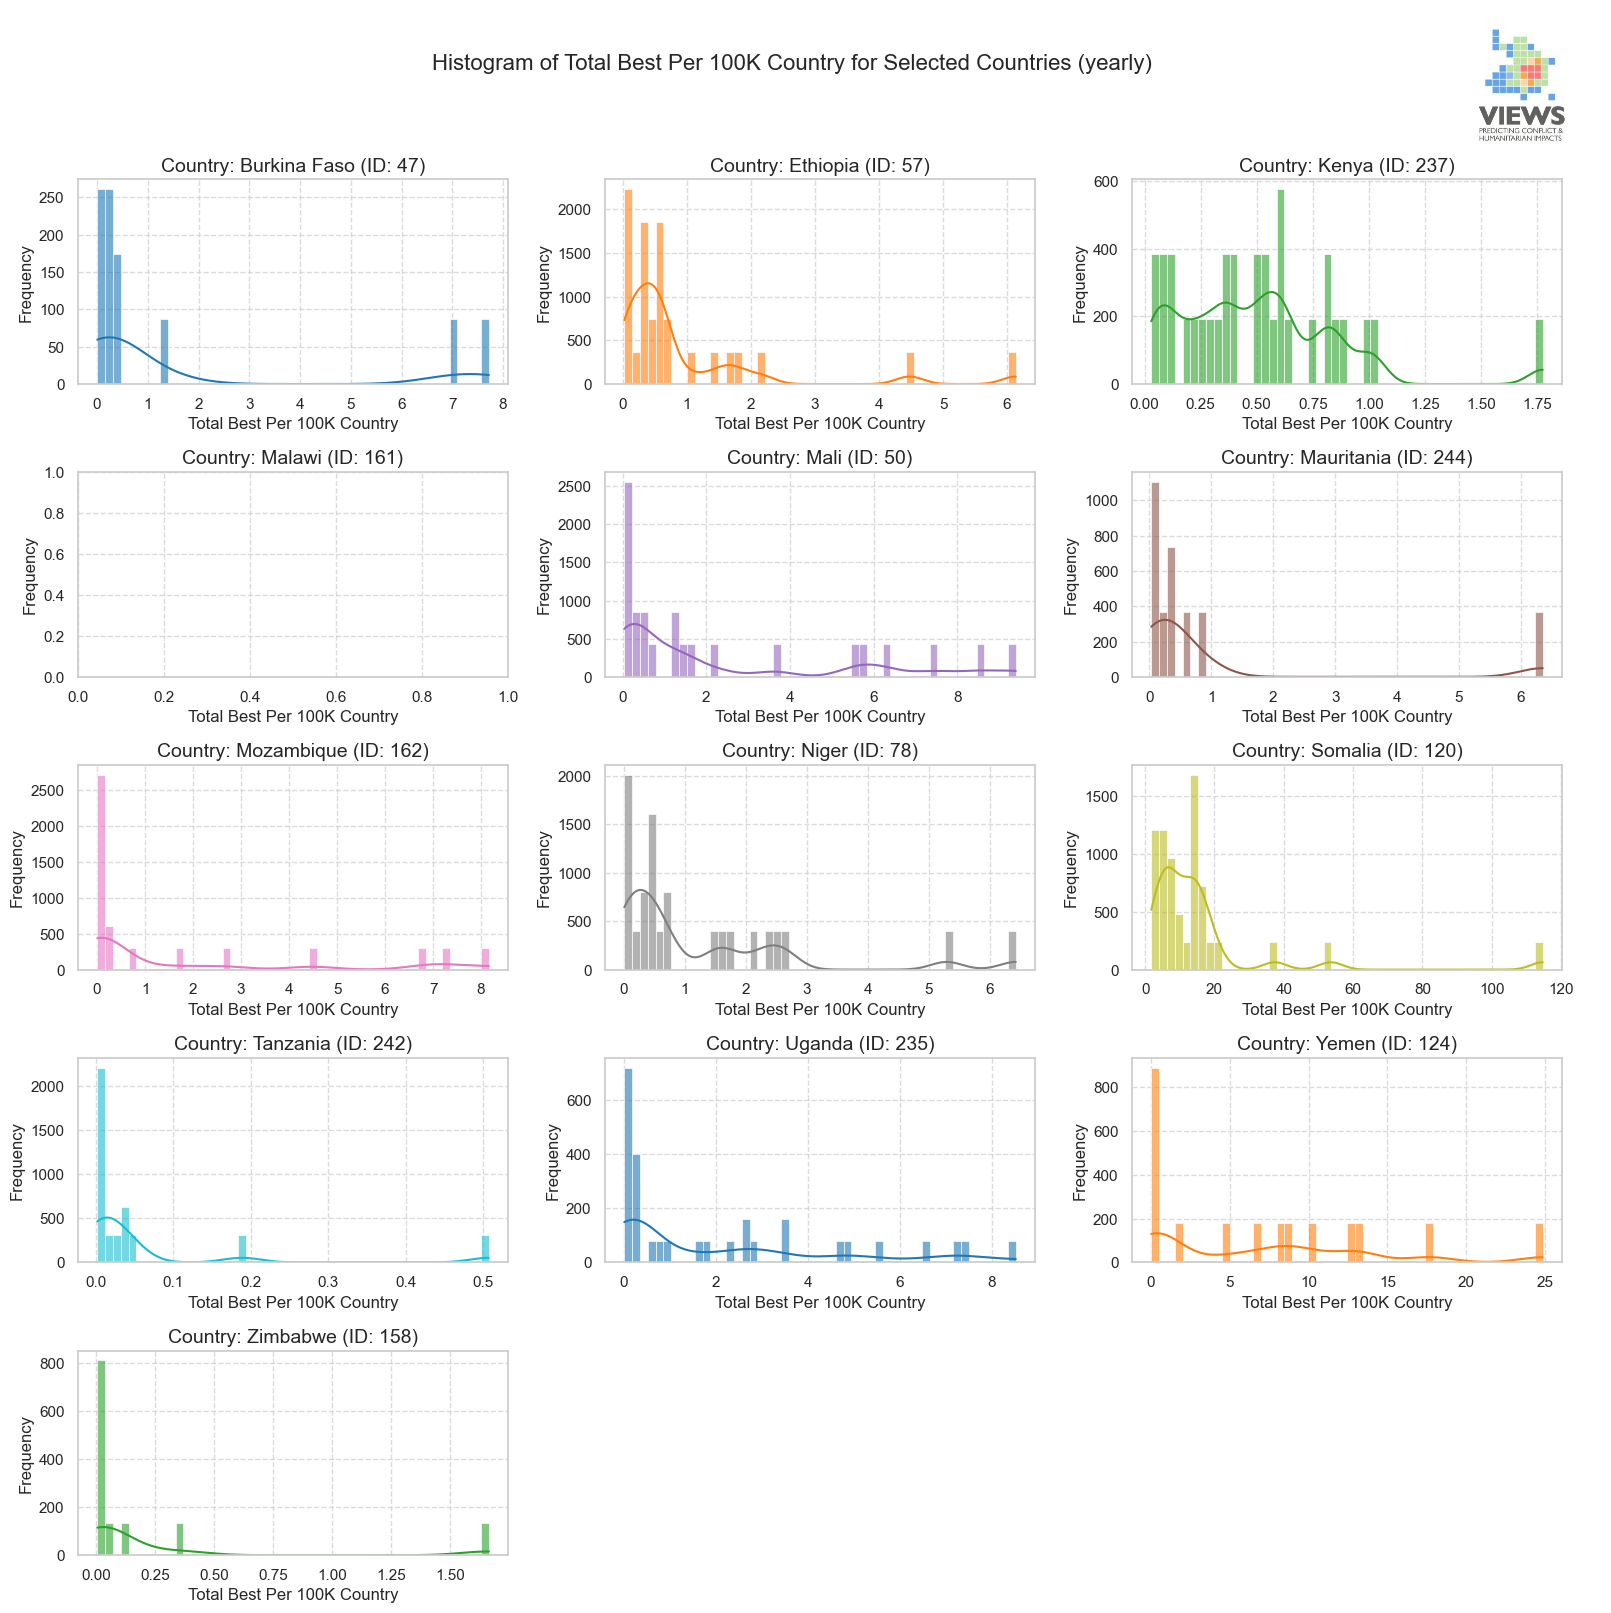

In [12]:
# creating histograms 

plot_feature_histograms(df_yearly_2020, country_ids, "total_best_per_100k_country", figsize=(16,16))
# need to make all the same scale?

# create a save function

unique_values: [0.00000000e+00 1.32100533e+00 2.05962239e+01 4.85879276e+00
 3.82958857e-01 6.43330792e+00 2.07811606e+00 9.81019119e-02
 2.56552920e+01 1.12219350e+01 6.71190678e+00 6.12803133e+00
 5.18061234e+00 8.91065322e+01 5.51741974e+01 1.63572909e+00
 1.66716831e+00 1.53071354e+01 1.50504630e+01 2.90860068e+00
 1.24953911e+00 7.83992314e+01 2.41658943e+00 1.81244208e+00
 2.03513554e+01 4.98634310e+01 3.92656799e+01 2.00082534e+01
 2.35879665e+01 1.01789750e+02 1.28805660e+02 4.43535209e+01
 2.50573579e+01 1.12108278e+01 1.75692440e+02]
vmin: 0.0, vmax: 175.69243978203158
unique_values: [0.00000000e+00 1.32100533e+00 2.05962239e+01 4.85879276e+00
 3.82958857e-01 6.43330792e+00 2.07811606e+00 9.81019119e-02
 2.56552920e+01 1.12219350e+01 6.71190678e+00 6.12803133e+00
 5.18061234e+00 8.91065322e+01 5.51741974e+01 1.63572909e+00
 1.66716831e+00 1.53071354e+01 1.50504630e+01 2.90860068e+00
 1.24953911e+00 7.83992314e+01 2.41658943e+00 1.81244208e+00
 2.03513554e+01 4.98634310e+01 3.

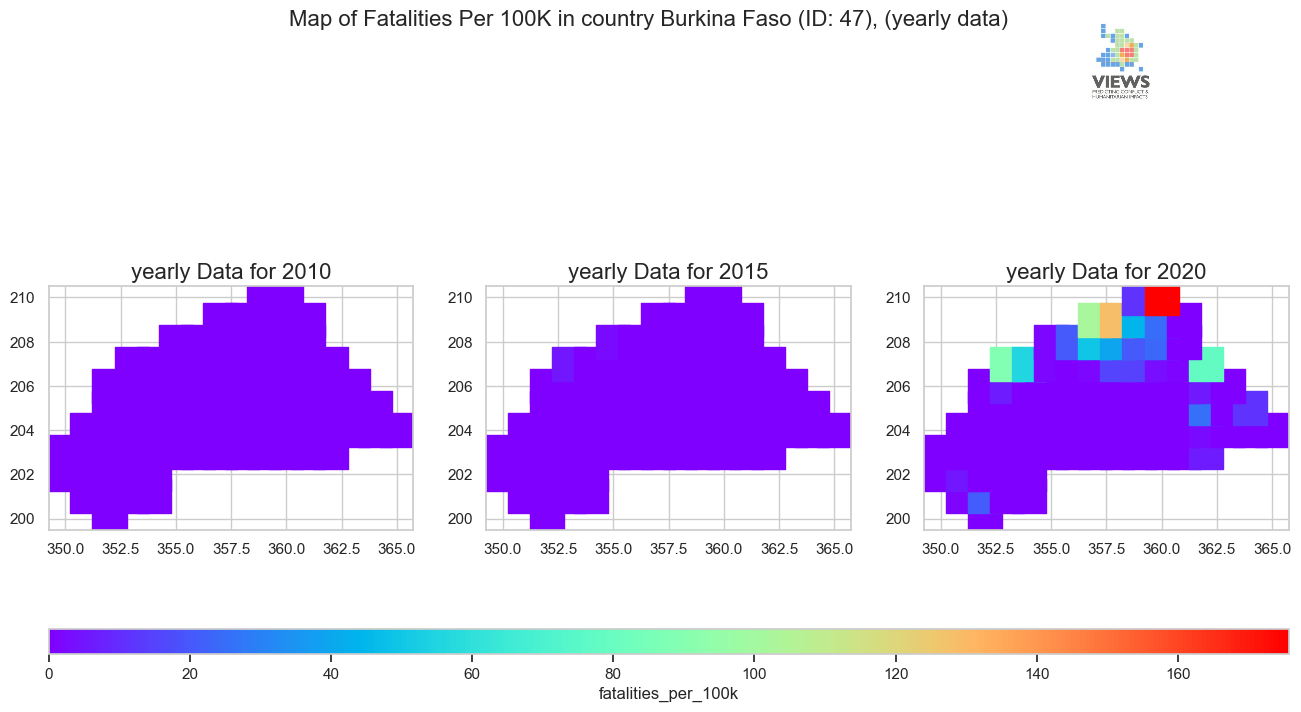

In [13]:
# creating maps of total_best_per_100k_country for each country

# burkina faso

plot_country_period_map(df_yearly_2020, 47, "fatalities_per_100k", [2010, 2015, 2020], figsize=(16, 8))


unique_values: [0.00000000e+00 1.32100533e+00 2.05962239e+01 4.85879276e+00
 3.82958857e-01 6.43330792e+00 2.07811606e+00 9.81019119e-02
 2.56552920e+01 1.12219350e+01 6.71190678e+00 6.12803133e+00
 5.18061234e+00 8.91065322e+01 5.51741974e+01 1.63572909e+00
 1.66716831e+00 1.53071354e+01 1.50504630e+01 2.90860068e+00
 1.24953911e+00 7.83992314e+01 2.41658943e+00 1.81244208e+00
 2.03513554e+01 4.98634310e+01 3.92656799e+01 2.00082534e+01
 2.35879665e+01 1.01789750e+02 1.28805660e+02 4.43535209e+01
 2.50573579e+01 1.12108278e+01 1.75692440e+02]
vmin: 0.0, vmax: 175.69243978203158
unique_values: [0.00000000e+00 1.32100533e+00 2.05962239e+01 4.85879276e+00
 3.82958857e-01 6.43330792e+00 2.07811606e+00 9.81019119e-02
 2.56552920e+01 1.12219350e+01 6.71190678e+00 6.12803133e+00
 5.18061234e+00 8.91065322e+01 5.51741974e+01 1.63572909e+00
 1.66716831e+00 1.53071354e+01 1.50504630e+01 2.90860068e+00
 1.24953911e+00 7.83992314e+01 2.41658943e+00 1.81244208e+00
 2.03513554e+01 4.98634310e+01 3.

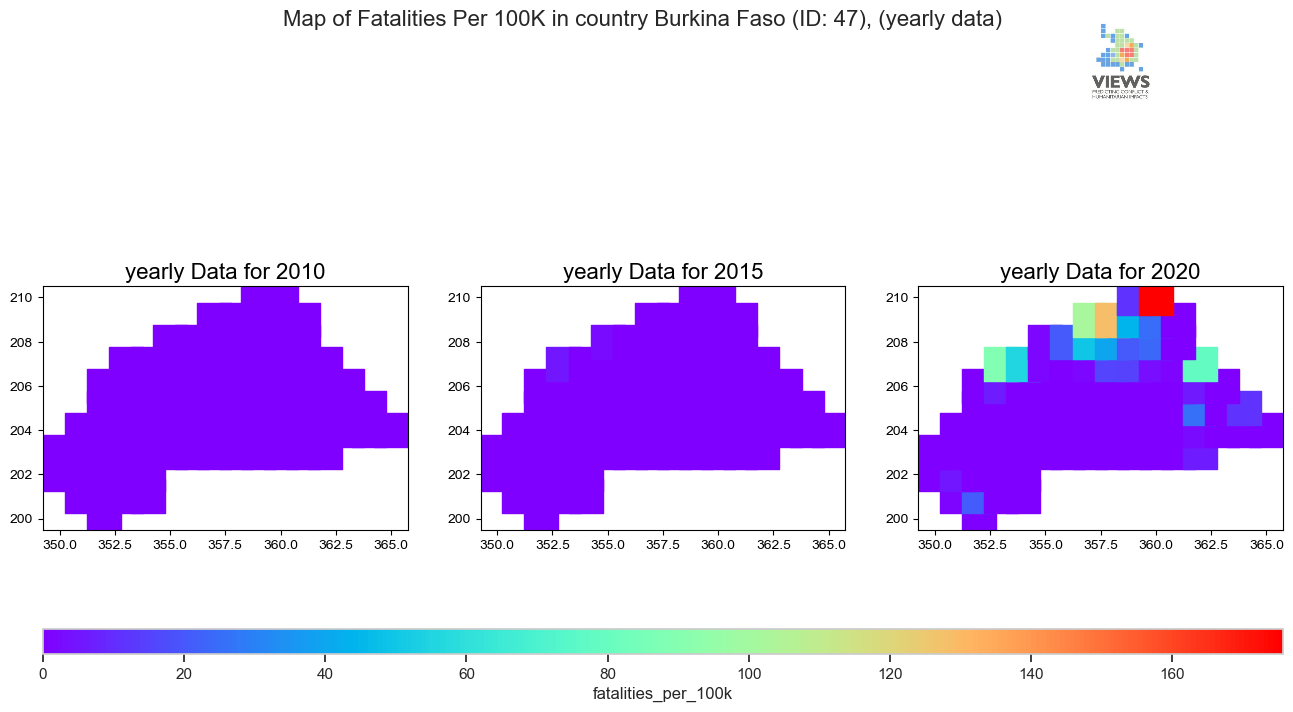

unique_values: [0.00000000e+00 2.27750247e+00 6.60860389e+01 2.48224420e+00
 2.43153219e+00 3.21139795e+01 6.51680687e+01 1.05553900e+01
 1.35208959e+01 2.63559563e-01 1.20550785e+01 2.13506852e+01
 2.49497621e+01 4.22730906e+01 2.21281439e+00 2.83574277e+00
 9.19937085e+00 3.62292024e+00 6.31369582e-02 3.58921173e-01
 7.17842345e-01 6.35660305e-01 2.33075445e+00 1.44762400e+00
 4.49918168e-01 7.47938261e-01 1.85040034e+00 2.54793958e+00
 4.75932502e+00 4.72035319e+00 2.37851464e+00 1.58502143e+00
 4.47106998e-01 8.04792596e+00 9.41864918e-01 6.25525476e+00
 3.52131430e-01 1.30435970e+00 2.42708174e-01 4.52351507e+00
 1.99034663e+01 8.28052129e-01 3.26881259e+00 8.17203148e-01
 1.43039093e+01 2.02094291e-01 4.04188581e-01 5.11034513e-01
 2.08663459e+01 3.98814648e+00 4.75315057e-01 3.01032870e+00
 1.24590433e+00 9.09962224e-01 3.42672773e-01 9.25314271e-01
 1.32977830e+03 1.33436914e+01 4.66853124e+01 2.82403374e+01
 1.56178761e+02 2.61217026e+01 2.90241141e+00 6.64100196e-01
 1.816790

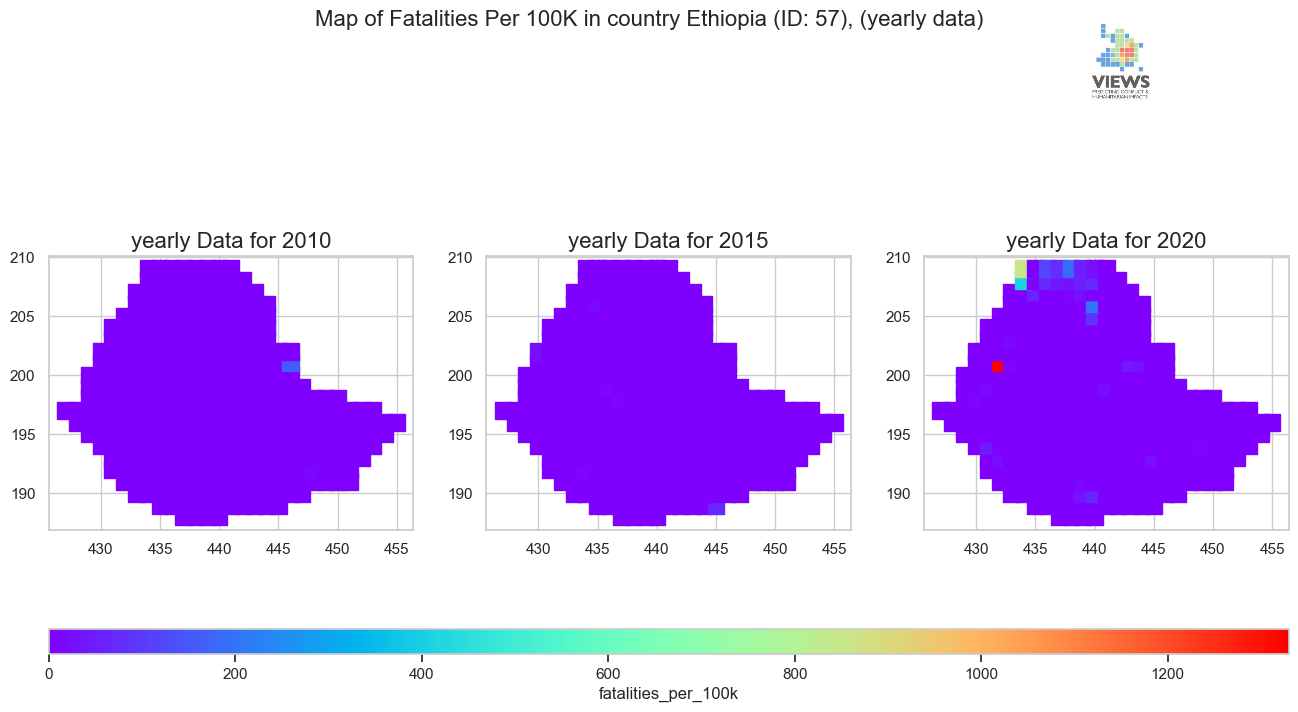

unique_values: [0.00000000e+00 3.64419949e-01 6.63528133e-01 1.43725502e-01
 9.84486752e+00 1.43026636e+00 2.86053272e+01 9.69621310e+00
 6.33569453e+01 2.18780419e+02 7.29268063e+01 2.62162088e-01
 1.09920864e-01 4.84806200e+01 4.98682574e-02 1.06762738e+01
 1.18472103e+01 8.79593449e+00 7.91634104e+01 1.17462338e+02
 2.94825189e+01 2.43291313e+00 7.30059497e-02 3.82423254e-01
 5.49688433e-01 5.87145661e+00 1.21904866e+00 7.52805778e-02
 4.21529394e+00 2.54680385e+01 1.18763619e+00 1.50474636e+00
 4.53590595e+02 1.20957492e+01 7.70254921e+00 5.78463880e+00
 5.95554096e+00 9.37033599e+01 5.11786798e+01 5.78427013e+01
 3.96183208e+00 2.05554896e+01 2.12460316e+01 4.17105225e+01
 1.05250557e+02 4.83019814e+01 2.69947115e+00 2.17867705e+00
 1.57102694e+01 9.49062588e+00 4.72871473e+01 2.02659203e+01
 2.71641094e+01 8.14923283e+00 4.61488305e+00 3.50207115e+01]
vmin: 0.0, vmax: 453.59059479901686
unique_values: [0.00000000e+00 3.64419949e-01 6.63528133e-01 1.43725502e-01
 9.84486752e+00 1.

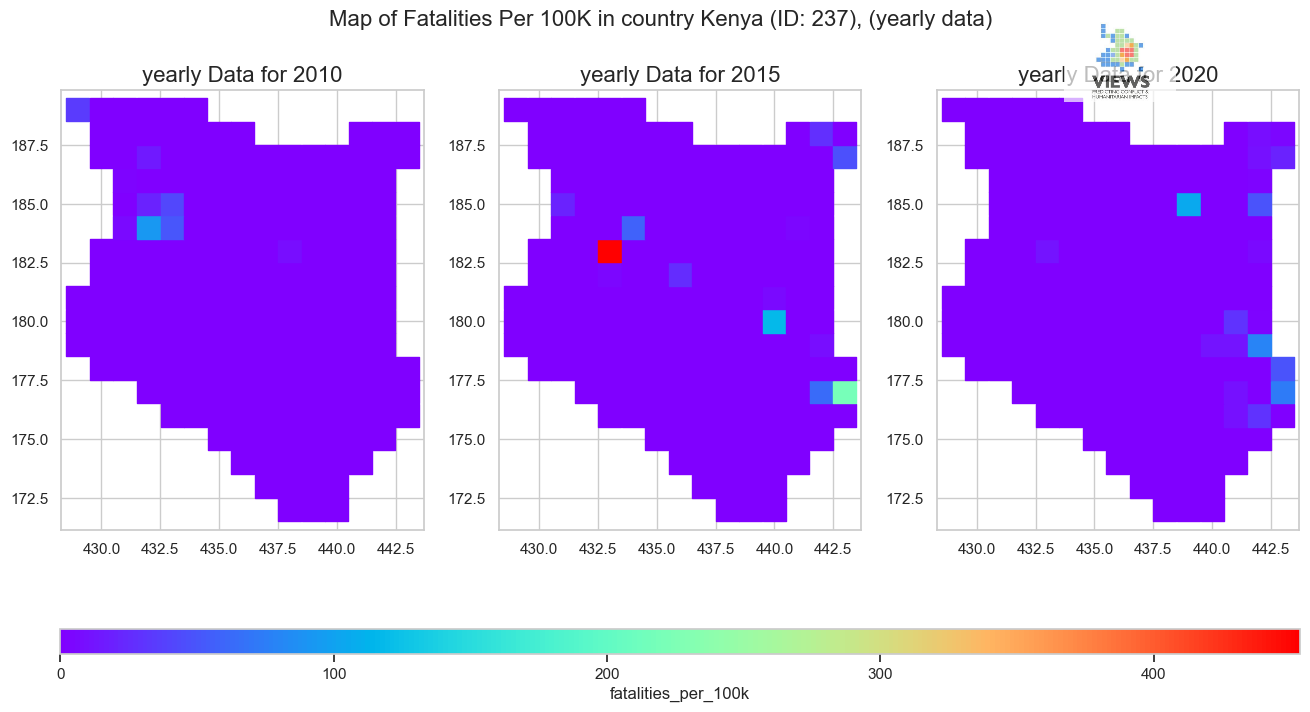

unique_values: [0.]
vmin: 0.0, vmax: 0.0
unique_values: [0.]
vmin: 0.0, vmax: 0.0
unique_values: [0.]
vmin: 0.0, vmax: 0.0


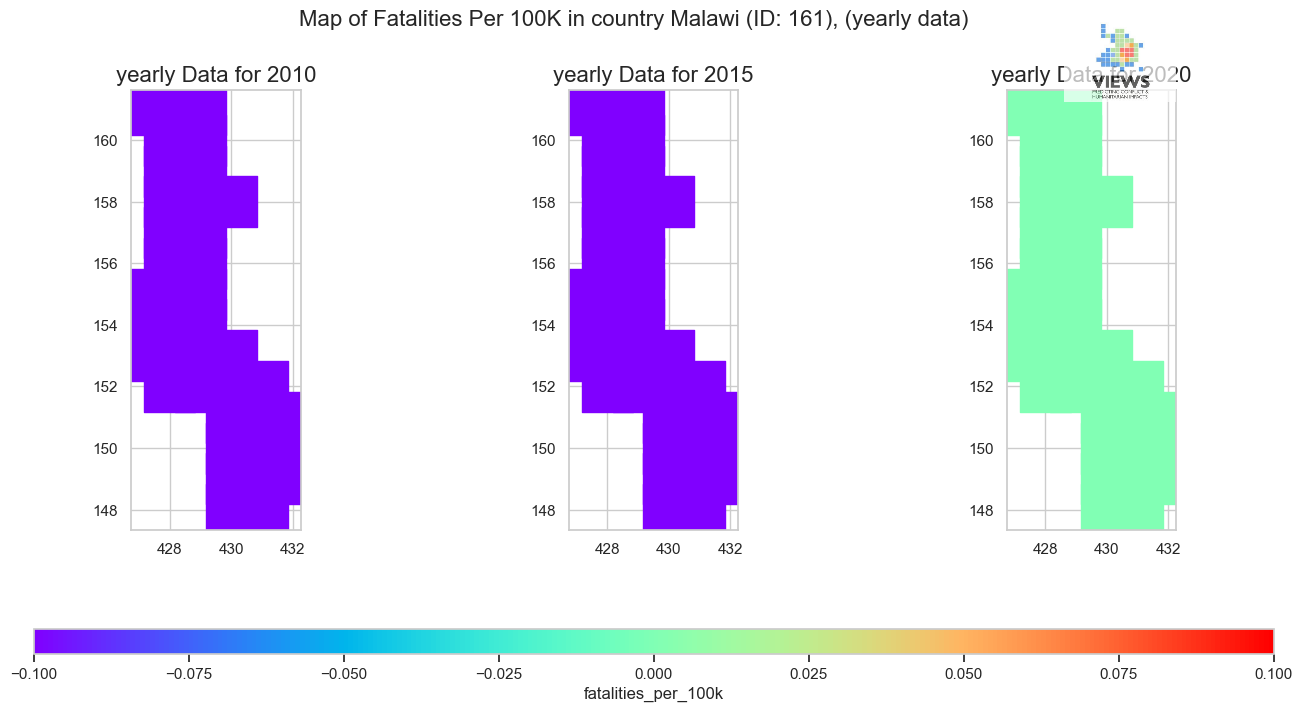

unique_values: [0.00000000e+00 4.67695880e+00 1.47783871e+00 3.76159924e-01
 1.38754395e+00 2.50655228e+00 1.32407077e+00 7.89897397e+01
 2.58655820e+01 3.15736375e+01 3.28001699e+01 6.76225796e+00
 2.60884947e+01 6.86539334e+00 2.71712279e+01 6.68982154e+01
 4.71517611e+01 7.67141211e+01 4.85875520e+01 6.11382753e+00
 8.83751470e+00 8.99321171e+01 7.72762302e+00 3.32287790e+02
 3.66509894e+01 8.21736866e+00 2.16751774e+00 7.36956031e+01
 2.02122727e+01 1.14697557e+02 6.22867712e+01 1.12880636e+02
 8.82586511e+01 2.22083094e+02 3.91990306e+01 1.18763719e+02
 3.23901051e+01 1.56290208e+01 1.30030458e+01 6.33898483e+01
 4.28868883e+01 2.39473099e+01 1.81914728e+02 3.37731595e+01
 3.61724236e+02 1.65953007e+01 1.77971430e+02 7.37336649e+01
 1.45609504e+01 6.22967375e+01 9.46825690e+00 9.86058696e+00
 1.97211739e+01 2.04282675e+02 1.48895576e+02 8.59234574e+02
 1.88735565e+01 8.49310042e+01 6.42772438e+00 1.00496368e+03
 2.90155529e+02 1.65803159e+02 8.08892845e+01 6.49538060e+00
 6.968881

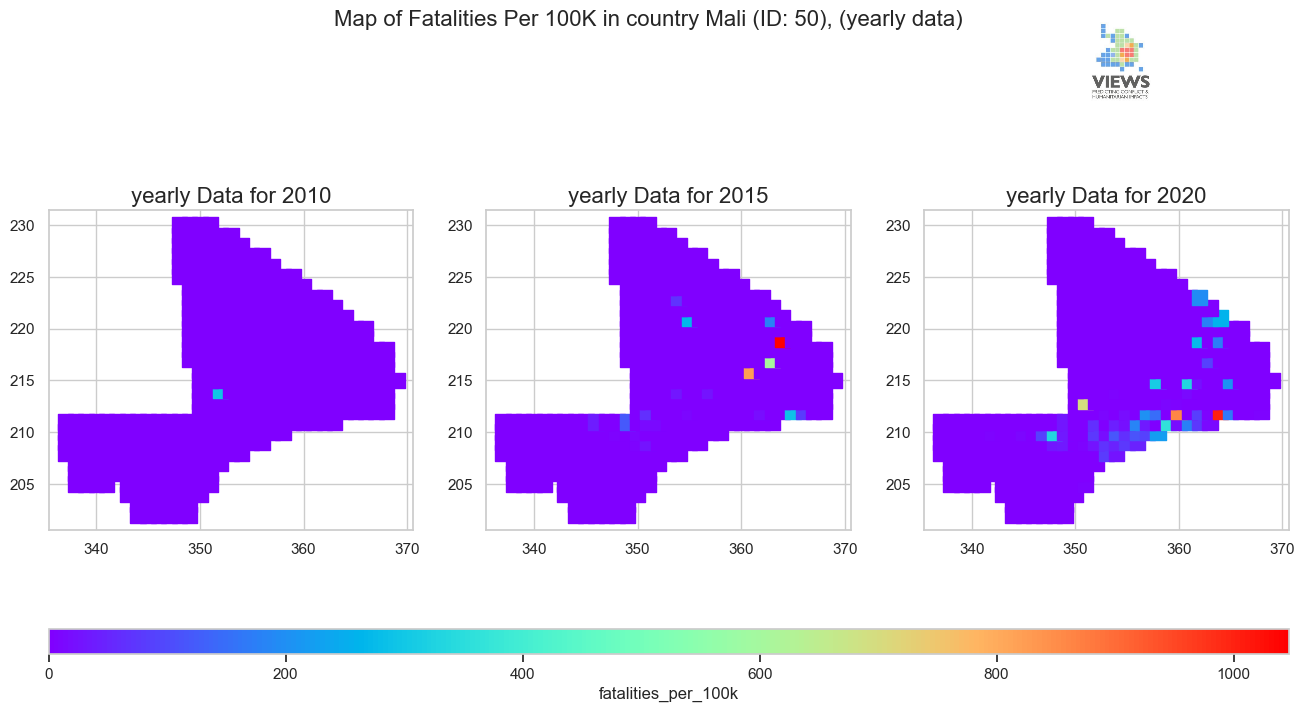

unique_values: [ 0.         58.25043344  8.17117136]
vmin: 0.0, vmax: 58.25043344143731
unique_values: [ 0.         58.25043344  8.17117136]
vmin: 0.0, vmax: 58.25043344143731
unique_values: [ 0.         58.25043344  8.17117136]
vmin: 0.0, vmax: 58.25043344143731


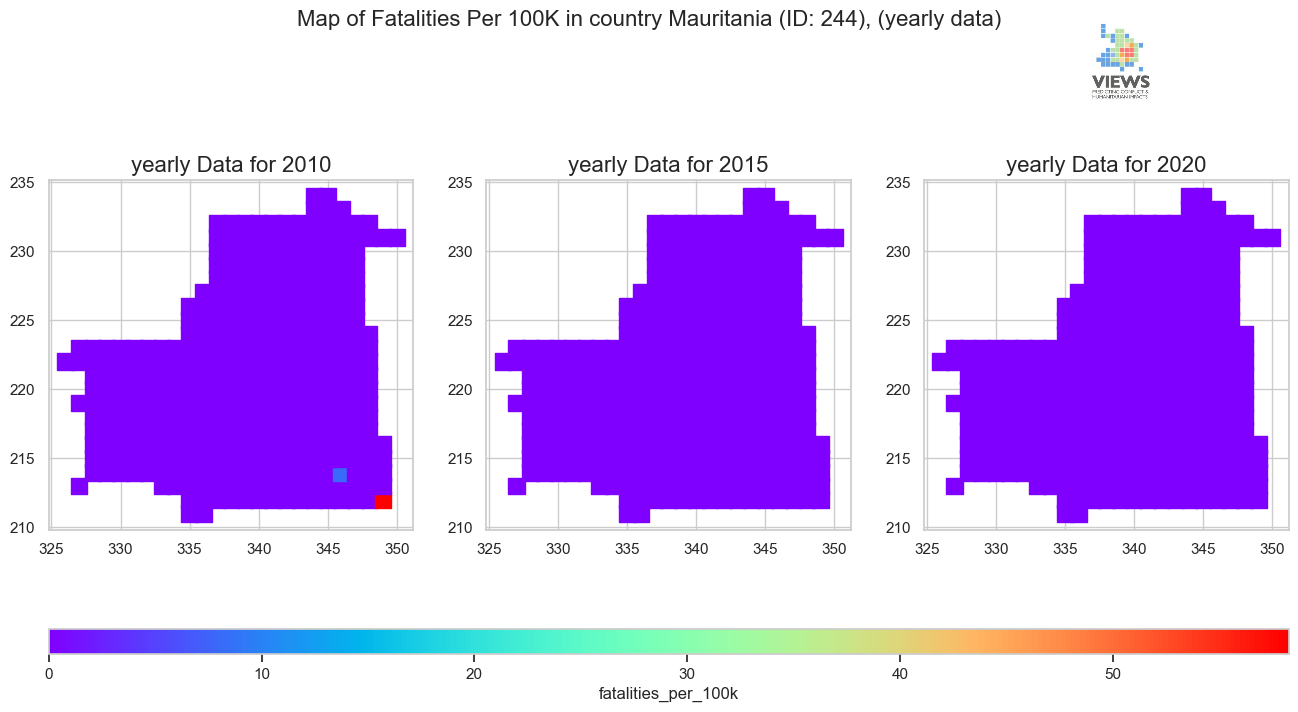

unique_values: [0.00000000e+00 5.55725361e-01 1.41970564e+02 6.39239540e+01
 8.49449086e+00 3.06536871e+02 5.51425409e+02 6.98074747e+01
 1.91576305e+01 1.99337781e+02 6.07278226e+02 6.01972780e+02
 6.49252692e+01 4.51596628e+02 7.45778821e+02 1.16286966e+02
 3.25410354e+01]
vmin: 0.0, vmax: 745.778820864692
unique_values: [0.00000000e+00 5.55725361e-01 1.41970564e+02 6.39239540e+01
 8.49449086e+00 3.06536871e+02 5.51425409e+02 6.98074747e+01
 1.91576305e+01 1.99337781e+02 6.07278226e+02 6.01972780e+02
 6.49252692e+01 4.51596628e+02 7.45778821e+02 1.16286966e+02
 3.25410354e+01]
vmin: 0.0, vmax: 745.778820864692
unique_values: [0.00000000e+00 5.55725361e-01 1.41970564e+02 6.39239540e+01
 8.49449086e+00 3.06536871e+02 5.51425409e+02 6.98074747e+01
 1.91576305e+01 1.99337781e+02 6.07278226e+02 6.01972780e+02
 6.49252692e+01 4.51596628e+02 7.45778821e+02 1.16286966e+02
 3.25410354e+01]
vmin: 0.0, vmax: 745.778820864692


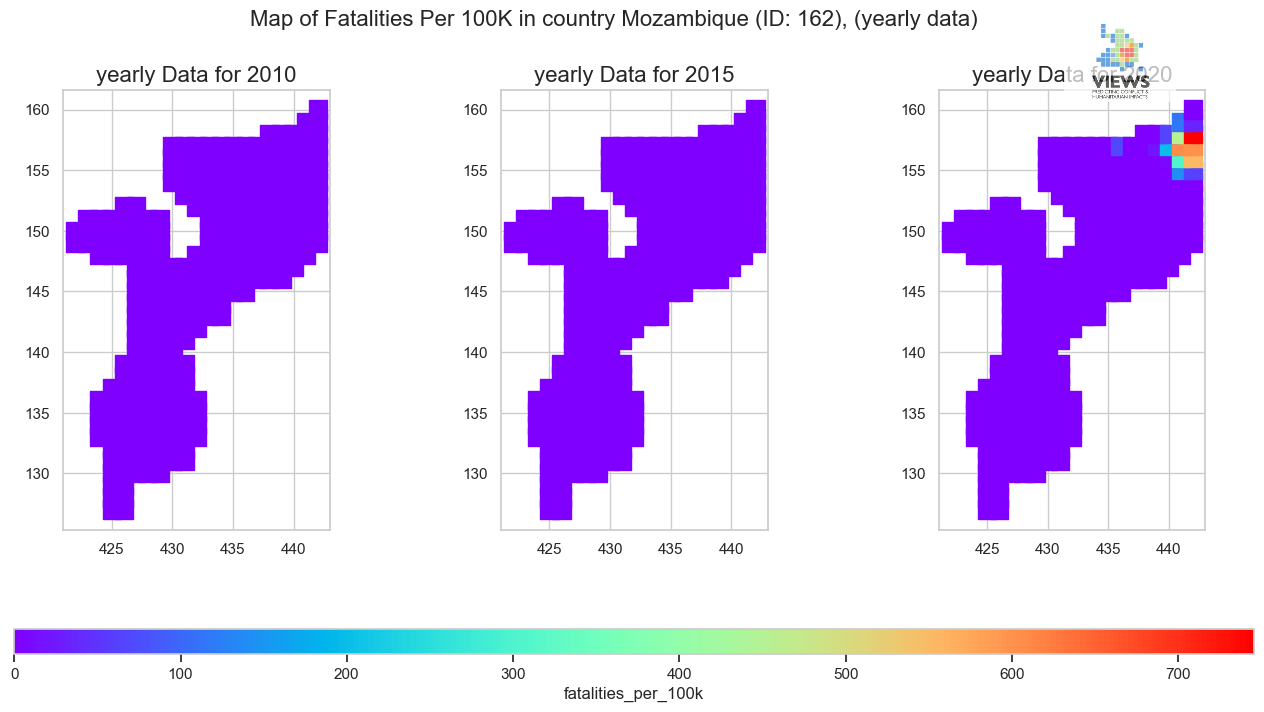

unique_values: [0.00000000e+00 9.22481883e+00 4.39901484e-01 1.98494937e+00
 3.01487464e+00 4.45168578e+00 5.46893943e+02 5.12242260e+01
 7.36264338e+01 3.14334719e+00 9.50164468e-01 9.21042217e+01
 6.09304851e+01 7.99581356e+02 2.10719996e+02 1.96522790e+00
 1.37622903e+01 1.05068462e+00 2.51225606e+02 5.76676957e+01
 8.80998726e+01 1.39923117e+02 3.92624599e+01 8.15714051e+00
 8.93646522e+00 1.83866471e+02 3.98896342e+02 7.68518831e+01
 5.65679717e+01 2.15371850e+02]
vmin: 0.0, vmax: 799.5813563769241
unique_values: [0.00000000e+00 9.22481883e+00 4.39901484e-01 1.98494937e+00
 3.01487464e+00 4.45168578e+00 5.46893943e+02 5.12242260e+01
 7.36264338e+01 3.14334719e+00 9.50164468e-01 9.21042217e+01
 6.09304851e+01 7.99581356e+02 2.10719996e+02 1.96522790e+00
 1.37622903e+01 1.05068462e+00 2.51225606e+02 5.76676957e+01
 8.80998726e+01 1.39923117e+02 3.92624599e+01 8.15714051e+00
 8.93646522e+00 1.83866471e+02 3.98896342e+02 7.68518831e+01
 5.65679717e+01 2.15371850e+02]
vmin: 0.0, vmax: 

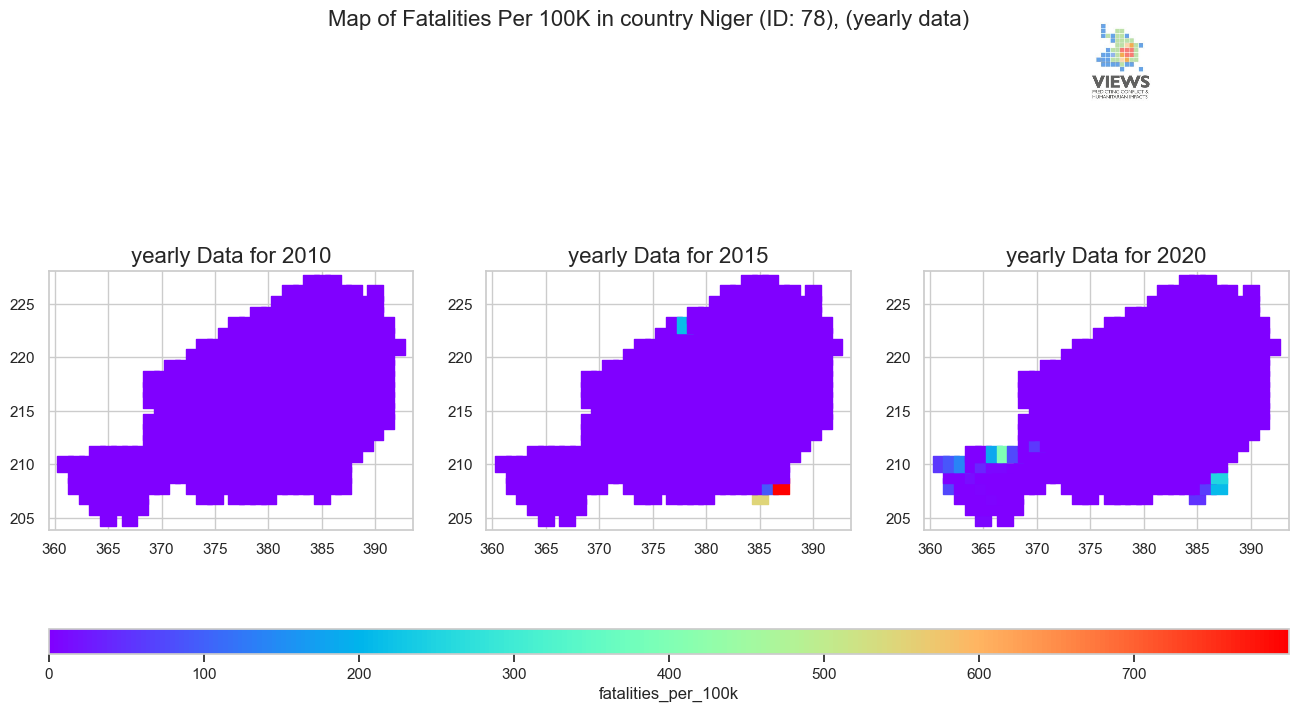

unique_values: [0.00000000e+00 2.60594277e+00 9.81922199e-01 7.47230209e+00
 2.64760070e+01 5.34711513e+01 9.91285527e+01 3.41822595e+01
 1.36729038e+01 5.81098451e+01 6.83645236e+00 3.41822618e+01
 9.40261651e+00 5.97066149e+01 3.07672482e+01 6.83716628e+00
 4.44415808e+01 2.05319793e+00 6.84399310e+00 2.41073536e+01
 6.41663300e+01 2.54261124e+01 3.17826405e+00 7.20778432e+00
 1.29026941e+00 9.41667191e+00 4.84727046e+01 3.69015325e+01
 4.43961911e+02 3.86053835e+00 9.94045435e+01 4.32890754e+01
 1.08400105e+01 4.41385436e+00 6.12582450e+01 1.41991356e+02
 1.94366434e+01 2.52973106e+01 1.02091309e+00 9.61840030e+00
 1.15420804e+02 4.44560773e+01 4.00015626e+00 6.40025001e+00
 5.73518062e+01 2.42642257e+01 2.20583870e+00 7.96267562e+01
 5.20228141e+01 2.26568368e+01 2.43084322e+00 1.09382355e+02
 5.04841640e+01 2.10350683e+02 2.58971319e+01 2.88150733e+02
 1.62084787e+02 1.97808651e+00 7.41782441e+01 2.84125172e+01
 4.47712392e+01 1.54245329e+00 1.48648788e+00 7.13284966e+00
 4.941456

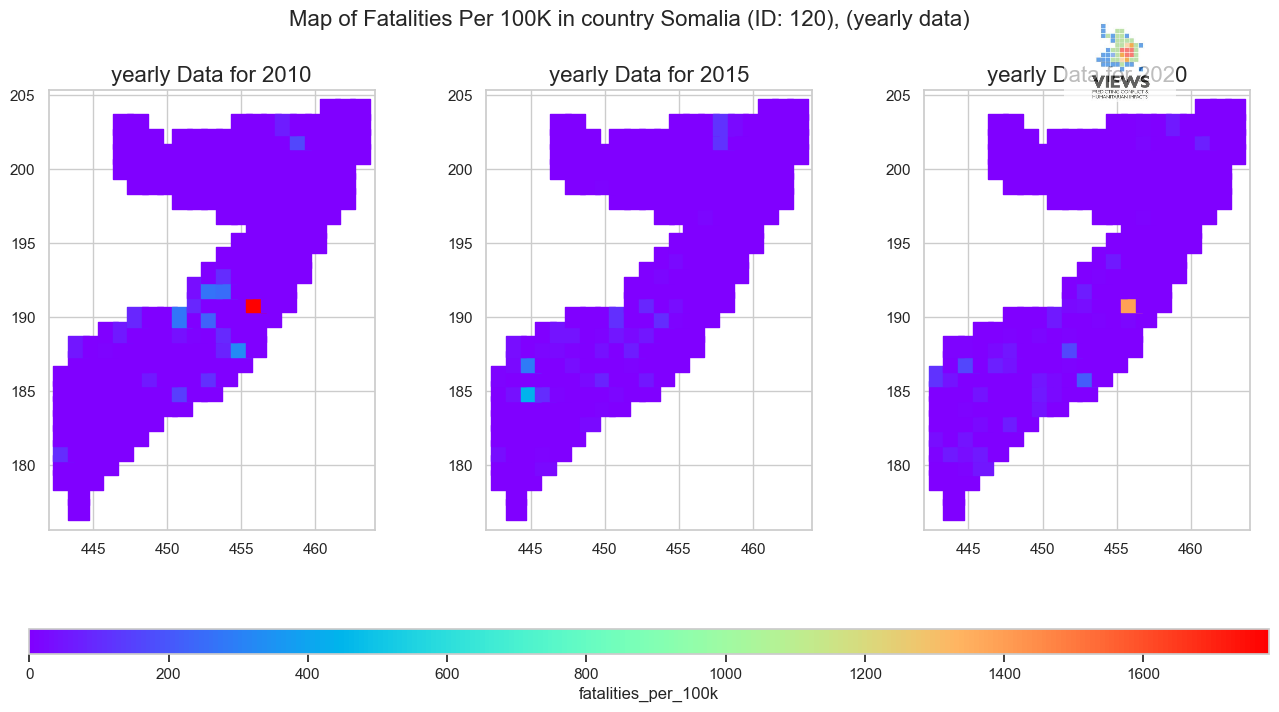

unique_values: [0.         1.53950839 0.4406396  1.40329412 2.00212583 2.35331559
 1.05759479]
vmin: 0.0, vmax: 2.353315587250141
unique_values: [0.         1.53950839 0.4406396  1.40329412 2.00212583 2.35331559
 1.05759479]
vmin: 0.0, vmax: 2.353315587250141
unique_values: [0.         1.53950839 0.4406396  1.40329412 2.00212583 2.35331559
 1.05759479]
vmin: 0.0, vmax: 2.353315587250141


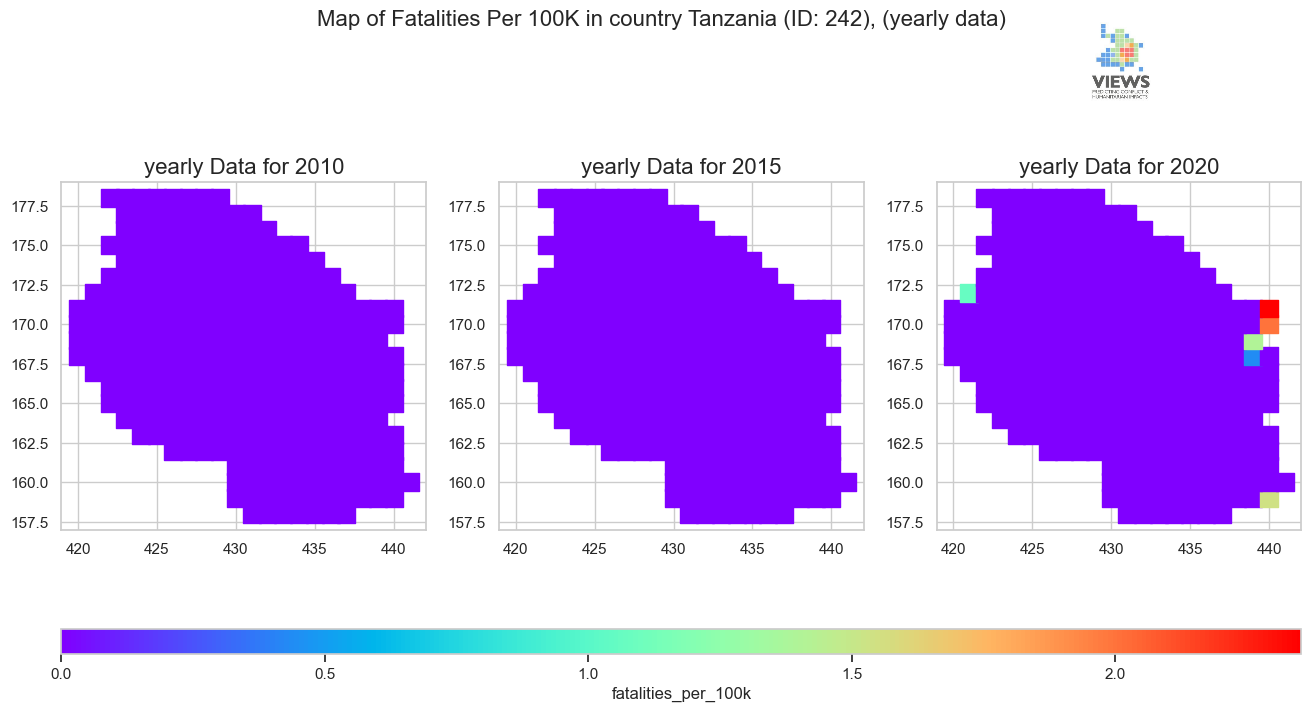

unique_values: [ 0.          1.29374907  3.64381423  0.65068111  1.04108978  2.13701898
  2.42099104  0.20572456 14.09759501]
vmin: 0.0, vmax: 14.097595006933938
unique_values: [ 0.          1.29374907  3.64381423  0.65068111  1.04108978  2.13701898
  2.42099104  0.20572456 14.09759501]
vmin: 0.0, vmax: 14.097595006933938
unique_values: [ 0.          1.29374907  3.64381423  0.65068111  1.04108978  2.13701898
  2.42099104  0.20572456 14.09759501]
vmin: 0.0, vmax: 14.097595006933938


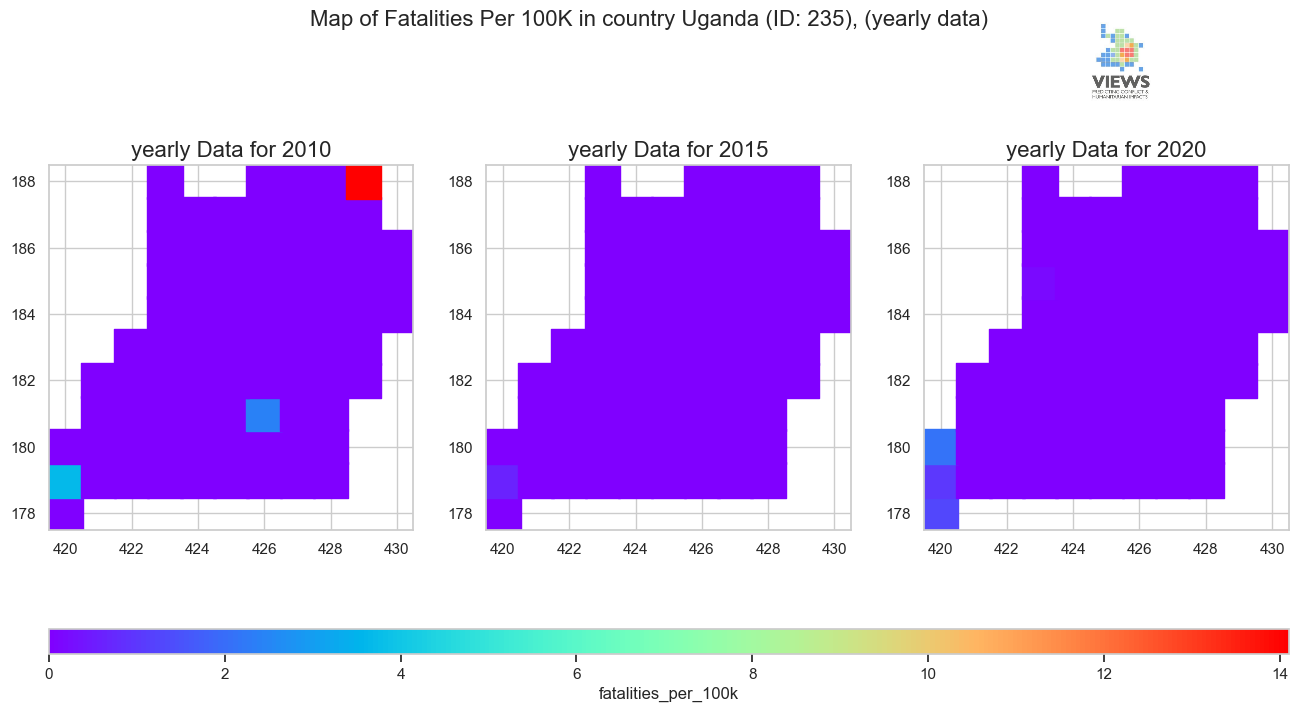

unique_values: [0.00000000e+00 6.18331052e+00 3.96174931e+01 2.45800504e+01
 6.46843431e-01 3.31963450e+00 3.94131150e+02 8.44997872e+00
 1.41531392e+01 4.58253970e+02 1.79005457e+00 1.03686932e+01
 2.36248705e+00 5.01080907e+00 2.11995769e+00 5.77796039e-01
 1.53115950e+02 3.46677623e+00 1.72466728e+01 4.51981769e+01
 1.19537284e+02 4.00612212e+01 1.66921755e+02 3.08219986e+00
 3.49315984e+01 7.17218680e-01 1.91258315e+00 6.28126619e+01
 1.55733872e+01 4.44389606e+01 2.24416751e+01 5.76909469e+00
 2.06039096e-01 8.39553157e+00 7.08955999e+01 9.32836841e+00
 1.52899468e+01 2.86686503e+00 4.69142861e+00 1.17285715e+00
 1.13862201e+01 1.40430048e+01 1.39884326e-01 4.40309148e+00
 1.95027061e+01 1.85740059e+00 1.19343128e+00 2.30730047e+01
 5.56268240e+00 3.40751300e+00 5.79277210e+01 1.70375650e+01
 1.02989843e+01 2.57474609e+00 5.14949217e+00 2.79556187e+00
 1.39778094e+01 2.05284842e+01 2.37869738e+01 1.63618910e+00
 1.17050451e+01 3.99489345e+00 1.15971335e+01 3.29582267e+01
 4.074835

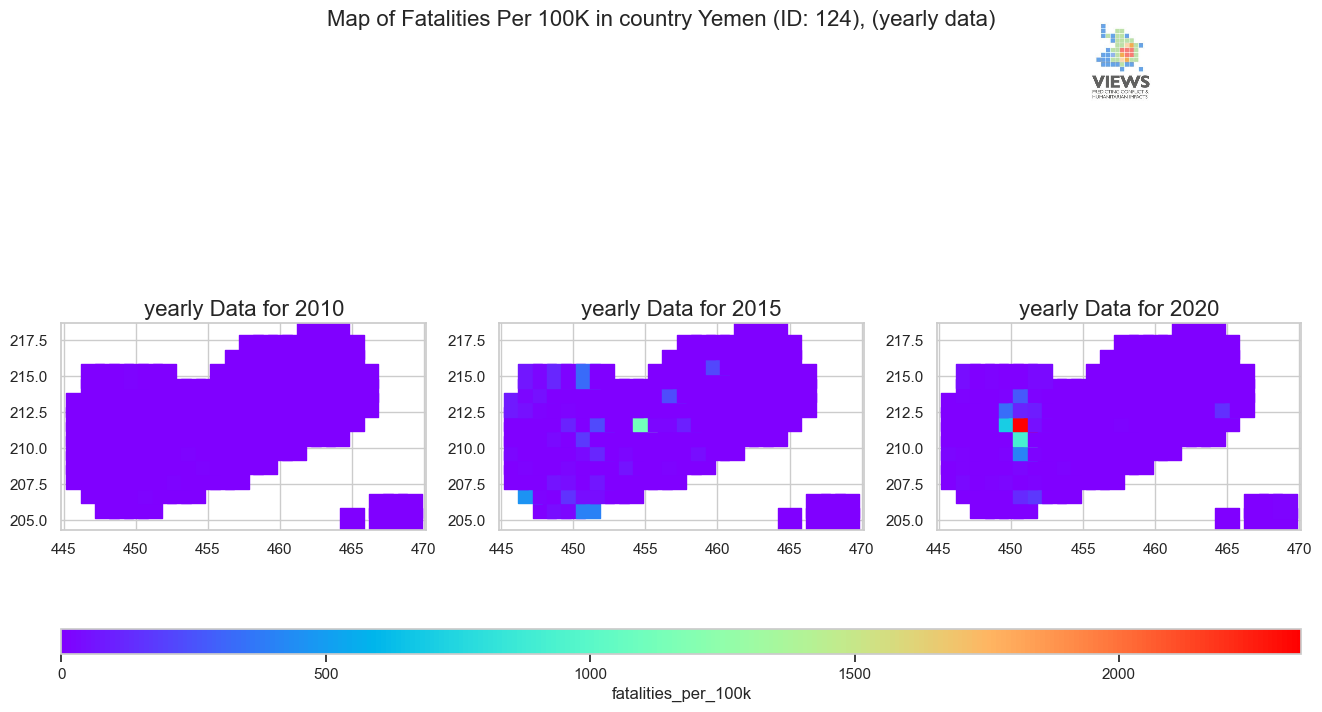

unique_values: [0.]
vmin: 0.0, vmax: 0.0
unique_values: [0.]
vmin: 0.0, vmax: 0.0
unique_values: [0.]
vmin: 0.0, vmax: 0.0


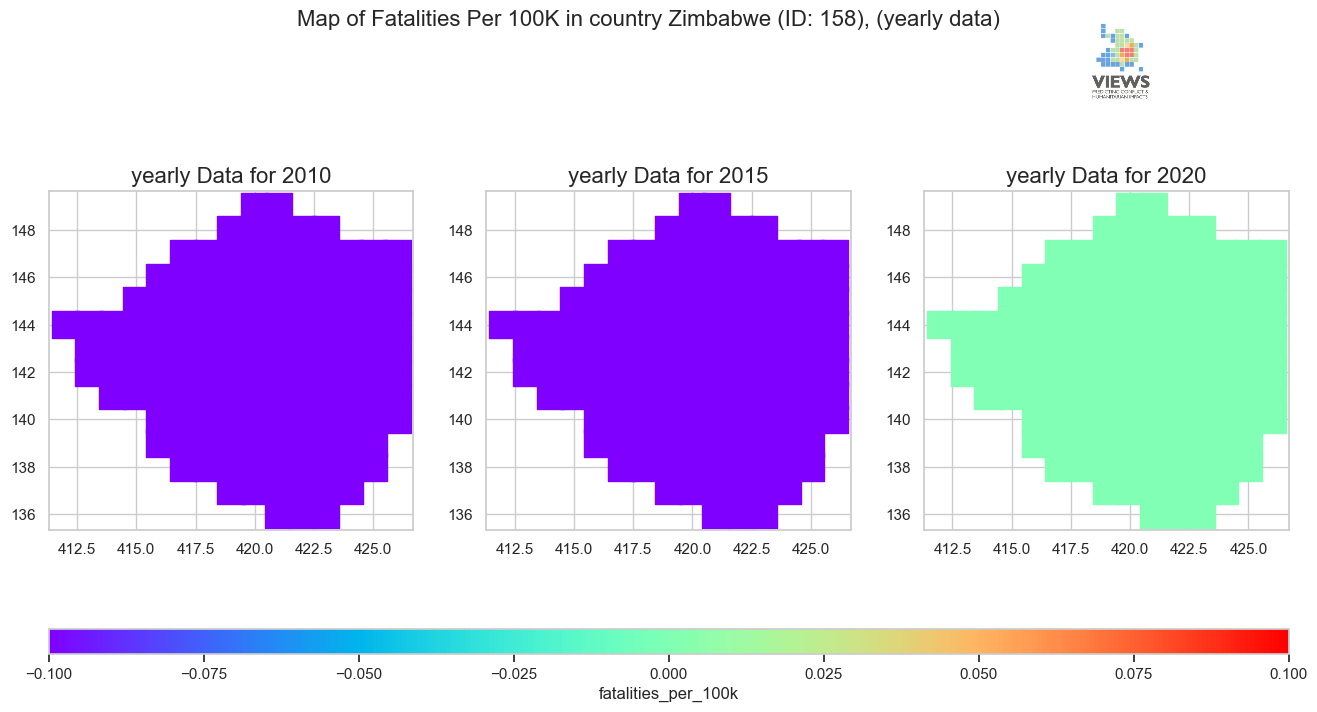

In [9]:
# plotting fatalities per 100k for all countries
country_ids = [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158]

country_list = ["Burkina Faso", "Ethiopia", "Kenya","Malawi", "Mali", "Mauritania", "Mozambique", "Niger", "Somalia", "Tanzania", "Uganda", "Yemen", "Zimbabwe"]

base_save_path = "/Users/alexatimlick/Documents/FAO" # need to make dynamic function to save plots

# need to fix function to allow for saving of multiple plots, currently saving a png in utils folder
# need to fix titles

for idx, country_id in enumerate(country_ids):
    save_path_maps = os.path.join(base_save_path, f"{country_list[idx].replace(' ', '_').replace('/', '_')}.png")
    plot_country_period_map(df_yearly, country_id, "fatalities_per_100k", [2010, 2015, 2020], figsize=(16, 8), save_plot=False)

unique_values: [ 1.         12.63485477 16.28342246 17.01117318 14.1627907  20.71428571
 15.77720207 17.91176471 15.37878788 70.81395349 62.14285714 54.375
 35.40697674 59.70588235 14.7815534  84.58333333 29.85294118 28.19444444
 92.27272727 39.54545455 22.7238806  43.5       ]
vmin: 1.0, vmax: 92.27272727272728
unique_values: [ 1.         12.63485477 16.28342246 17.01117318 14.1627907  20.71428571
 15.77720207 17.91176471 15.37878788 70.81395349 62.14285714 54.375
 35.40697674 59.70588235 14.7815534  84.58333333 29.85294118 28.19444444
 92.27272727 39.54545455 22.7238806  43.5       ]
vmin: 1.0, vmax: 92.27272727272728
unique_values: [ 1.         12.63485477 16.28342246 17.01117318 14.1627907  20.71428571
 15.77720207 17.91176471 15.37878788 70.81395349 62.14285714 54.375
 35.40697674 59.70588235 14.7815534  84.58333333 29.85294118 28.19444444
 92.27272727 39.54545455 22.7238806  43.5       ]
vmin: 1.0, vmax: 92.27272727272728


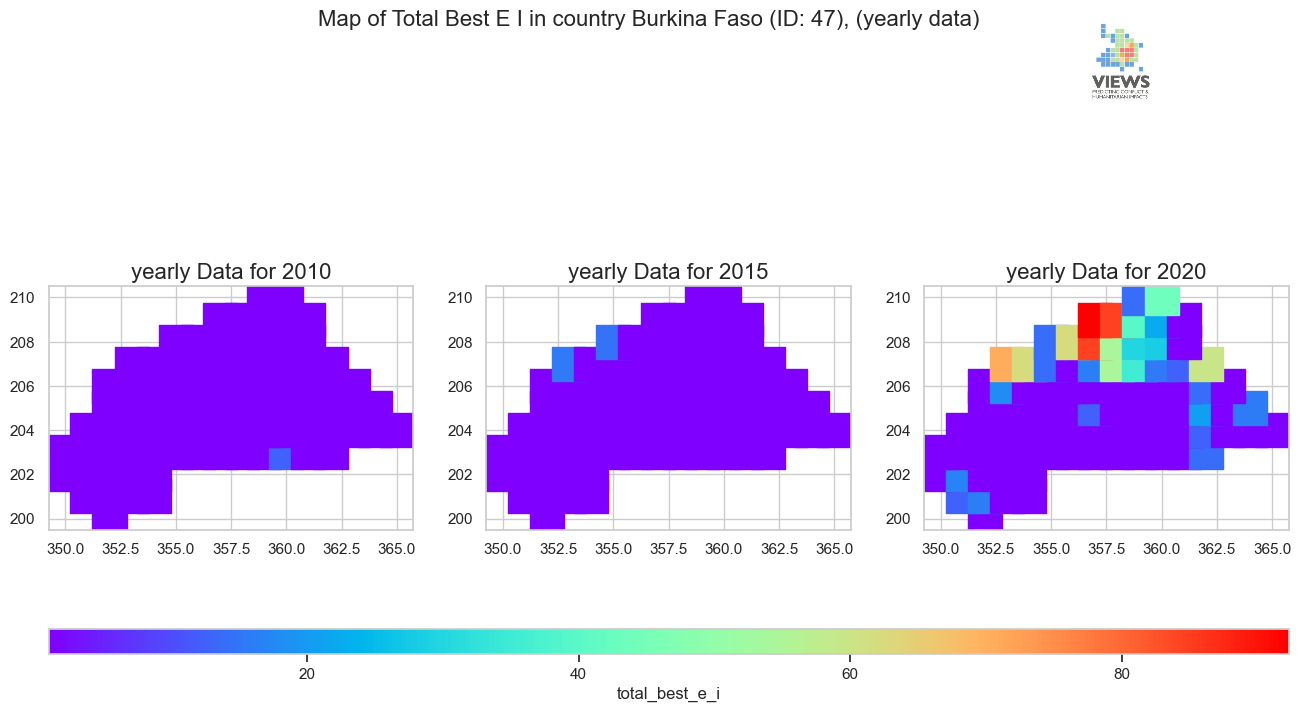

unique_values: [1.00000000e+00 1.62651622e+01 5.21809955e+01 2.35828221e+01
 3.76862745e+01 2.55698448e+01 5.12533333e+01 2.12767528e+01
 2.77211538e+01 3.25762712e+01 6.03769634e+01 4.86582278e+01
 2.93435115e+01 1.92842809e+01 3.52660550e+01 3.09168901e+01
 4.13333333e+01 4.43538462e+01 7.16273292e+01 1.08792453e+02
 3.62641509e+01 1.02053097e+02 5.41408451e+01 4.57619048e+01
 4.27111111e+02 3.43214286e+01 5.88367347e+01 1.86000000e+02
 4.28698885e+01 3.03473684e+02 1.42370370e+02 6.06947368e+02
 8.60597015e+01 1.57972603e+02 2.95692308e+02 1.45974684e+02
 1.83047619e+02 2.81268293e+02 2.56266667e+02 4.11857143e+02
 2.30640000e+02 2.74571429e+02 1.04836364e+03 3.39176471e+02
 1.80187500e+02]
vmin: 1.0, vmax: 1048.3636363636363
unique_values: [1.00000000e+00 1.62651622e+01 5.21809955e+01 2.35828221e+01
 3.76862745e+01 2.55698448e+01 5.12533333e+01 2.12767528e+01
 2.77211538e+01 3.25762712e+01 6.03769634e+01 4.86582278e+01
 2.93435115e+01 1.92842809e+01 3.52660550e+01 3.09168901e+01
 4

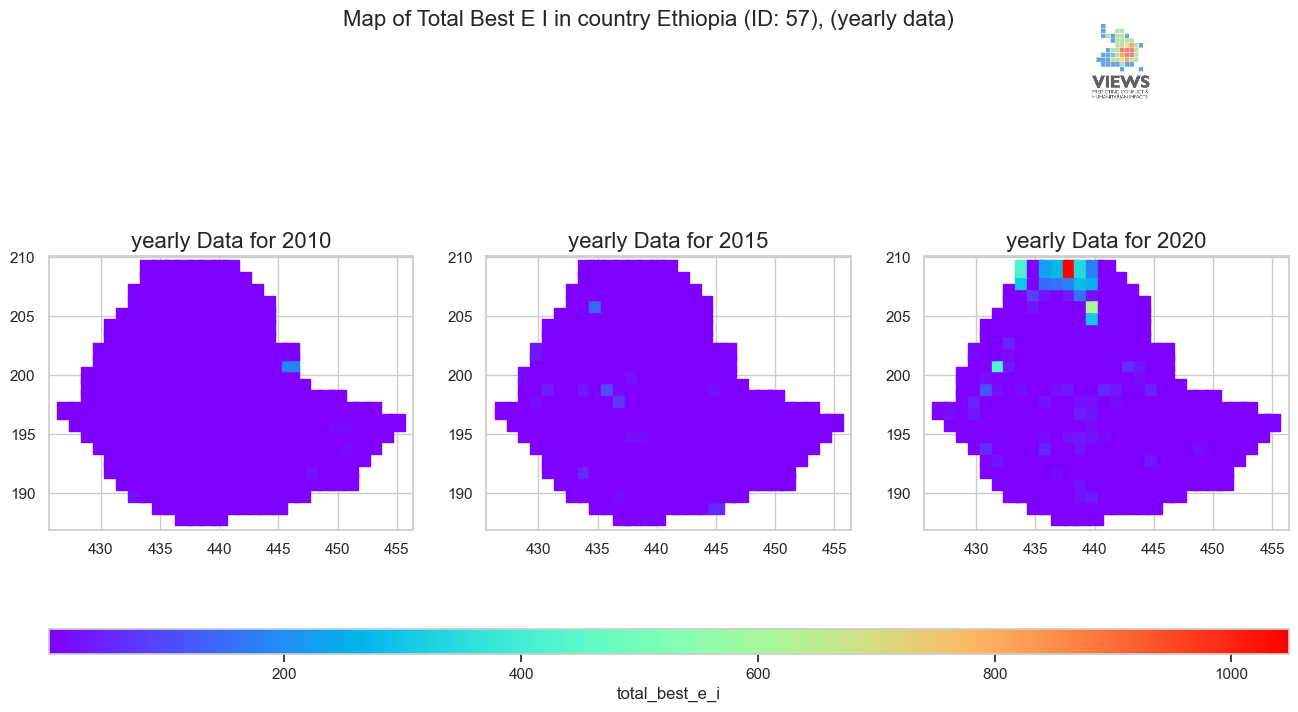

unique_values: [1.00000000e+00 1.57377049e+01 3.12558140e+01 3.48186528e+01
 9.60000000e+01 5.55371901e+01 6.92783505e+01 2.76543210e+01
 2.03636364e+02 2.16077170e+01 3.97633136e+01 2.24000000e+03
 1.89830508e+01 4.76595745e+01 5.60000000e+02 8.84210526e+01
 6.22222222e+01 2.46153846e+01 4.22641509e+01 8.50632911e+01
 7.90588235e+01]
vmin: 1.0, vmax: 2240.0
unique_values: [1.00000000e+00 1.57377049e+01 3.12558140e+01 3.48186528e+01
 9.60000000e+01 5.55371901e+01 6.92783505e+01 2.76543210e+01
 2.03636364e+02 2.16077170e+01 3.97633136e+01 2.24000000e+03
 1.89830508e+01 4.76595745e+01 5.60000000e+02 8.84210526e+01
 6.22222222e+01 2.46153846e+01 4.22641509e+01 8.50632911e+01
 7.90588235e+01]
vmin: 1.0, vmax: 2240.0
unique_values: [1.00000000e+00 1.57377049e+01 3.12558140e+01 3.48186528e+01
 9.60000000e+01 5.55371901e+01 6.92783505e+01 2.76543210e+01
 2.03636364e+02 2.16077170e+01 3.97633136e+01 2.24000000e+03
 1.89830508e+01 4.76595745e+01 5.60000000e+02 8.84210526e+01
 6.22222222e+01 2.4

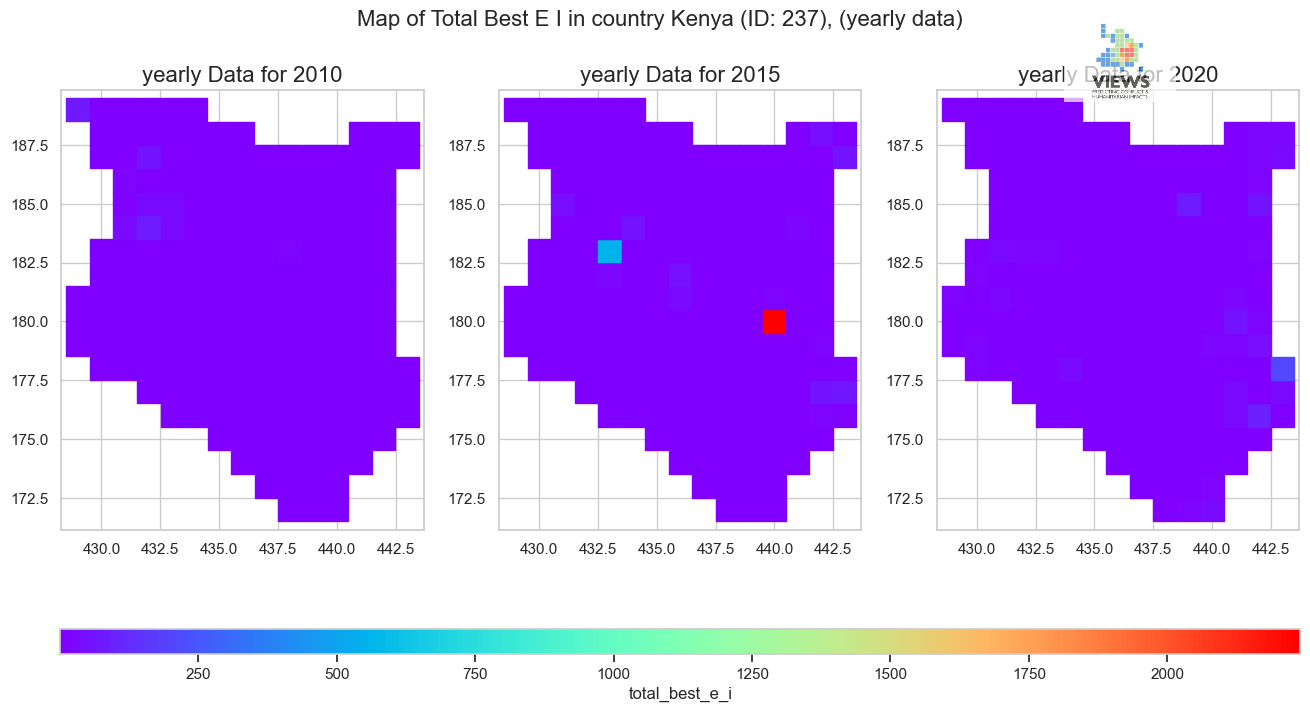

unique_values: [1.]
vmin: 1.0, vmax: 1.0
unique_values: [1.]
vmin: 1.0, vmax: 1.0
unique_values: [1.]
vmin: 1.0, vmax: 1.0


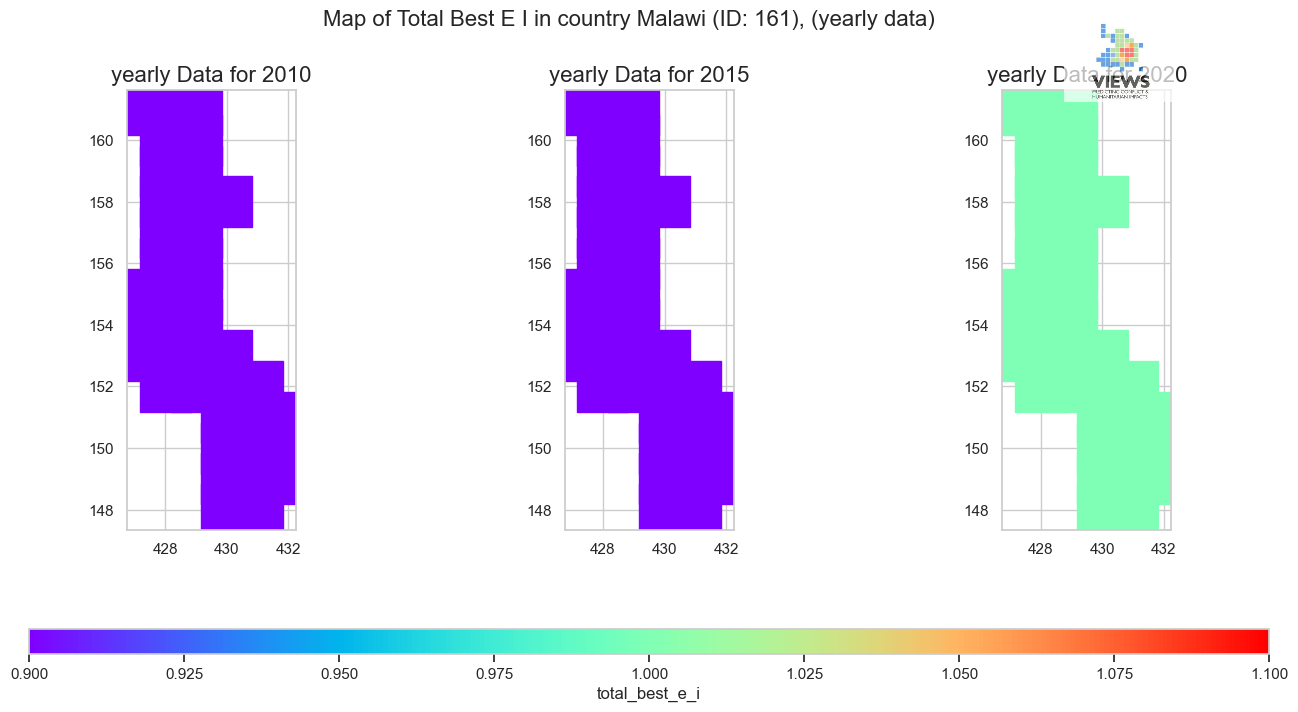

unique_values: [  1.          46.44859813  31.65605096  22.90322581  25.70689655
 338.86363636  88.22485207  93.1875     152.14285714  67.77272727
  34.04109589 134.32432432 286.73076923 363.65853659 173.37209302
 191.15384615  28.89534884 382.30769231  53.06049822 596.4
  64.54545455 784.73684211  92.03703704 248.5         50.2020202
  48.7254902   42.23796034 125.29411765  55.01845018 100.74324324
 229.38461538  36.36585366  82.83333333  78.47368421  38.72727273
  58.47058824  75.68527919 117.4015748  105.        ]
vmin: 1.0, vmax: 784.7368421052631
unique_values: [  1.          46.44859813  31.65605096  22.90322581  25.70689655
 338.86363636  88.22485207  93.1875     152.14285714  67.77272727
  34.04109589 134.32432432 286.73076923 363.65853659 173.37209302
 191.15384615  28.89534884 382.30769231  53.06049822 596.4
  64.54545455 784.73684211  92.03703704 248.5         50.2020202
  48.7254902   42.23796034 125.29411765  55.01845018 100.74324324
 229.38461538  36.36585366  82.83333333

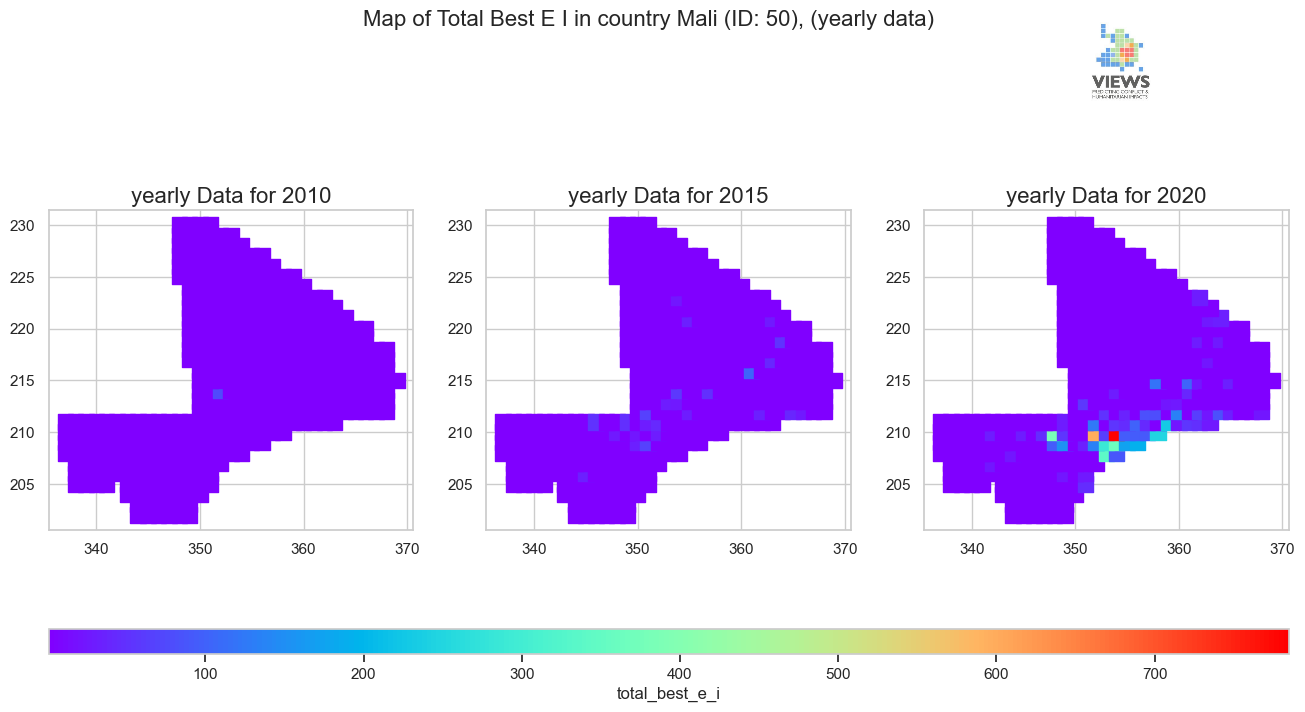

unique_values: [1.00e+00 1.61e+03 5.60e+02]
vmin: 1.0, vmax: 1610.0
unique_values: [1.00e+00 1.61e+03 5.60e+02]
vmin: 1.0, vmax: 1610.0
unique_values: [1.00e+00 1.61e+03 5.60e+02]
vmin: 1.0, vmax: 1610.0


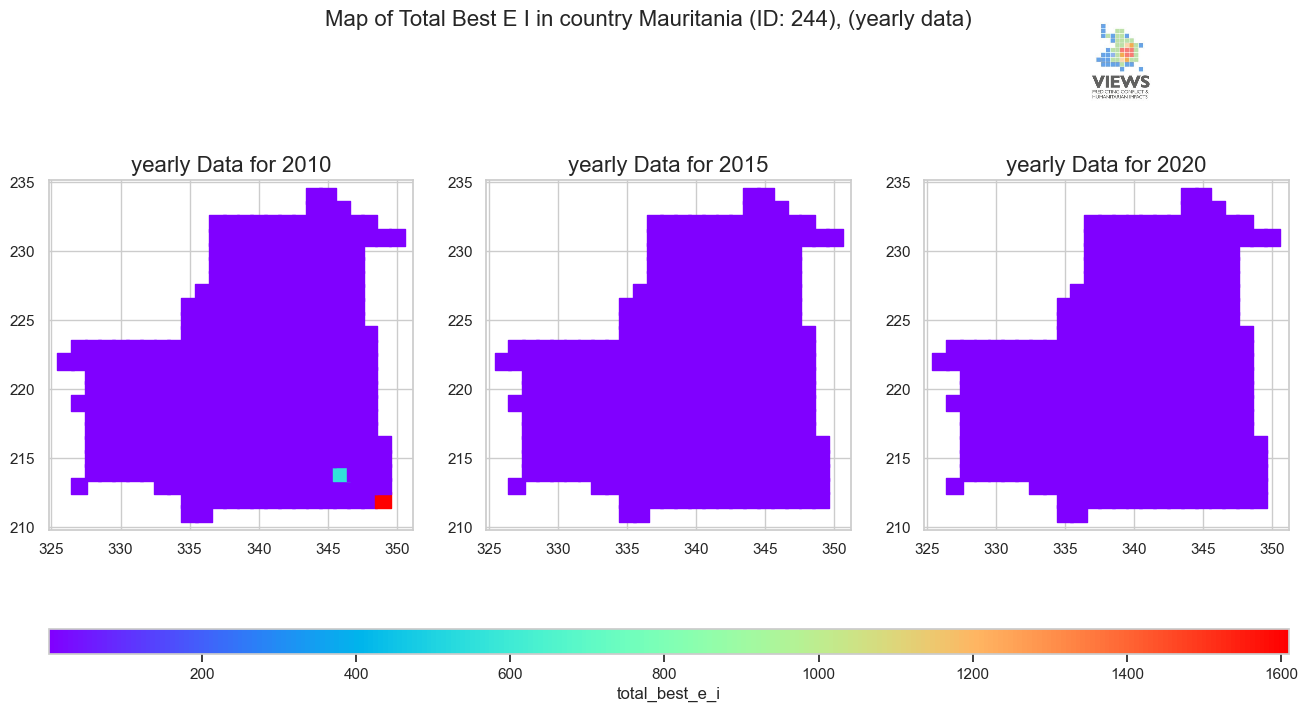

unique_values: [1.00000000e+00 7.55000000e+01 6.21764706e+02 1.92181818e+02
 5.97175141e+01 1.17444444e+03 3.40967742e+02 7.77205882e+01
 7.00000000e+01 1.76166667e+03 3.52333333e+03 5.23267327e+01
 3.20303030e+02 2.64250000e+03 9.43750000e+01 6.60625000e+02]
vmin: 1.0, vmax: 3523.3333333333335
unique_values: [1.00000000e+00 7.55000000e+01 6.21764706e+02 1.92181818e+02
 5.97175141e+01 1.17444444e+03 3.40967742e+02 7.77205882e+01
 7.00000000e+01 1.76166667e+03 3.52333333e+03 5.23267327e+01
 3.20303030e+02 2.64250000e+03 9.43750000e+01 6.60625000e+02]
vmin: 1.0, vmax: 3523.3333333333335
unique_values: [1.00000000e+00 7.55000000e+01 6.21764706e+02 1.92181818e+02
 5.97175141e+01 1.17444444e+03 3.40967742e+02 7.77205882e+01
 7.00000000e+01 1.76166667e+03 3.52333333e+03 5.23267327e+01
 3.20303030e+02 2.64250000e+03 9.43750000e+01 6.60625000e+02]
vmin: 1.0, vmax: 3523.3333333333335


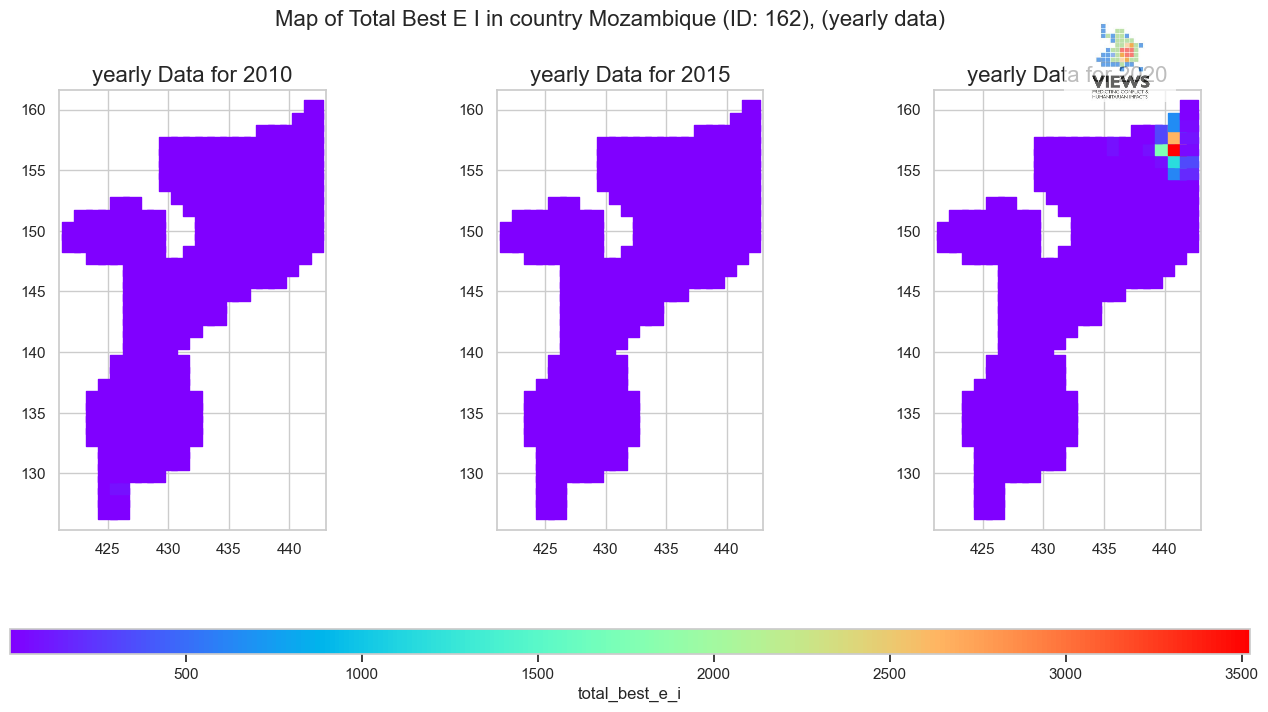

unique_values: [1.00000000e+00 6.86341463e+01 6.25333333e+01 9.19607843e+01
 1.13467742e+02 4.69000000e+03 2.81400000e+02 3.60769231e+02
 7.68852459e+01 4.85172414e+02 3.35000000e+02 1.40700000e+04
 1.08230769e+03 8.63190184e+01 1.63604651e+02 1.82727273e+02
 2.01000000e+02 3.19772727e+02 7.03500000e+02 9.97872340e+01
 4.53870968e+02 1.75875000e+03 5.02500000e+02]
vmin: 1.0, vmax: 14070.0
unique_values: [1.00000000e+00 6.86341463e+01 6.25333333e+01 9.19607843e+01
 1.13467742e+02 4.69000000e+03 2.81400000e+02 3.60769231e+02
 7.68852459e+01 4.85172414e+02 3.35000000e+02 1.40700000e+04
 1.08230769e+03 8.63190184e+01 1.63604651e+02 1.82727273e+02
 2.01000000e+02 3.19772727e+02 7.03500000e+02 9.97872340e+01
 4.53870968e+02 1.75875000e+03 5.02500000e+02]
vmin: 1.0, vmax: 14070.0
unique_values: [1.00000000e+00 6.86341463e+01 6.25333333e+01 9.19607843e+01
 1.13467742e+02 4.69000000e+03 2.81400000e+02 3.60769231e+02
 7.68852459e+01 4.85172414e+02 3.35000000e+02 1.40700000e+04
 1.08230769e+03 8.

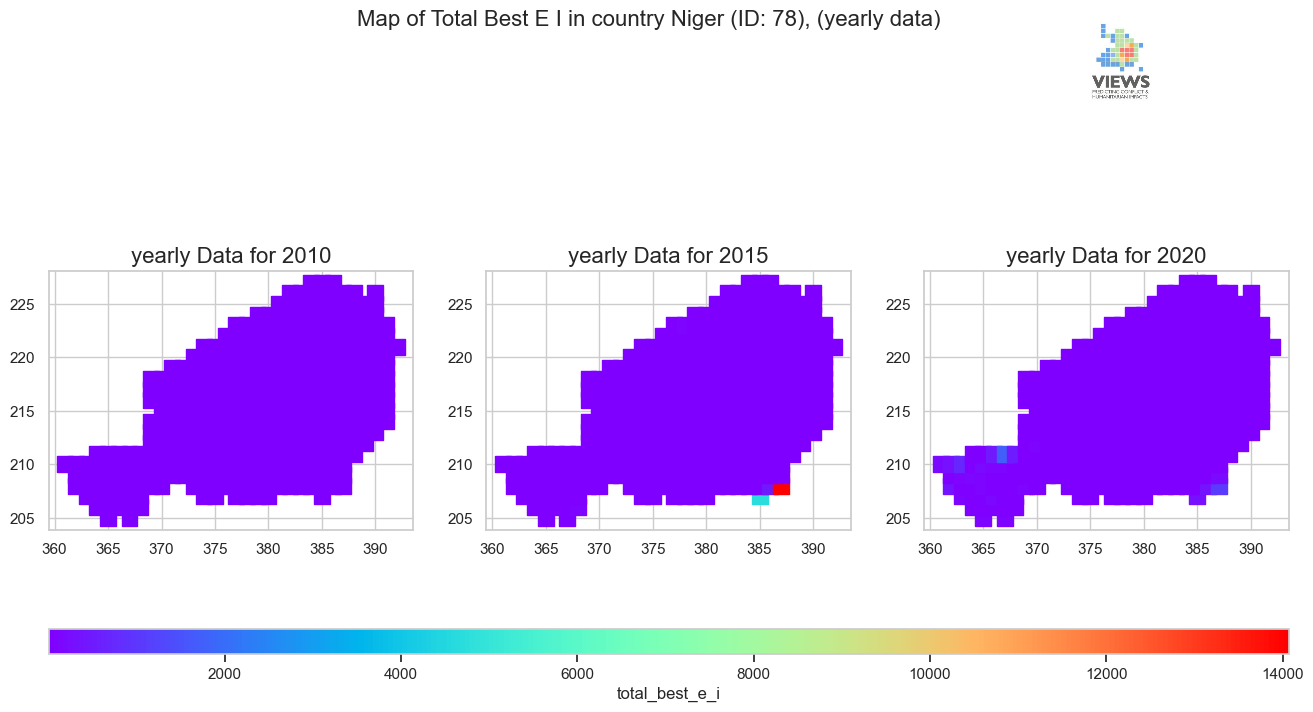

unique_values: [1.00000000e+00 1.21366906e+01 1.28386606e+01 4.48670213e+01
 3.99763033e+01 8.43500000e+01 2.58742331e+01 1.46951220e+01
 1.08419023e+01 1.86615044e+01 9.57434733e+00 2.03743961e+01
 9.92352941e+01 1.39883914e+01 1.68027888e+01 1.02740560e+01
 1.70748988e+01 4.19651741e+01 1.80620985e+01 1.12918340e+01
 4.71229050e+01 3.01250000e+02 1.33676704e+01 9.37222222e+01
 8.88830348e+00 4.84770115e+01 2.47360704e+01 8.97340426e+01
 2.81166667e+03 2.21973684e+02 3.37400000e+02 2.23148148e+01
 2.38951841e+01 1.56493506e+01 6.34210526e+01 3.78251121e+01
 2.30464481e+01 2.75653595e+01 1.91704545e+01 2.81166667e+01
 4.07487923e+01 3.00177936e+01 1.96162791e+01 1.73203285e+01
 3.19507576e+01 2.19090909e+01 3.14738806e+01 2.54066265e+01
 2.10875000e+01 9.06989247e+01 3.50000000e+01 3.66739130e+01
 7.53125000e+01 5.40705128e+01 4.96176471e+01 2.67777778e+01
 2.15728900e+01 8.26960784e+01]
vmin: 1.0, vmax: 2811.666666666667
unique_values: [1.00000000e+00 1.21366906e+01 1.28386606e+01 4.4

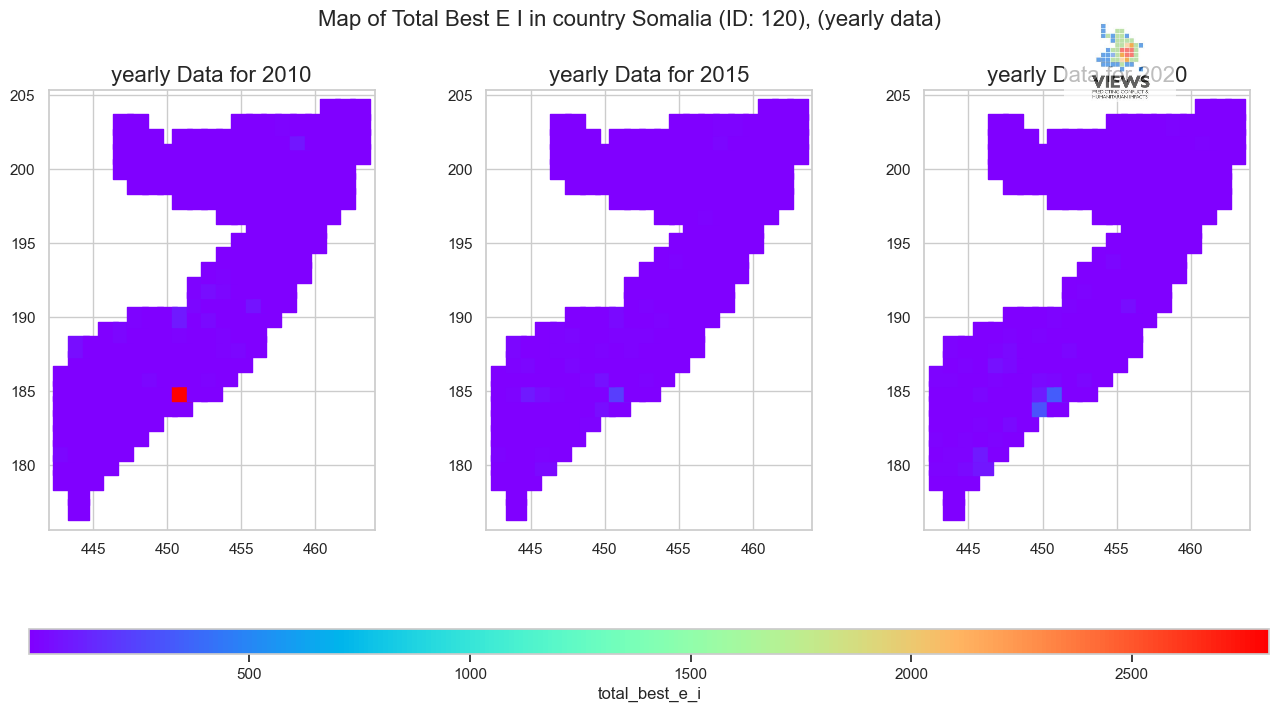

unique_values: [  1.         520.47058824 442.4        340.30769231 804.36363636]
vmin: 1.0, vmax: 804.3636363636364
unique_values: [  1.         520.47058824 442.4        340.30769231 804.36363636]
vmin: 1.0, vmax: 804.3636363636364
unique_values: [  1.         520.47058824 442.4        340.30769231 804.36363636]
vmin: 1.0, vmax: 804.3636363636364


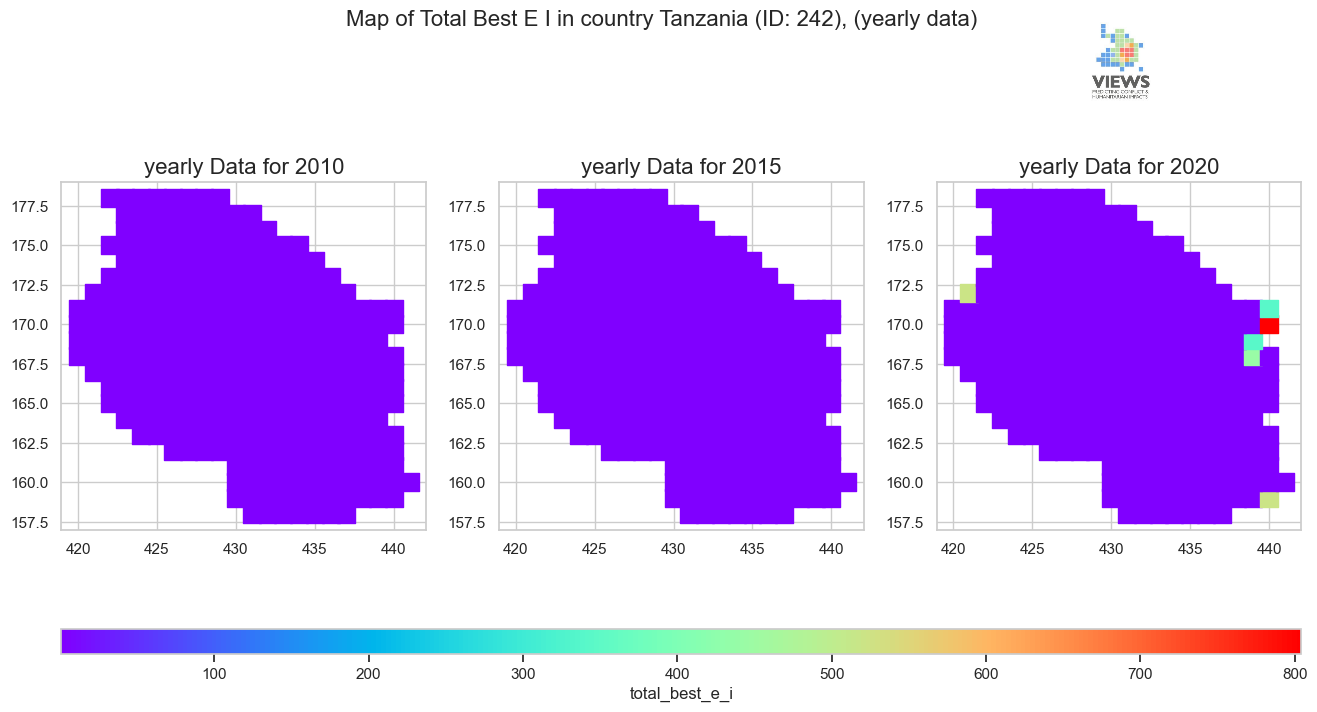

unique_values: [ 1.         15.6424581  21.875      10.72796935 12.12121212  9.36454849
 45.16129032  8.33333333 11.57024793]
vmin: 1.0, vmax: 45.16129032258065
unique_values: [ 1.         15.6424581  21.875      10.72796935 12.12121212  9.36454849
 45.16129032  8.33333333 11.57024793]
vmin: 1.0, vmax: 45.16129032258065
unique_values: [ 1.         15.6424581  21.875      10.72796935 12.12121212  9.36454849
 45.16129032  8.33333333 11.57024793]
vmin: 1.0, vmax: 45.16129032258065


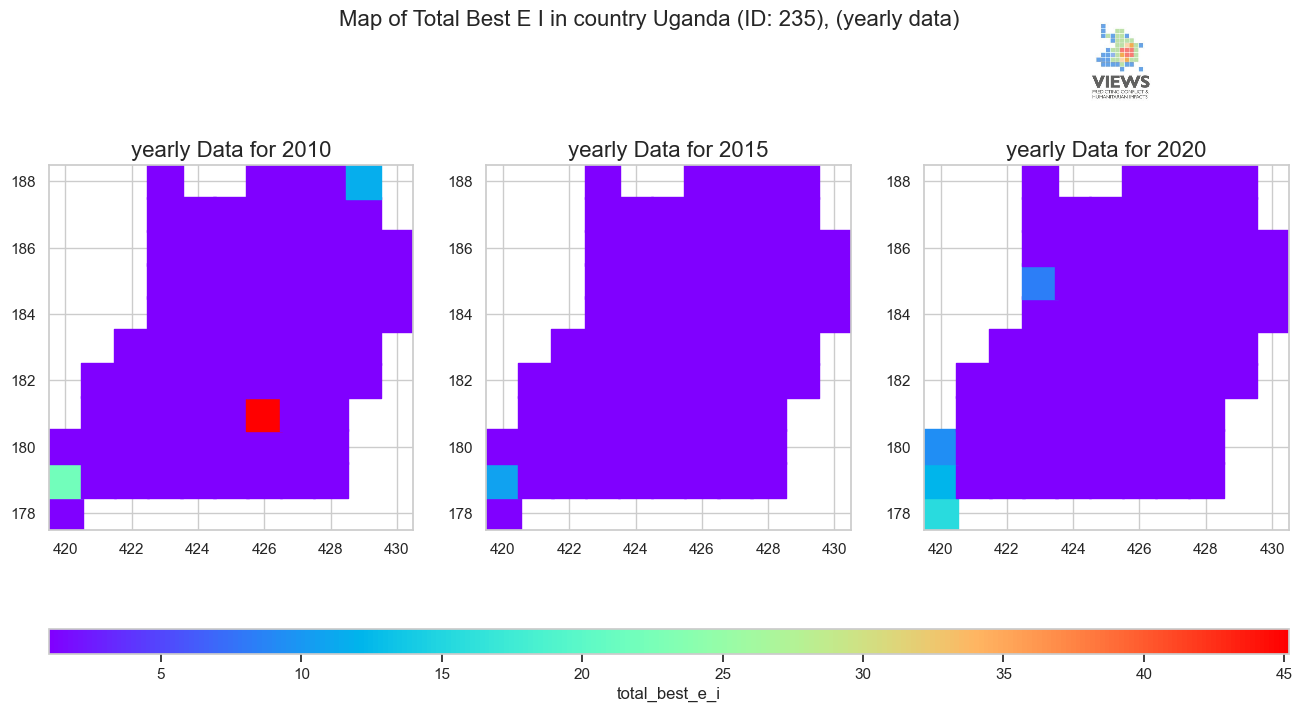

unique_values: [  1.           8.31128405  16.75294118  58.52054795  11.42245989
 854.4         18.02531646   7.80987203 115.45945946   7.14381271
  41.07692308  14.38383838  27.92156863  15.82222222 118.66666667
   9.73120729  18.57391304  39.55555556 101.71428571  11.86666667
  27.38461538  35.01639344  19.96261682 712.         122.05714286
  99.34883721  51.46987952  79.11111111  15.04225352  13.6485623
   8.77207392  31.18248175  38.83636364  31.41176471  63.76119403
  30.29787234  12.67655786  27.56129032  13.22600619  10.54814815
   9.30718954  32.12030075  38.48648649  12.34682081  46.94505495
  17.22580645  26.7         25.27810651 328.61538462  70.03278689
  11.18324607  32.61068702  10.84263959 427.2         22.48421053
  97.09090909 534.          20.63768116  21.57575758 284.8
 356.          37.14782609  14.00655738  35.89915966 178.
  35.6         15.42238267 203.42857143  19.33031674  49.6744186
  23.3442623   85.44        45.93548387  94.93333333  21.25373134
  27.0379746

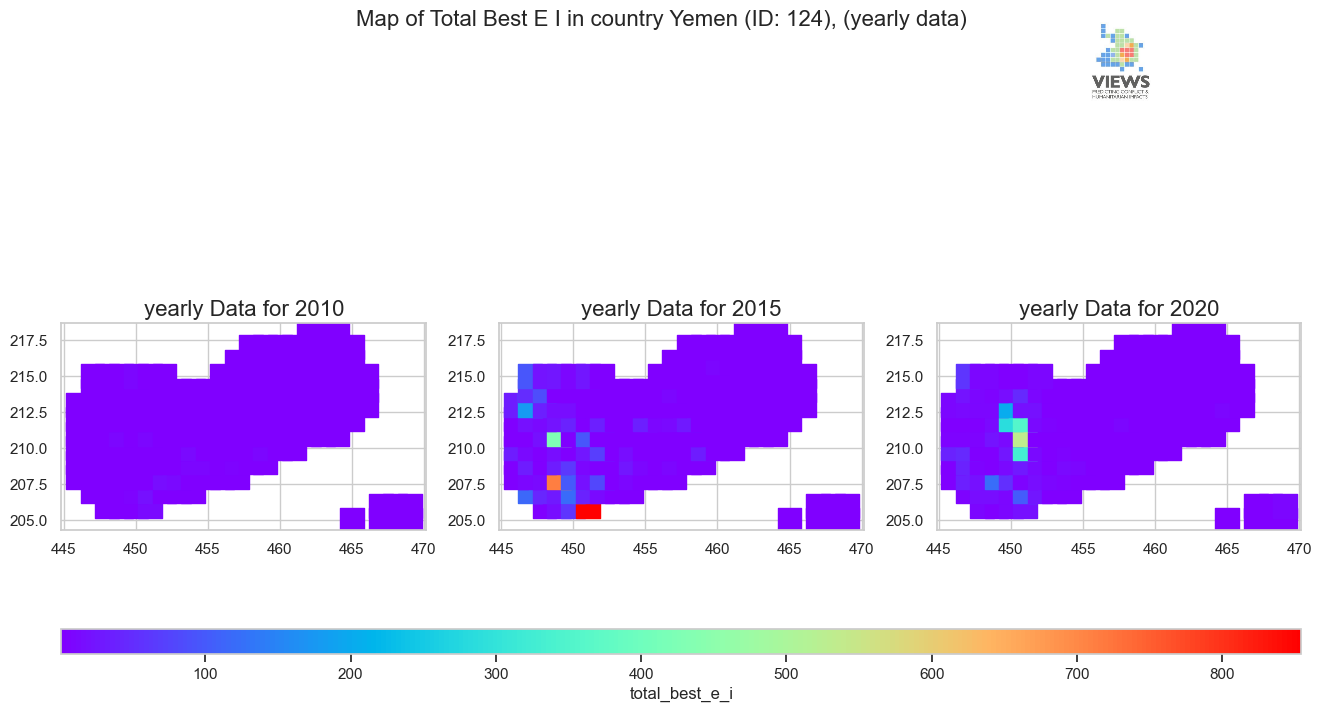

unique_values: [1.]
vmin: 1.0, vmax: 1.0
unique_values: [1.]
vmin: 1.0, vmax: 1.0
unique_values: [1.]
vmin: 1.0, vmax: 1.0


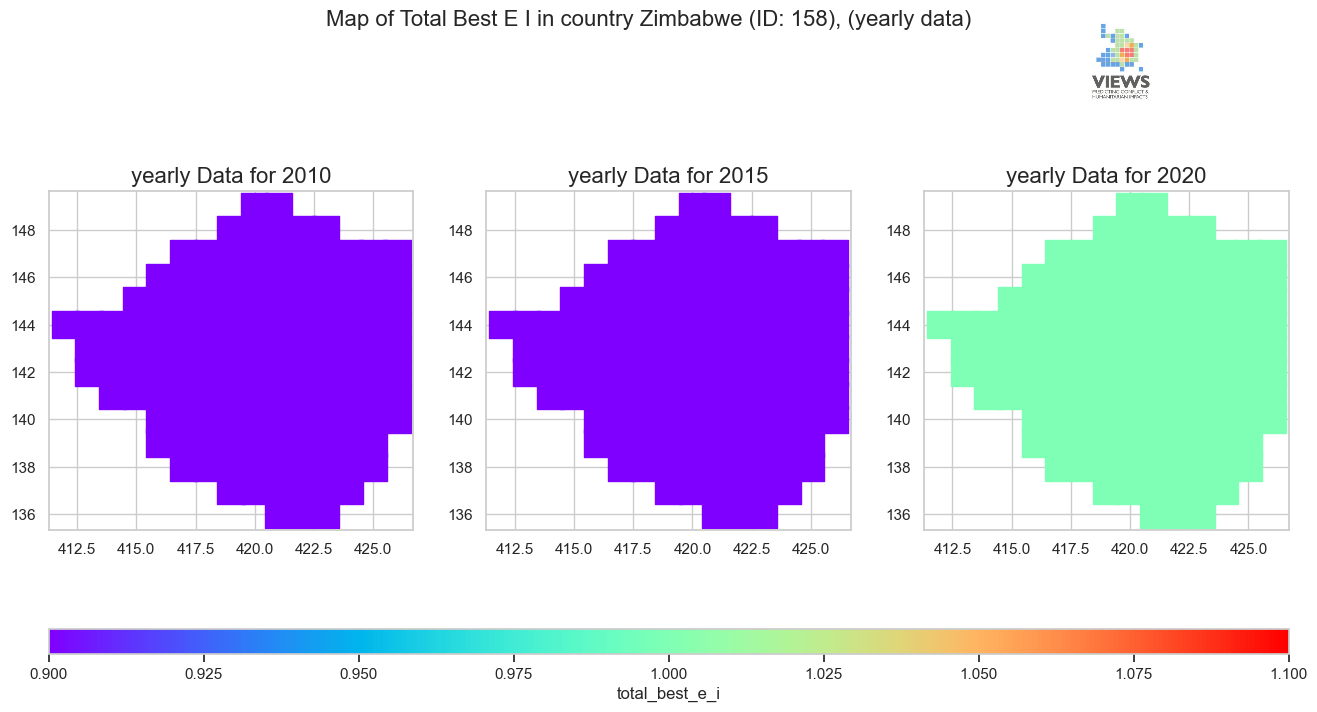

In [21]:
# return period maps for each country, small e
# total_best_e_i

for idx, country_id in enumerate(country_ids):
    save_path_maps = os.path.join(base_save_path, f"{country_list[idx].replace(' ', '_').replace('/', '_')}.png")
    plot_country_period_map(df_yearly, country_id, "total_best_e_i", [2010, 2015, 2020], figsize=(16, 8), save_plot=True)

# need to fix save function

unique_values: [1.         1.00076723 1.00404643 1.0051662  1.00171423 1.01368891
 1.00336801 1.00679736 1.0028898  1.40876482 1.32241017 1.24830144
 1.09015852 1.29877597 1.00226087 1.55118835 1.05440851 1.04515754
 1.63269024 1.12071441 1.02033861 1.15235546]
vmin: 1.0, vmax: 1.6326902407209953
unique_values: [1.         1.00076723 1.00404643 1.0051662  1.00171423 1.01368891
 1.00336801 1.00679736 1.0028898  1.40876482 1.32241017 1.24830144
 1.09015852 1.29877597 1.00226087 1.55118835 1.05440851 1.04515754
 1.63269024 1.12071441 1.02033861 1.15235546]
vmin: 1.0, vmax: 1.6326902407209953
unique_values: [1.         1.00076723 1.00404643 1.0051662  1.00171423 1.01368891
 1.00336801 1.00679736 1.0028898  1.40876482 1.32241017 1.24830144
 1.09015852 1.29877597 1.00226087 1.55118835 1.05440851 1.04515754
 1.63269024 1.12071441 1.02033861 1.15235546]
vmin: 1.0, vmax: 1.6326902407209953


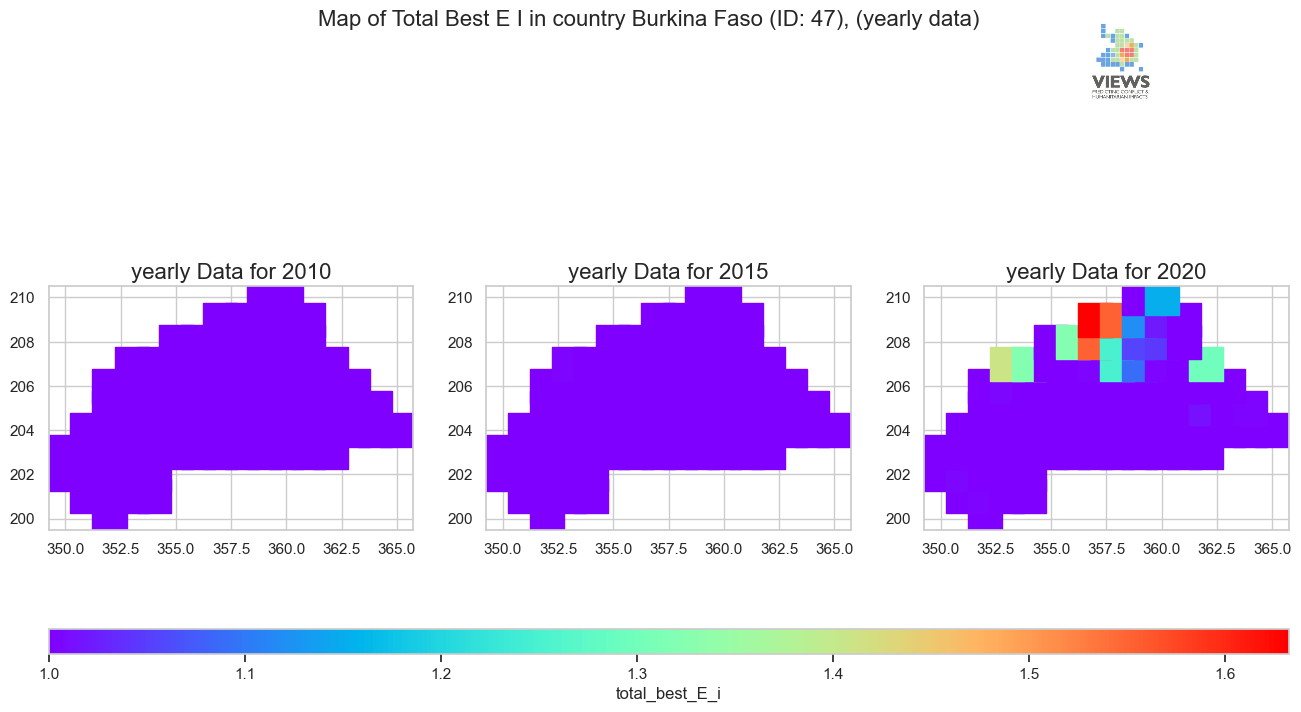

unique_values: [1.         1.         1.00074847 1.0000001  1.00004521 1.00000036
 1.00065613 1.00000002 1.00000116 1.00000918 1.00200747 1.00044192
 1.0000025  1.         1.00002253 1.00000488 1.00011049 1.00020698
 1.00538156 1.03329273 1.00003037 1.02632724 1.00097386 1.00026951
 1.71856477 1.00001671 1.00170324 1.15554439 1.00015377 1.4142819
 1.07833974 2.18103416 1.01310355 1.10399778 1.39586483 1.08404011
 1.14983664 1.36206309 1.30467941 1.680151   1.24783258 1.34653228
 3.34635957 1.5001636  1.14436403]
vmin: 1.0, vmax: 3.3463595670356385
unique_values: [1.         1.         1.00074847 1.0000001  1.00004521 1.00000036
 1.00065613 1.00000002 1.00000116 1.00000918 1.00200747 1.00044192
 1.0000025  1.         1.00002253 1.00000488 1.00011049 1.00020698
 1.00538156 1.03329273 1.00003037 1.02632724 1.00097386 1.00026951
 1.71856477 1.00001671 1.00170324 1.15554439 1.00015377 1.4142819
 1.07833974 2.18103416 1.01310355 1.10399778 1.39586483 1.08404011
 1.14983664 1.36206309 1.30467

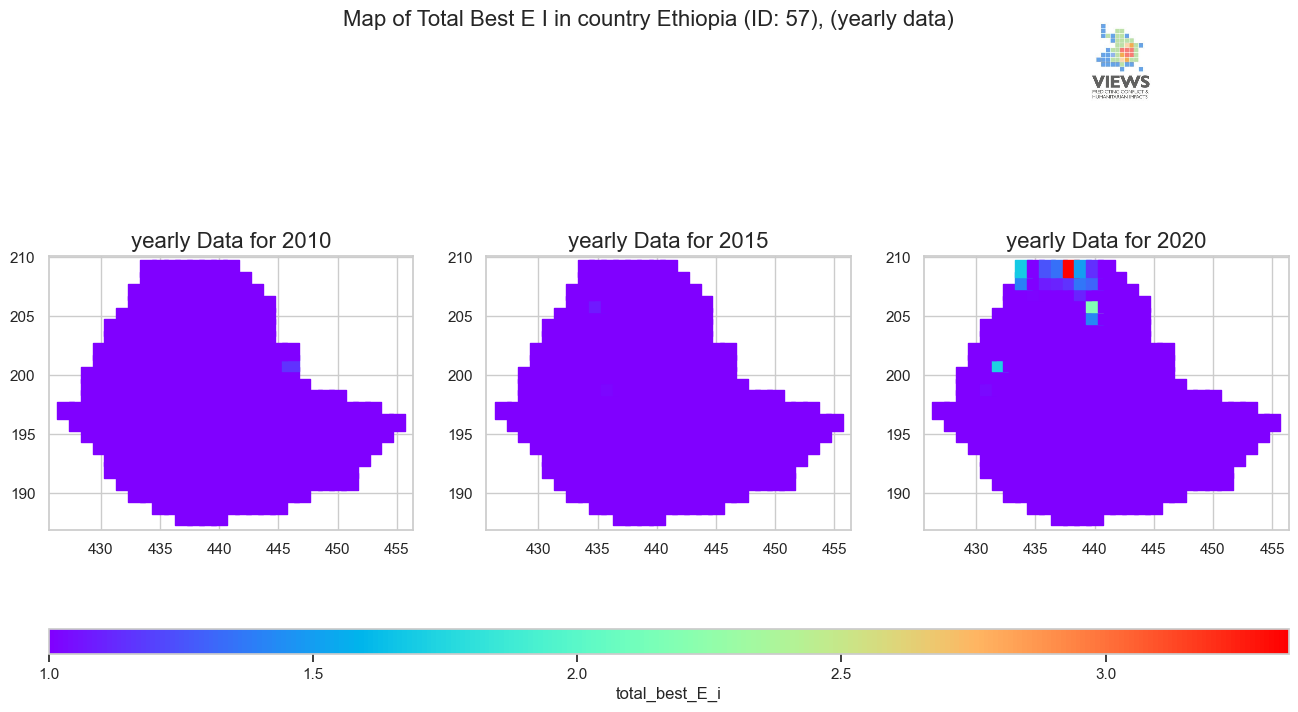

unique_values: [ 1.          1.00000336  1.00194727  1.00373018  1.15463187  1.03150441
  1.06532744  1.00084968  1.63561638  1.00011191  1.00757594 12.17120588
  1.00003073  1.01734873  3.44260272  1.12690365  1.04664501  1.00034828
  1.01017995  1.11514915  1.09505945]
vmin: 1.0, vmax: 12.171205883129787
unique_values: [ 1.          1.00000336  1.00194727  1.00373018  1.15463187  1.03150441
  1.06532744  1.00084968  1.63561638  1.00011191  1.00757594 12.17120588
  1.00003073  1.01734873  3.44260272  1.12690365  1.04664501  1.00034828
  1.01017995  1.11514915  1.09505945]
vmin: 1.0, vmax: 12.171205883129787
unique_values: [ 1.          1.00000336  1.00194727  1.00373018  1.15463187  1.03150441
  1.06532744  1.00084968  1.63561638  1.00011191  1.00757594 12.17120588
  1.00003073  1.01734873  3.44260272  1.12690365  1.04664501  1.00034828
  1.01017995  1.11514915  1.09505945]
vmin: 1.0, vmax: 12.171205883129787


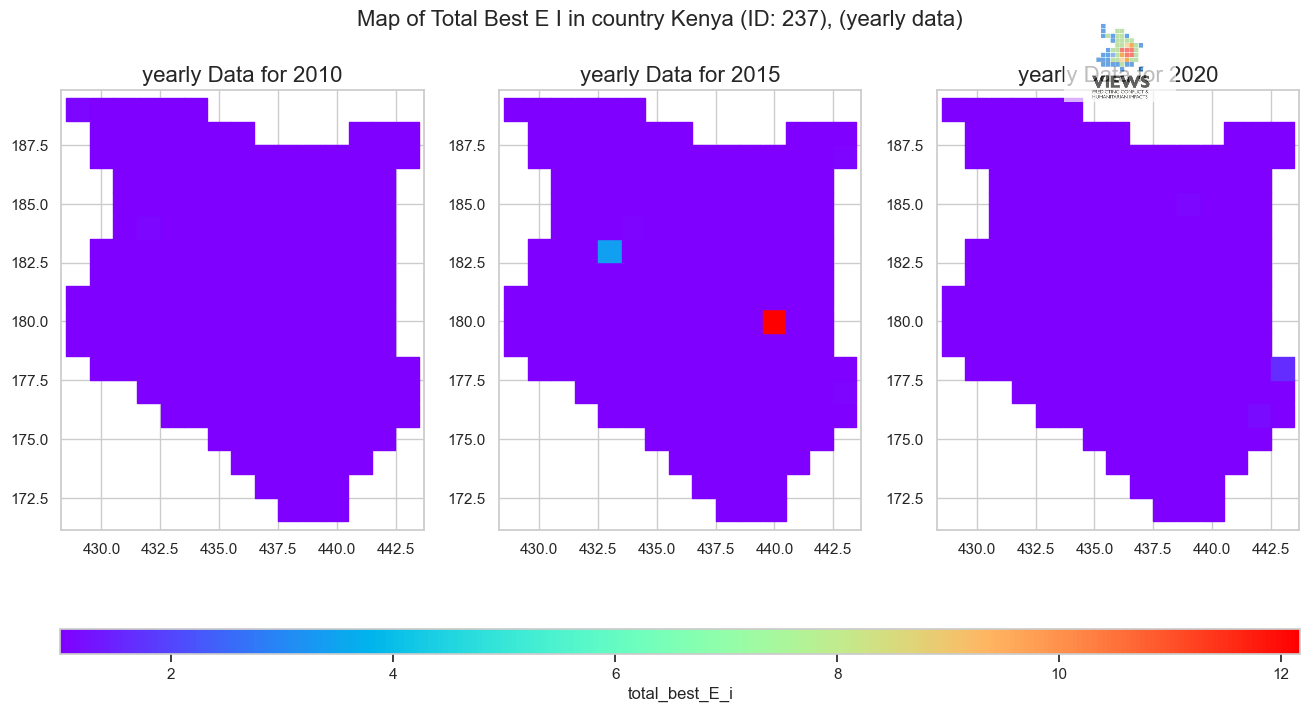

unique_values: [1.]
vmin: 1.0, vmax: 1.0
unique_values: [1.]
vmin: 1.0, vmax: 1.0
unique_values: [1.]
vmin: 1.0, vmax: 1.0


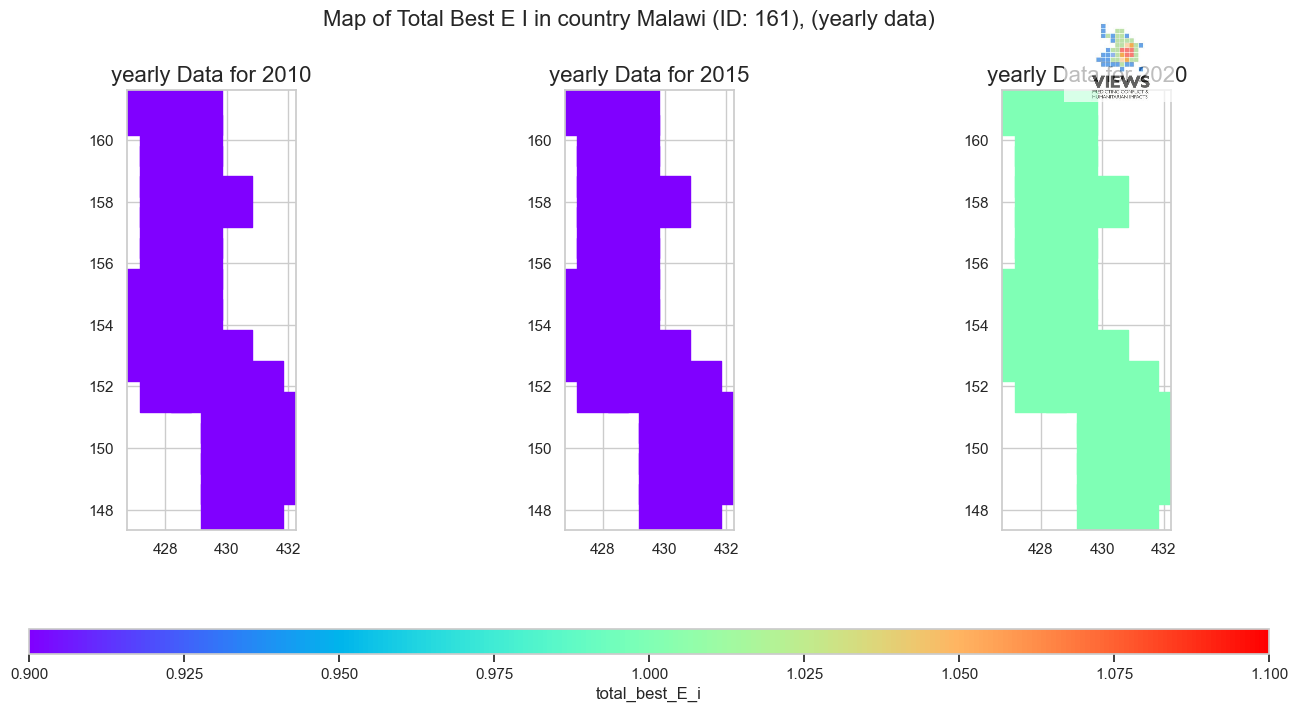

unique_values: [1.         1.00009407 1.00000115 1.00000001 1.00000005 1.39652596
 1.00784143 1.01019364 1.0641135  1.00178066 1.00000305 1.04324126
 1.29157851 1.44806695 1.09298226 1.11988866 1.0000003  1.48736679
 1.00030206 1.9578984  1.00129355 2.38597719 1.00961597 1.21872527
 1.00018949 1.00014574 1.00003691 1.03404182 1.00040417 1.01447508
 1.1841123  1.00000694 1.00569324 1.00425692 1.00001445 1.00064382
 1.00347341 1.02684647 1.01725807]
vmin: 1.0, vmax: 2.3859771856402388
unique_values: [1.         1.00009407 1.00000115 1.00000001 1.00000005 1.39652596
 1.00784143 1.01019364 1.0641135  1.00178066 1.00000305 1.04324126
 1.29157851 1.44806695 1.09298226 1.11988866 1.0000003  1.48736679
 1.00030206 1.9578984  1.00129355 2.38597719 1.00961597 1.21872527
 1.00018949 1.00014574 1.00003691 1.03404182 1.00040417 1.01447508
 1.1841123  1.00000694 1.00569324 1.00425692 1.00001445 1.00064382
 1.00347341 1.02684647 1.01725807]
vmin: 1.0, vmax: 2.3859771856402388
unique_values: [1.      

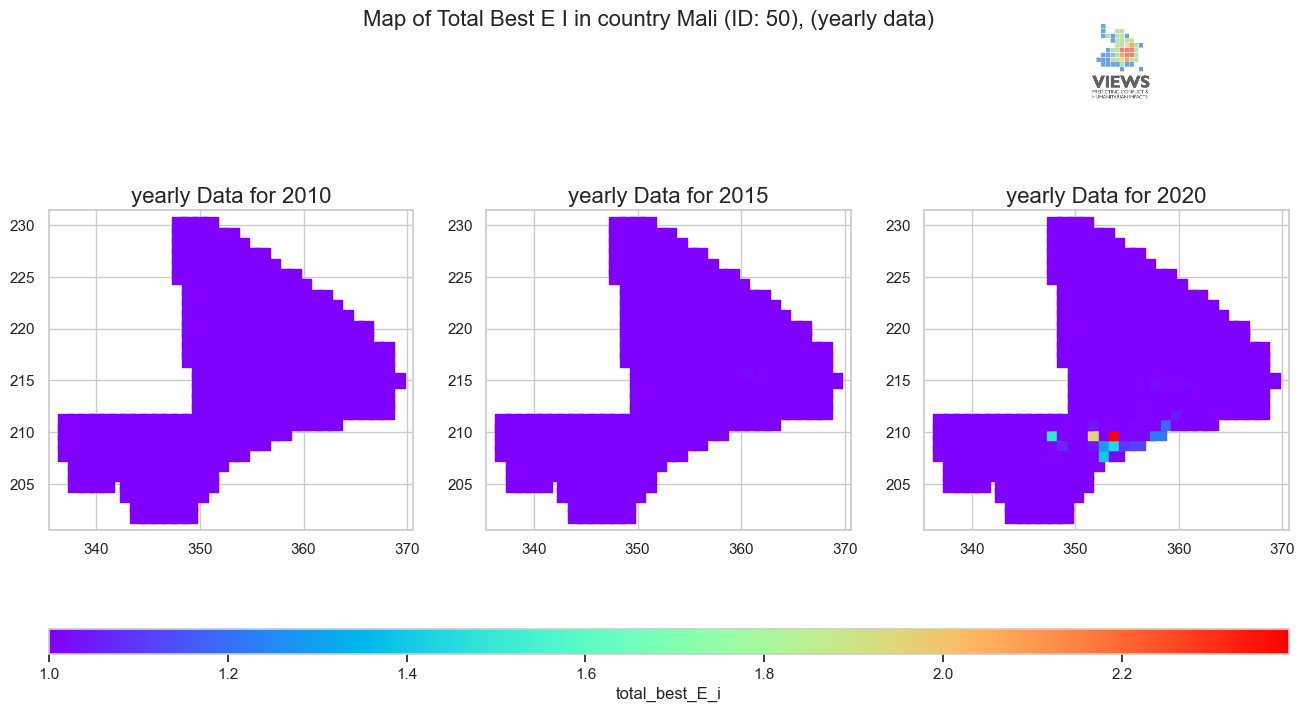

unique_values: [1.         4.89267812 2.07479972]
vmin: 1.0, vmax: 4.892678120051033
unique_values: [1.         4.89267812 2.07479972]
vmin: 1.0, vmax: 4.892678120051033
unique_values: [1.         4.89267812 2.07479972]
vmin: 1.0, vmax: 4.892678120051033


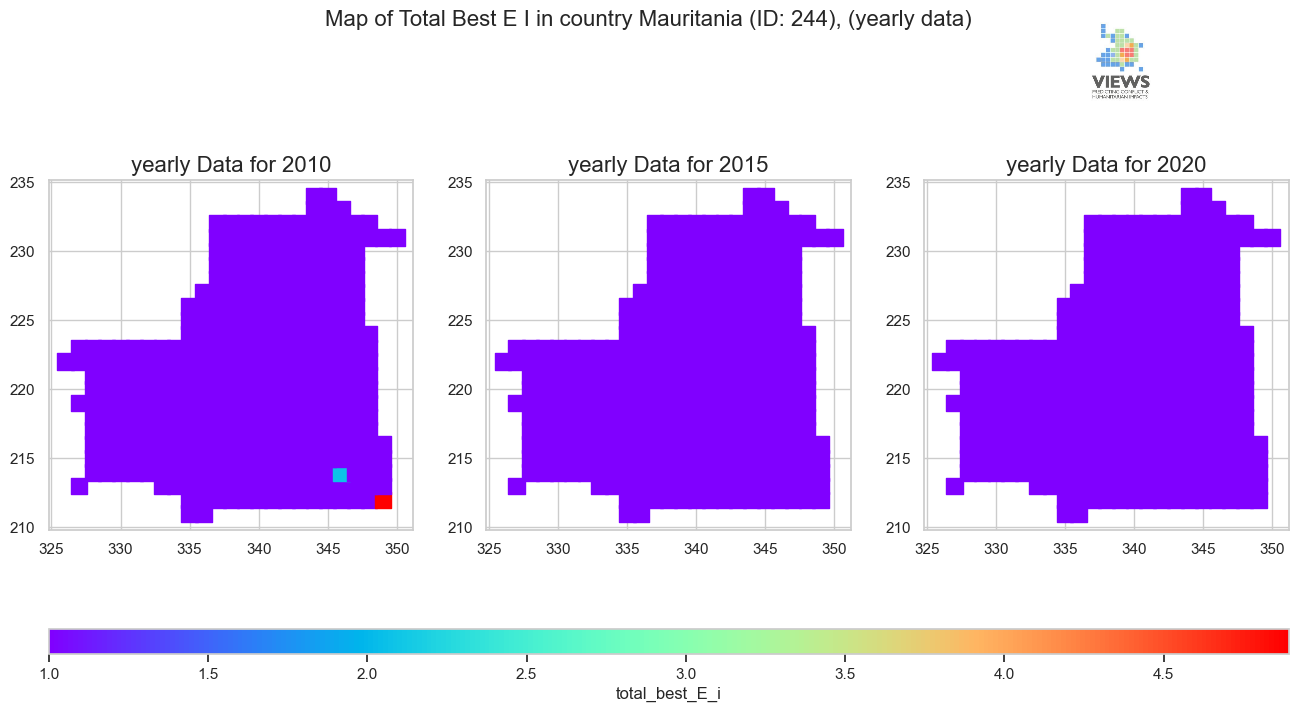

unique_values: [ 1.          1.01815639  2.59751759  1.26087126  1.00613437  4.40864712
  1.70034229  1.02043096  1.01313667  6.34596032 12.17215396  1.00295476
  1.63649859  9.2578678   1.04174493  2.72383572]
vmin: 1.0, vmax: 12.172153955331485
unique_values: [ 1.          1.01815639  2.59751759  1.26087126  1.00613437  4.40864712
  1.70034229  1.02043096  1.01313667  6.34596032 12.17215396  1.00295476
  1.63649859  9.2578678   1.04174493  2.72383572]
vmin: 1.0, vmax: 12.172153955331485
unique_values: [ 1.          1.01815639  2.59751759  1.26087126  1.00613437  4.40864712
  1.70034229  1.02043096  1.01313667  6.34596032 12.17215396  1.00295476
  1.63649859  9.2578678   1.04174493  2.72383572]
vmin: 1.0, vmax: 12.172153955331485


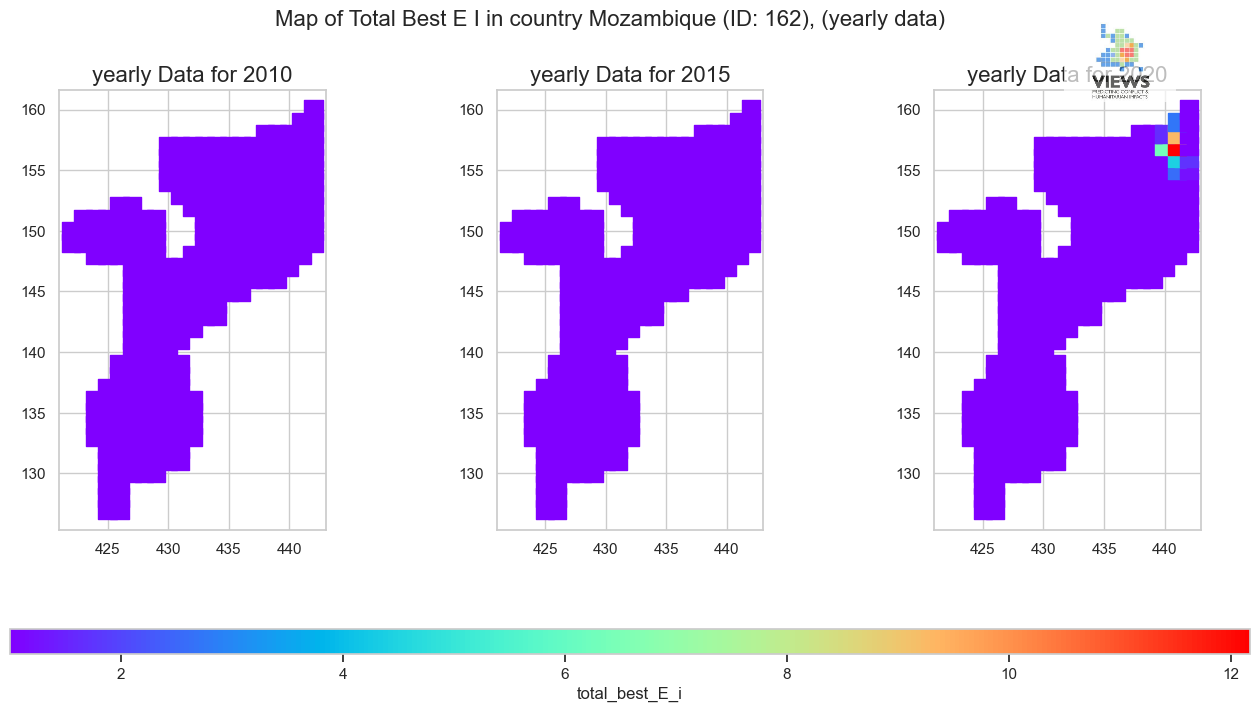

unique_values: [ 1.          1.00274633  1.00153536  1.01248835  1.02931465 12.17256559
  1.31413307  1.4873035   1.00520738  1.77399148  1.42990771 35.50113721
  3.22195937  1.00932508  1.09293893  1.12376686  1.15561702  1.3964644
  2.29615115  1.01775128  1.70072851  4.89279256  1.81478638]
vmin: 1.0, vmax: 35.50113720877186
unique_values: [ 1.          1.00274633  1.00153536  1.01248835  1.02931465 12.17256559
  1.31413307  1.4873035   1.00520738  1.77399148  1.42990771 35.50113721
  3.22195937  1.00932508  1.09293893  1.12376686  1.15561702  1.3964644
  2.29615115  1.01775128  1.70072851  4.89279256  1.81478638]
vmin: 1.0, vmax: 35.50113720877186
unique_values: [ 1.          1.00274633  1.00153536  1.01248835  1.02931465 12.17256559
  1.31413307  1.4873035   1.00520738  1.77399148  1.42990771 35.50113721
  3.22195937  1.00932508  1.09293893  1.12376686  1.15561702  1.3964644
  2.29615115  1.01775128  1.70072851  4.89279256  1.81478638]
vmin: 1.0, vmax: 35.50113720877186


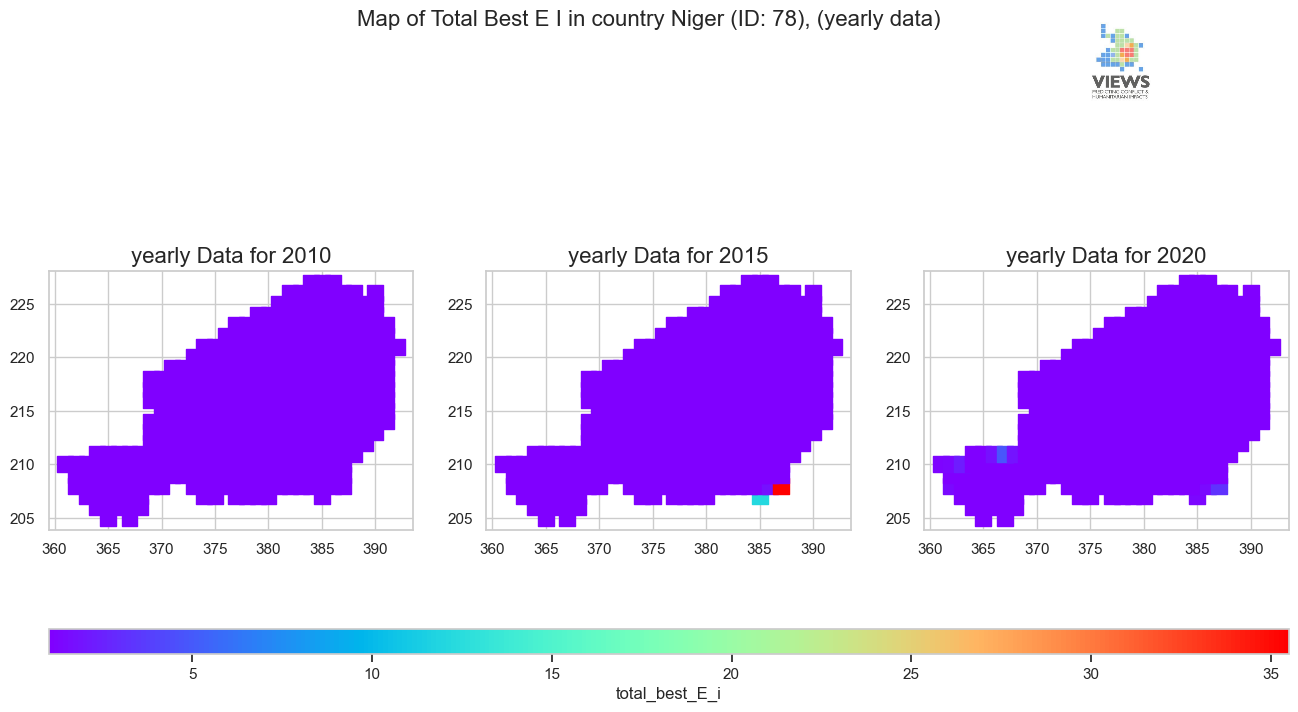

unique_values: [ 1.          1.          1.          1.00439271  1.0022361   1.05983903
  1.00007493  1.00000004  1.          1.00000172  1.          1.0000054
  1.09539014  1.00000002  1.00000038  1.          1.00000048  1.00299925
  1.00000109  1.          1.00572091  1.81399781  1.00000001  1.08152256
  1.          1.00662558  1.00004796  1.07198641 12.17173511  1.5079164
  1.95703418  1.0000159   1.00003354  1.00000012  1.0221851   1.0015717
  1.00002275  1.00013567  1.00000247  1.00016208  1.00251482  1.00028442
  1.00000334  1.0000006   1.00046992  1.00001289  1.00041759  1.00006269
  1.00000822  1.07425324  1.0009256   1.00127935  1.04155576  1.01124659
  1.00745156  1.00010388  1.00001077  1.05628712]
vmin: 1.0, vmax: 12.171735107579671
unique_values: [ 1.          1.          1.          1.00439271  1.0022361   1.05983903
  1.00007493  1.00000004  1.          1.00000172  1.          1.0000054
  1.09539014  1.00000002  1.00000038  1.          1.00000048  1.00299925
  1.00000109

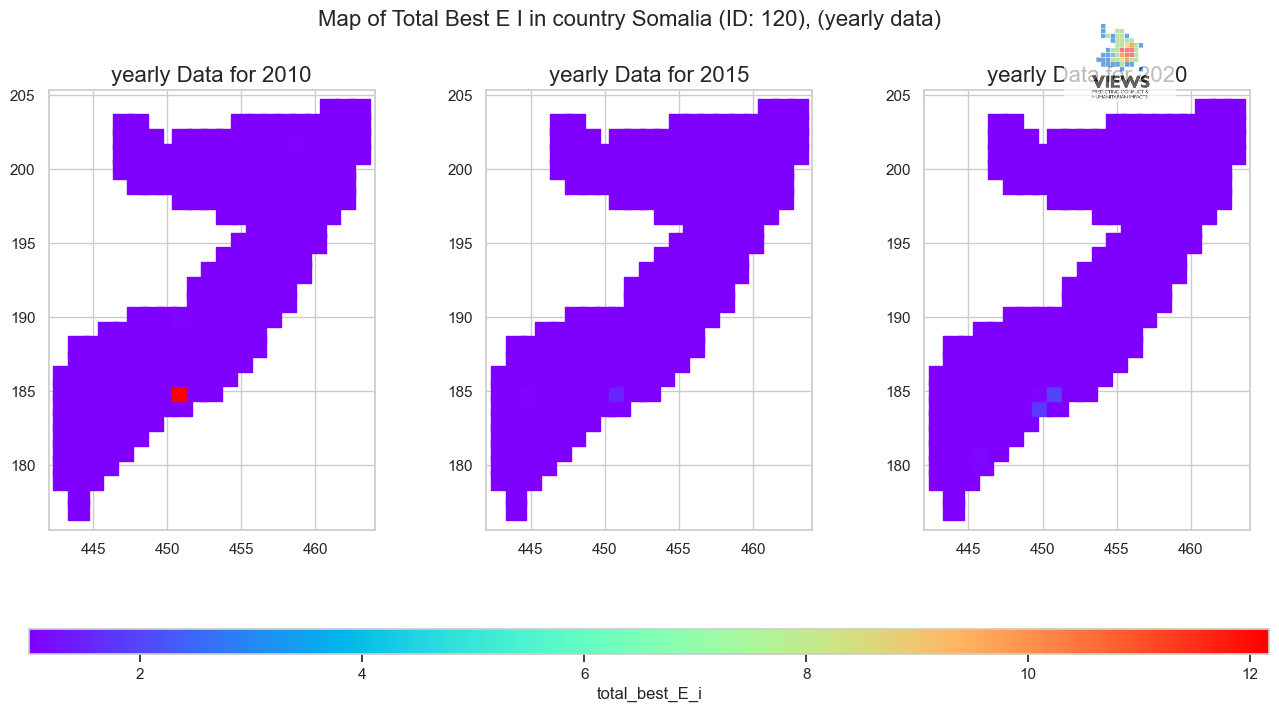

unique_values: [1.         2.19581092 1.95750654 1.65174046 3.07654634]
vmin: 1.0, vmax: 3.076546341784757
unique_values: [1.         2.19581092 1.95750654 1.65174046 3.07654634]
vmin: 1.0, vmax: 3.076546341784757
unique_values: [1.         2.19581092 1.95750654 1.65174046 3.07654634]
vmin: 1.0, vmax: 3.076546341784757


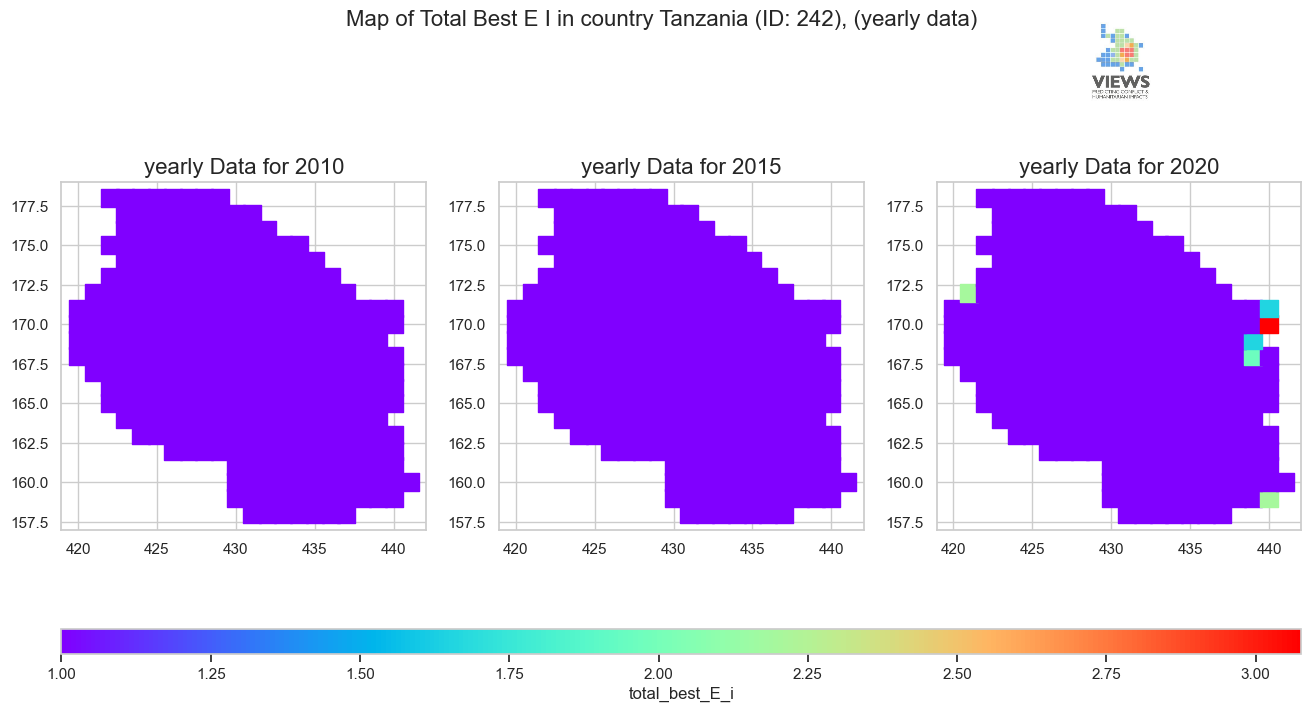

unique_values: [1.         1.00509243 1.02424817 1.00039861 1.00102077 1.00011926
 1.20010185 1.00003619 1.00072396]
vmin: 1.0, vmax: 1.200101848813231
unique_values: [1.         1.00509243 1.02424817 1.00039861 1.00102077 1.00011926
 1.20010185 1.00003619 1.00072396]
vmin: 1.0, vmax: 1.200101848813231
unique_values: [1.         1.00509243 1.02424817 1.00039861 1.00102077 1.00011926
 1.20010185 1.00003619 1.00072396]
vmin: 1.0, vmax: 1.200101848813231


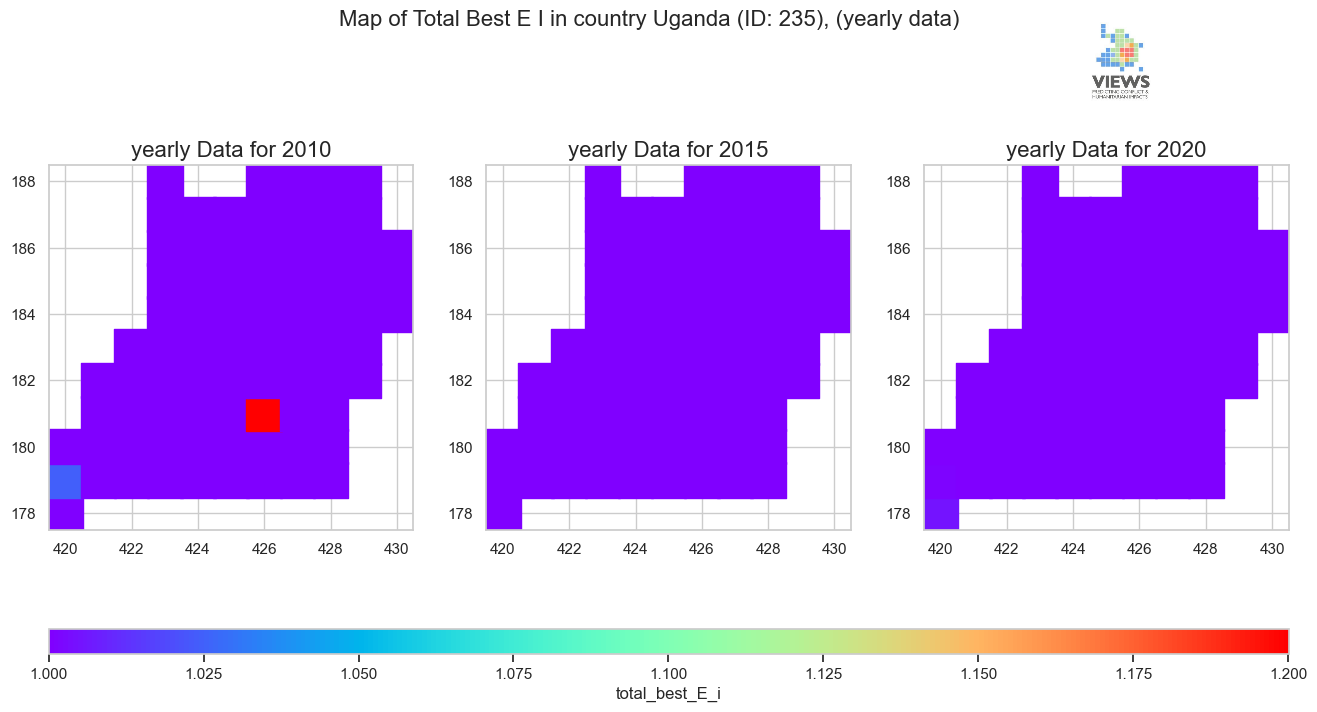

unique_values: [1.         1.         1.00001747 1.04878552 1.00000008 5.31454917
 1.00003871 1.         1.26998921 1.         1.01259525 1.00000269
 1.00151788 1.00000897 1.28487876 1.         1.0000527  1.01059557
 1.2081317  1.00000016 1.00133301 1.00579038 1.00010647 4.51801662
 1.30078005 1.19785704 1.03138361 1.11594493 1.00000481 1.00000131
 1.         1.00303106 1.00971871 1.00316479 1.06380405 1.00255017
 1.00000044 1.00139199 1.00000084 1.00000002 1.         1.00360235
 1.00930799 1.0000003  1.02213172 1.00002381 1.00112093 1.00075864
 2.38833094 1.08378257 1.00000006 1.0039271  1.00000003 2.93185243
 1.0003042  1.18816638 3.5249425  1.0001447  1.00021452 2.14902662
 2.53874168 1.00783197 1.00000188 1.00659045 1.57938871 1.00631217
 1.00000657 1.71222182 1.0000783  1.02752275 1.00041273 1.14024283
 1.0202882  1.17901917 1.00018816 1.0012224 ]
vmin: 1.0, vmax: 5.314549174090527
unique_values: [1.         1.         1.00001747 1.04878552 1.00000008 5.31454917
 1.00003871 1.    

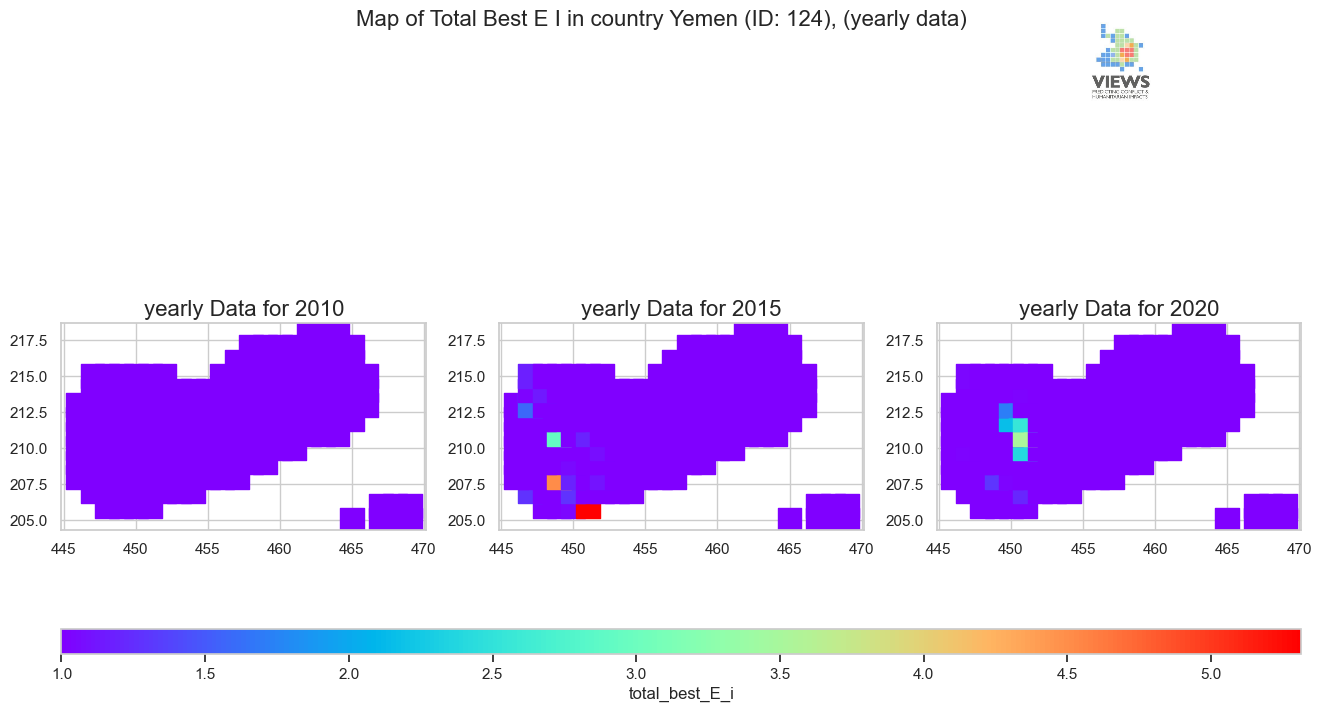

unique_values: [1.]
vmin: 1.0, vmax: 1.0
unique_values: [1.]
vmin: 1.0, vmax: 1.0
unique_values: [1.]
vmin: 1.0, vmax: 1.0


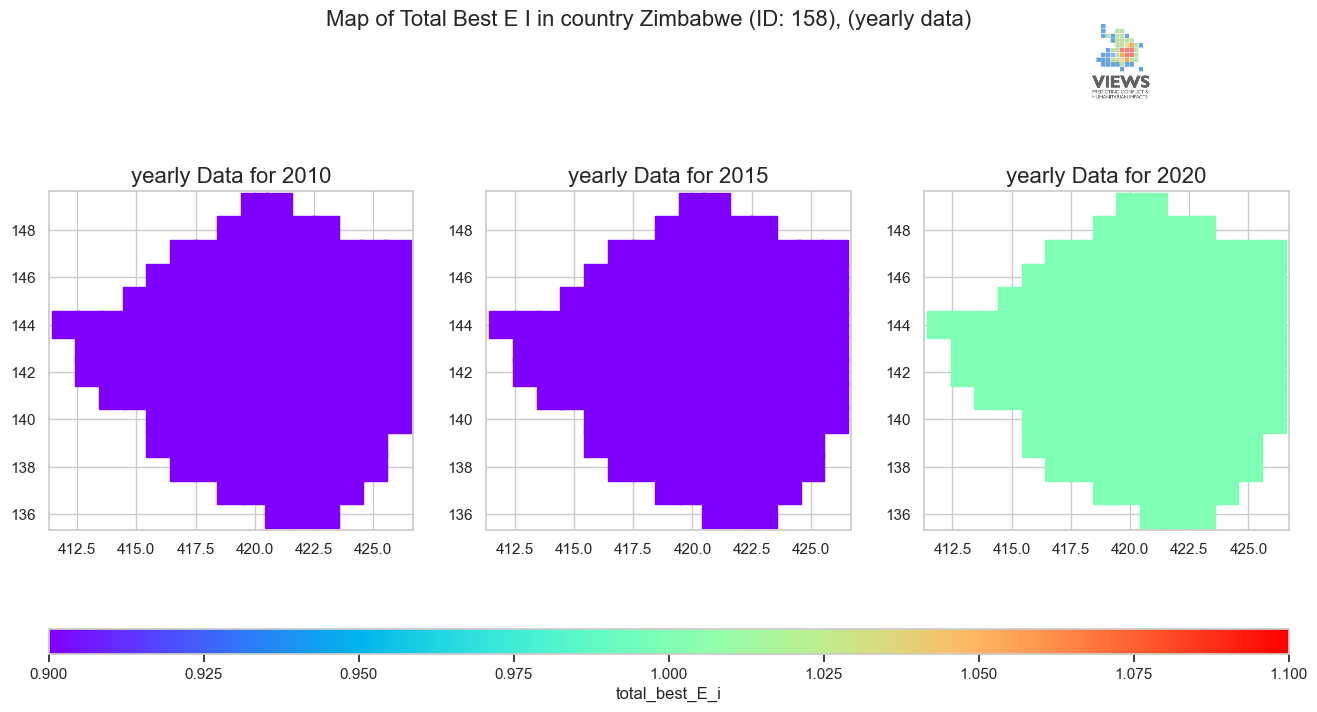

In [16]:
# return period maps for each country, big E
# total_best_E_i

for idx, country_id in enumerate(country_ids):
    save_path_maps = os.path.join(base_save_path, f"{country_list[idx].replace(' ', '_').replace('/', '_')}.png")
    plot_country_period_map(df_yearly, country_id, "total_best_E_i", [2010, 2015, 2020], figsize=(16, 8), save_plot=True)

# need to fix save function
# need to fix titles

# need to fix when there is no fatatlities 

unique_values: [1.         1.00076723 1.00404643 1.0051662  1.00171423 1.01368891
 1.00336801 1.00679736 1.0028898  1.40876482 1.32241017 1.24830144
 1.09015852 1.29877597 1.00226087 1.55118835 1.05440851 1.04515754
 1.63269024 1.12071441 1.02033861 1.15235546]
vmin: 1.0, vmax: 1.6326902407209953


AttributeError: 'str' object has no attribute 'parts'

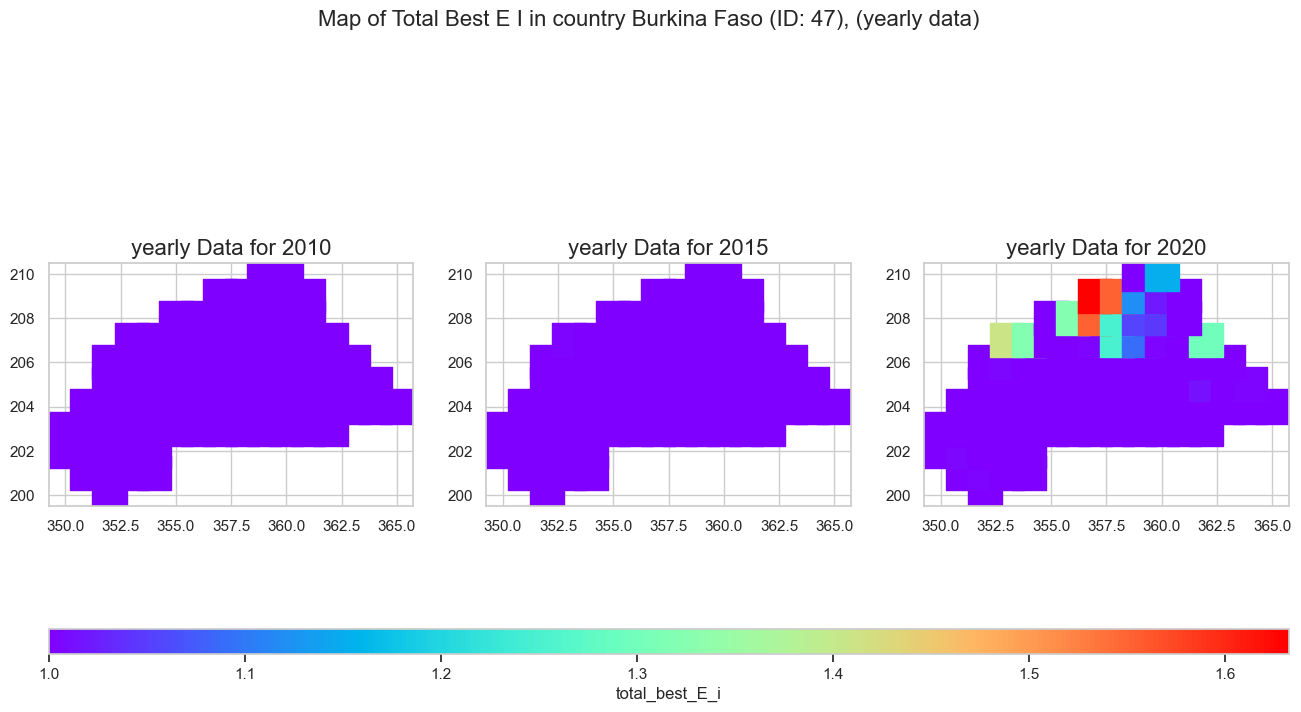

In [11]:
# trying plot_country_period_map_alexa_alt function

# need to fix logo
for idx, country_id in enumerate(country_ids):
    save_path_maps = os.path.join(base_save_path, f"{country_list[idx].replace(' ', '_').replace('/', '_')}.png")
    plot_country_period_map_alexa_alt(df_yearly, country_id, "total_best_E_i", [2010, 2015, 2020], figsize=(16, 8), save_plot=False)

IN PROGRESS

In [ ]:
# change colour scale from rainbow, change auto titles, enable for the tops to be cut off 